# imports and installs

In [1]:
!pip install scipy
!pip install scikit-learn
!pip install plotly --upgrade
!pip install seaborn
!pip install nbformat --upgrade
!pip install causalimpact


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\thiag\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\thiag\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\thiag\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\thiag\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\thiag\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\thiag\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# data preparation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot

In [3]:
df = pd.read_csv('seasons.csv')
df = df.drop(['POSITION_GROUP', 'TEAM_ID', 'EVENT_TYPE', 'GAME_ID'], axis=1)
# Transform column names to lower case
df = df.rename(columns=lambda x: x.lower())
pd.set_option('display.max_columns', None)
df['game_id'] = df['game_date'].astype(str) + '_' + df['home_team'].astype(str)

In [4]:
df.shape

(4231262, 23)

In [5]:

def categorize_action_type(action_type):
    # Convert action_type to lowercase for case-insensitive comparison
    action_type_lower = action_type.lower()
    
    if any(keyword in action_type_lower for keyword in ['jump shot', 'pull-up', 'pullup', 'fadeaway', 'jump bank shot']):
        return 'Jump Shot'
    elif 'layup' in action_type_lower:
        return 'Layup'
    elif 'dunk' in action_type_lower:
        return 'Dunk'
    elif 'hook' in action_type_lower:
        return 'Hook Shot'
    else:
        return 'Other'

def assign_action_type_number(action_type_category):
  if action_type_category == 'Dunk':
    return 1
  elif action_type_category == 'Layup':
    return 2
  elif action_type_category == 'Jump Shot':
    return 3
  elif action_type_category == 'Hook Shot':
    return 4
  else:
    return 0  # Or another value for other action types

# Define a function to map basic_zone to numbers
def map_basic_zone_to_number(basic_zone):
    if basic_zone == 'Restricted Area':
        return 1
    elif basic_zone == 'In The Paint (Non-RA)':
        return 2
    elif basic_zone == 'Left Corner 3' or basic_zone == 'Right Corner 3':
        return 3
    elif basic_zone == 'Above the Break 3':
        return 4
    elif basic_zone == 'Mid-Range':
        return 5
    else:
        return 0  # Default value for zones not listed

# Define a function to map position to numbers
def map_position_to_number(position):
    if position == 'PG':
        return 1
    elif position == 'SG':
        return 2
    elif position == 'SF':
        return 3
    elif position == 'PF':
        return 4
    elif position == 'C':
        return 5
    else:
        return 0  # Default value for positions not listed

def map_shot_made_to_number(shot_made):
    if shot_made == True:
        return 1
    else:
        return 0



df['action_type_category'] = df['action_type'].apply(categorize_action_type)
df['action_type_number'] = df['action_type_category'].apply(assign_action_type_number)
df['basic_zone_number'] = df['basic_zone'].apply(map_basic_zone_to_number)
df['position_number'] = df['position'].apply(map_position_to_number)
df['shot_made_flag'] = df['shot_made'].apply(map_shot_made_to_number)

df.head(5)

season_1 season_2               team_name  player_id       player_name  \
0      2004  2003-04      Los Angeles Lakers        977       Kobe Bryant   
1      2004  2003-04  Portland Trail Blazers        757  Damon Stoudamire   
2      2004  2003-04      Los Angeles Lakers        977       Kobe Bryant   
3      2004  2003-04  Portland Trail Blazers        757  Damon Stoudamire   
4      2004  2003-04  Portland Trail Blazers        757  Damon Stoudamire   

  position   game_date home_team away_team  shot_made         action_type  \
0       SG  04-14-2004       POR       LAL       True           Jump Shot   
1       PG  04-14-2004       POR       LAL       True  Driving Layup Shot   
2       SG  04-14-2004       POR       LAL      False           Jump Shot   
3       PG  04-14-2004       POR       LAL       True           Jump Shot   
4       PG  04-14-2004       POR       LAL      False           Jump Shot   

        shot_type         basic_zone         zone_name zone_abb  \
0  3PT Field Goal  Above the Break 3  Left Side Center       LC   
1  2PT Field Goal    Restricted Area            Center        C   
2  2PT Field Goal          Mid-Range  Left Side Center       LC   
3  2PT Field Goal          Mid-Range         Left Side        L   
4  2PT Field Goal          Mid-Range        Right Side        R   

        zone_range  loc_x  loc_y  shot_distance  quarter  mins_left  \
0          24+ ft.   20.0  21.35             25        6          0   
1  Less Than 8 ft.   -0.0   5.25              0        6          0   
2        16-24 ft.   13.3  24.45             23        6          0   
3        16-24 ft.   16.4  13.95             18        6          0   
4        16-24 ft.  -15.8   7.85             16        6          0   

   secs_left         game_id action_type_category  action_type_number  \
0          0  04-14-2004_POR            Jump Shot                   3   
1          2  04-14-2004_POR                Layup                   2   
2          9  04-14-2004_POR            Jump Shot                   3   
3         31  04-14-2004_POR            Jump Shot                   3   
4         55  04-14-2004_POR            Jump Shot                   3   

   basic_zone_number  position_number  shot_made_flag  
0                  4                2               1  
1                  1                1               1  
2                  5                2               0  
3                  5                1               1  
4                  5                1               0

In [6]:
print(df['zone_range'].unique())
print(df['zone_name'].unique())
print(df['basic_zone'].unique())

['24+ ft.' 'Less Than 8 ft.' '16-24 ft.' '8-16 ft.' 'Back Court Shot']
['Left Side Center' 'Center' 'Left Side' 'Right Side' 'Right Side Center'
 'Back Court']
['Above the Break 3' 'Restricted Area' 'Mid-Range' 'Left Corner 3'
 'In The Paint (Non-RA)' 'Right Corner 3' 'Backcourt']


# Graphs exploring the 3pt revolution

C:\Users\thiag\AppData\Local\Temp\ipykernel_19188\4228510111.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  original_dataframe = original_dataframe[exclude_conditions]


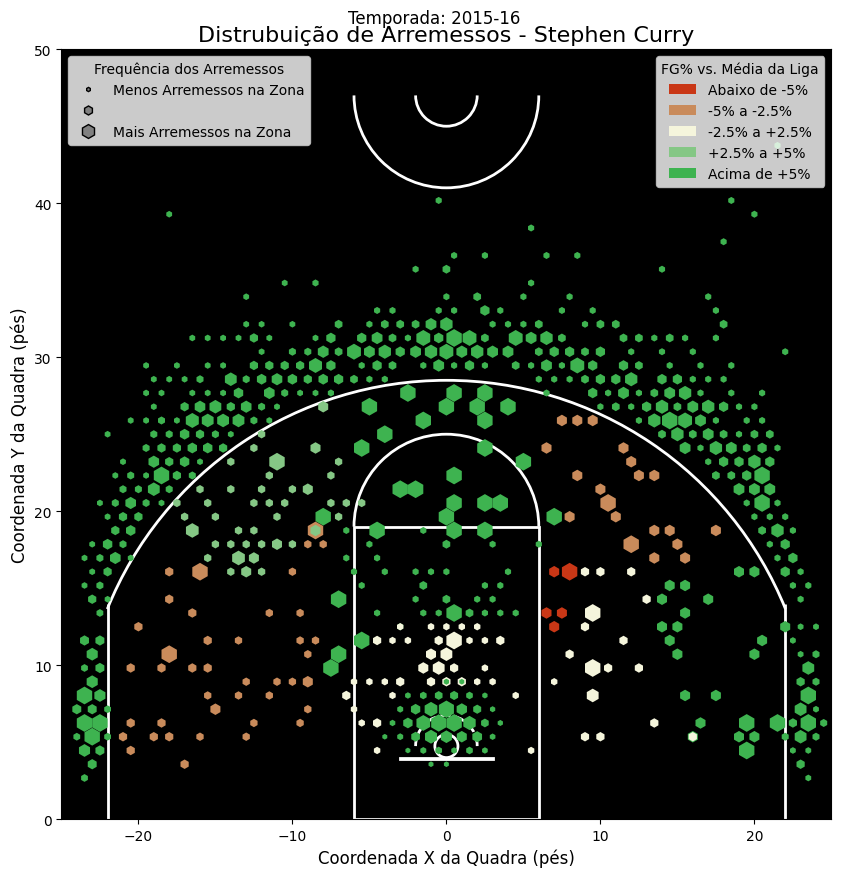

C:\Users\thiag\AppData\Local\Temp\ipykernel_19188\4228510111.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  original_dataframe = original_dataframe[exclude_conditions]


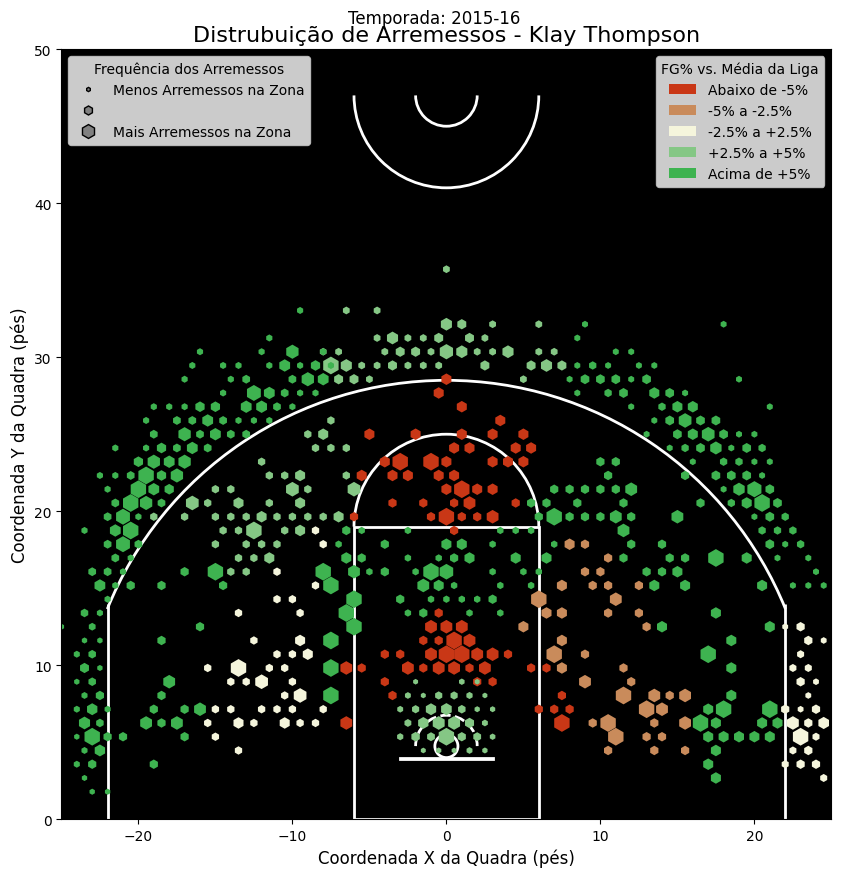

C:\Users\thiag\AppData\Local\Temp\ipykernel_19188\4228510111.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  original_dataframe = original_dataframe[exclude_conditions]


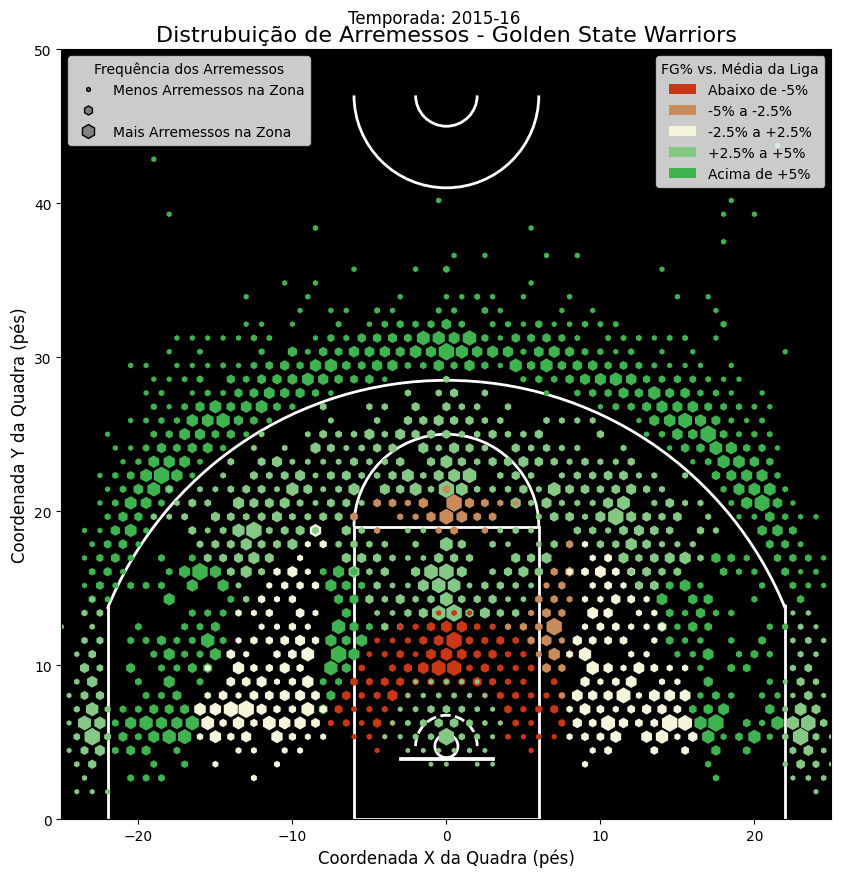

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import cKDTree
from matplotlib.patches import RegularPolygon
import matplotlib.lines as mlines

def plot_shot_distribution(dataframe, season=None, player_name=None, team_name=None, compare_to_avg=True, gridsize=50):
    """
    Plots an NBA shot distribution using hexbin, with variable hexagon sizes and custom color mapping,
    based on distinct combinations of 'basic_zone', 'zone_name', and 'zone_range'.

    Parameters:
        dataframe (pd.DataFrame): Dataframe containing the shot data with columns 'loc_x', 'loc_y', 'shot_made_flag',
                                  'basic_zone', 'zone_name', 'zone_range'.
        season (str, optional): The season to filter by (e.g., "2022-23"). If None, no filter is applied.
        player_name (str, optional): The player's name to filter by. If None, no filter is applied.
        compare_to_avg (bool): If True, colors hexagons based on shot make percentages compared to the league average.
        gridsize (int): Number of hexagons along the shorter axis of the plot.

    Returns:
        None
    """
    if season:
        original_dataframe = dataframe[dataframe['season_2'] == season]
    else:
        original_dataframe = dataframe.copy()

    # Exclude backcourt shots or zones
    exclude_conditions = (
        (dataframe['basic_zone'] != 'Backcourt') &
        (dataframe['zone_name'] != 'Back Court') &
        (dataframe['zone_range'] != 'Back Court Shot')
    )
    dataframe = dataframe[exclude_conditions]
    original_dataframe = original_dataframe[exclude_conditions]

    # Draw court
    def draw_court(ax, color='white', lw=2):
        from matplotlib.patches import Circle, Rectangle, Arc
        hoop = Circle((0, 4.75), radius=0.75, linewidth=lw, color=color, fill=False)
        backboard = Rectangle((-3, 4), 6, -0.1, linewidth=lw, color=color)
        inner_box = Rectangle((-6, 0), 12, 19, linewidth=lw, color=color, fill=False)
        top_free_throw = Arc((0, 19), 12, 12, theta1=0, theta2=180, linewidth=lw, color=color, fill=False)
        restricted = Arc((0, 4.75), 4, 4, theta1=0, theta2=180, linewidth=lw, color=color, linestyle='dashed')
        corner_three_a = Rectangle((-22, 0), 0, 14, linewidth=lw, color=color)
        corner_three_b = Rectangle((22, 0), 0, 14, linewidth=lw, color=color)
        three_arc = Arc((0, 4.75), 47.5, 47.5, theta1=22, theta2=158, linewidth=lw, color=color)
        center_outer_arc = Arc((0, 47), 12, 12, theta1=180, theta2=0, linewidth=lw, color=color)
        center_inner_arc = Arc((0, 47), 4, 4, theta1=180, theta2=0, linewidth=lw, color=color)

        court_elements = [hoop, backboard, inner_box, top_free_throw, restricted,
                          corner_three_a, corner_three_b, three_arc, center_outer_arc, center_inner_arc]

        for element in court_elements:
            ax.add_patch(element)

    # Filter by season if provided
    if season:
        dataframe = dataframe[dataframe['season_2'] == season]
        original_dataframe = original_dataframe[original_dataframe['season_2'] == season]

    # Filter by player_name if provided
    if player_name:
        dataframe = dataframe[dataframe['player_name'] == player_name]

    if team_name:
        dataframe = dataframe[dataframe['team_name'] == team_name]

    # Extract shot locations and shot makes
    x = dataframe['loc_x'].values
    y = dataframe['loc_y'].values
    makes = dataframe['shot_made_flag'].astype(float).values  # Ensure it's float for calculations

    # Plotting the court
    plt.figure(figsize=(10, 10))
    ax = plt.gca()
    ax.set_facecolor('black')
    draw_court(ax=ax, color='white')

    # Adjusting plot limits and aspect
    plt.xlim(-25, 25)
    plt.ylim(0, 50)
    ax.set_aspect('equal', 'box')

    # Define the extent of the court
    extent = (-25, 25, 0, 50)
    # Create hexbin to get hexbin centers without plotting
    hb = ax.hexbin(x, y, gridsize=gridsize, extent=extent, mincnt=1, visible=False)

    # Get hexbin centers
    hex_centers = hb.get_offsets()
    num_bins = len(hex_centers)

    # Build KDTree for fast nearest-neighbor lookup
    hex_centers_tree = cKDTree(hex_centers)

    # Function to compute per-hexbin stats
    def compute_hexbin_stats(x_coords, y_coords, values):
        # Find the nearest hexbin center for each shot
        distances, indices = hex_centers_tree.query(np.column_stack((x_coords, y_coords)))
        # Compute counts and sums per hexbin
        counts = np.bincount(indices, minlength=num_bins)
        sums = np.bincount(indices, weights=values, minlength=num_bins)
        return counts, sums, indices

    # Compute player hexbin stats
    player_counts, player_sums, player_indices = compute_hexbin_stats(x, y, makes)

    # Initialize dictionaries to store zone-based stats
    zone_fg_deviation = {}
    zone_max_shots = {}

    # Combine hexbin centers with indices for mapping
    hexbin_info = pd.DataFrame({
        'hex_x': hex_centers[:, 0],
        'hex_y': hex_centers[:, 1],
        'hex_index': np.arange(len(hex_centers))
    })

    # Map shots to hexbins
    shot_data = pd.DataFrame({
        'loc_x': x,
        'loc_y': y,
        'shot_made_flag': makes,
        'hex_index': player_indices,
        'basic_zone': dataframe['basic_zone'].values,
        'zone_name': dataframe['zone_name'].values,
        'zone_range': dataframe['zone_range'].values
    })

    # Merge hexbin info with shot data
    shot_data = shot_data.merge(hexbin_info, on='hex_index', how='left')

    # Group by zone
    zone_groups = shot_data.groupby(['basic_zone', 'zone_name', 'zone_range'])

    for zone_keys, zone_shots in zone_groups:
        # Player FG% in this zone
        player_zone_makes = zone_shots['shot_made_flag'].sum()
        player_zone_attempts = len(zone_shots)
        player_zone_fg = player_zone_makes / player_zone_attempts if player_zone_attempts > 0 else 0

        # League FG% in this zone
        league_zone_shots = original_dataframe[
            (original_dataframe['basic_zone'] == zone_keys[0]) &
            (original_dataframe['zone_name'] == zone_keys[1]) &
            (original_dataframe['zone_range'] == zone_keys[2])
        ]
        league_zone_makes = league_zone_shots['shot_made_flag'].astype(float).sum()
        league_zone_attempts = len(league_zone_shots)
        league_zone_fg = league_zone_makes / league_zone_attempts if league_zone_attempts > 0 else 0

        # Deviation
        deviation = player_zone_fg - league_zone_fg
        zone_fg_deviation[zone_keys] = deviation

        # Max shots in any hexbin within this zone
        hexbin_counts = zone_shots['hex_index'].value_counts()
        max_shots_in_zone = hexbin_counts.max()
        zone_max_shots[zone_keys] = max_shots_in_zone

    # Now, plot the hexbins
    for zone_keys, zone_shots in zone_groups:
        deviation_value = zone_fg_deviation[zone_keys]
        max_shots_in_zone = zone_max_shots[zone_keys]

        # Define color based on deviation
        def get_color(deviation_value):
            if deviation_value <= -0.05:
                return '#c93716'  # Blue
            elif -0.05 < deviation_value <= -0.025:
                return '#c98b5b'  # Light Blue
            elif -0.025 < deviation_value <= 0.025:
                return '#F5F5DC'  # Beige
            elif 0.025 < deviation_value <= 0.05:
                return '#85c785'  # Light Orange
            elif deviation_value > 0.05:
                return '#3EB350'  # Red
            else:
                return '#F5F5DC'  # Default Beige

        color = get_color(deviation_value)

        # For each hexbin in this zone
        for hex_index, hexbin_shots in zone_shots.groupby('hex_index'):
            shot_count = len(hexbin_shots)

            # Compute size based on shot_count relative to max_shots_in_zone
            min_radius = 0.3
            max_radius = 1.0
            if max_shots_in_zone > 0:
                size_ratio = shot_count / max_shots_in_zone
                size = min_radius + size_ratio * (max_radius - min_radius)
            else:
                size = min_radius

            # Adjust size based on plot dimensions
            dx = extent[1] - extent[0]
            dy = extent[3] - extent[2]
            if dx < dy:
                max_plot_radius = dx / gridsize / np.sqrt(3)
            else:
                max_plot_radius = dy / gridsize / np.sqrt(3)
            hex_radius = size * max_plot_radius

            # Get hexbin center
            hex_center = hex_centers[hex_index]

            # Plot hexagon
            hexagon = RegularPolygon(
                (hex_center[0], hex_center[1]),  # Center coordinates
                numVertices=6,                   # Hexagon
                radius=hex_radius,               # Size of the hexagon
                orientation=np.radians(0),       # Orientation
                facecolor=color,
                edgecolor=None                   # No edge color
            )
            ax.add_patch(hexagon)

    # Create custom legend for colors
    from matplotlib.patches import Patch

    color_mapping = {
        'Below -5%': '#c93716',
        '-5% to -2.5%': '#c98b5b',
        '-2.5% to +2.5%': '#F5F5DC',
        '+2.5% to +5%': '#85c785',
        'Above +5%': '#3EB350'
    }

    legend_elements = [
        Patch(facecolor=color_mapping['Below -5%'], edgecolor='none', label='Abaixo de -5%'),
        Patch(facecolor=color_mapping['-5% to -2.5%'], edgecolor='none', label='-5% a -2.5%'),
        Patch(facecolor=color_mapping['-2.5% to +2.5%'], edgecolor='none', label='-2.5% a +2.5%'),
        Patch(facecolor=color_mapping['+2.5% to +5%'], edgecolor='none', label='+2.5% a +5%'),
        Patch(facecolor=color_mapping['Above +5%'], edgecolor='none', label='Acima de +5%')
    ]

    # Create custom legend for sizes
    import matplotlib.lines as mlines
    size_legend_elements = [
        mlines.Line2D([], [], color='none', marker='h', markersize=10 * 0.3,
                      markerfacecolor='grey', label='Menos Arremessos na Zona'),
        mlines.Line2D([], [], color='none', marker='h', markersize=10 * 0.65,
                      markerfacecolor='grey', label=''),
        mlines.Line2D([], [], color='none', marker='h', markersize=10 * 1.0,
                      markerfacecolor='grey', label='Mais Arremessos na Zona'),
    ]

    # Combine legends
    first_legend = ax.legend(handles=legend_elements, loc='upper right', title='FG% vs. Média da Liga')
    ax.add_artist(first_legend)
    second_legend = ax.legend(handles=size_legend_elements, loc='upper left', title='Frequência dos Arremessos')

    # Add title and subtitle
    title = title = (
    f'Distrubuição de Arremessos - {player_name}' if player_name 
    else f'Distrubuição de Arremessos - {team_name}' if team_name 
    else 'Distribuição de Arremessos'
    )
    subtitle = f"Temporada: {season if season else 'All'}"
    ax.set_title(title, fontsize=16, color='black')
    fig = plt.gcf()
    fig.suptitle(subtitle, fontsize=12, color='black', y=0.92)

    plt.xlabel("Coordenada X da Quadra (pés)", fontsize=12, color='black')
    plt.ylabel("Coordenada Y da Quadra (pés)", fontsize=12, color='black')
    plt.xticks(color='black')
    plt.yticks(color='black')

    plt.show()

plot_shot_distribution(df, season='2015-16', player_name='Stephen Curry')
plot_shot_distribution(df, season='2015-16', player_name='Klay Thompson')
plot_shot_distribution(df, season='2015-16', team_name= "Golden State Warriors")


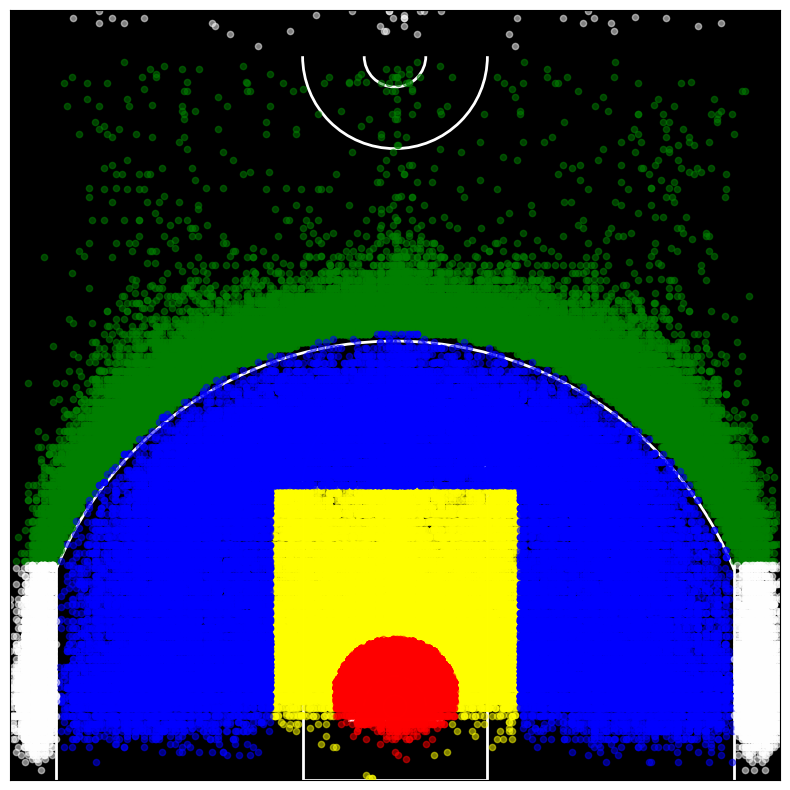

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_shot_distribution(dataframe, season=None, player_name=None, team_name=None, zones_to_include=None):
    """
    Plots an NBA shot distribution as a scatter plot with different colors by zone.
    
    Available zones (usually found in 'basic_zone'):
    - "Backcourt"
    - "Restricted Area"
    - "Paint (Non-RA)"
    - "Mid-Range"
    - "Above the Break 3"
    - "Corner 3"
    
    Parameters:
        dataframe (pd.DataFrame): Must contain 'loc_x', 'loc_y', 'basic_zone', 'season_2', 
                                  'player_name', and 'team_name'.
        season (str, optional): The season to filter by (e.g., "2022-23"). If None, no season filter is applied.
        player_name (str, optional): The player's name to filter by. If None, no player filter is applied.
        team_name (str, optional): The team name to filter by. If None, no team filter is applied.
        zones_to_include (list of str, optional): List of zones to include. If None, all zones are included.

    Returns:
        None
    """

    # Filter by season if provided
    new_df = dataframe.copy()
    if season:
        new_df = new_df[new_df['season_2'] == season]
    if player_name:
        new_df = new_df[new_df['player_name'] == player_name]
    if team_name:
        new_df = new_df[new_df['team_name'] == team_name]

    # Filter out zones if specified
    if zones_to_include is not None:
        new_df = new_df[new_df['basic_zone'].isin(zones_to_include)]

    # Extract shot locations
    x = new_df['loc_x'].values
    y = new_df['loc_y'].values

    # Function to draw the court
    def draw_court(ax, color='white', lw=2):
        from matplotlib.patches import Circle, Rectangle, Arc
        hoop = Circle((0, 4.75), radius=0.75, linewidth=lw, color=color, fill=False)
        backboard = Rectangle((-3, 4), 6, -0.1, linewidth=lw, color=color)
        inner_box = Rectangle((-6, 0), 12, 19, linewidth=lw, color=color, fill=False)
        top_free_throw = Arc((0, 19), 12, 12, theta1=0, theta2=180, linewidth=lw, color=color, fill=False)
        restricted = Arc((0, 4.75), 4, 4, theta1=0, theta2=180, linewidth=lw, color=color, linestyle='dashed')
        corner_three_a = Rectangle((-22, 0), 0, 14, linewidth=lw, color=color)
        corner_three_b = Rectangle((22, 0), 0, 14, linewidth=lw, color=color)
        three_arc = Arc((0, 4.75), 47.5, 47.5, theta1=22, theta2=158, linewidth=lw, color=color)
        center_outer_arc = Arc((0, 47), 12, 12, theta1=180, theta2=0, linewidth=lw, color=color)
        center_inner_arc = Arc((0, 47), 4, 4, theta1=180, theta2=0, linewidth=lw, color=color)

        court_elements = [hoop, backboard, inner_box, top_free_throw, restricted,
                          corner_three_a, corner_three_b, three_arc, center_outer_arc, center_inner_arc]

        for element in court_elements:
            ax.add_patch(element)

    # Setup plot
    plt.figure(figsize=(10, 10))
    ax = plt.gca()
    ax.set_facecolor('black')
    draw_court(ax=ax, color='white')

    # Adjusting plot limits and aspect
    plt.xlim(-25, 25)
    plt.ylim(0, 50)
    ax.set_aspect('equal', 'box')

    # Define colors for each zone
    color_map = {
        "Restricted Area": "red",
        "In The Paint (Non-RA)": "yellow",
        "Mid-Range": "blue",
        "Above the Break 3": "green",
        "Corner 3": "white"
    }

    # Plot each zone separately with specified colors
    for zone in new_df['basic_zone'].unique():
        zone_df = new_df[new_df['basic_zone'] == zone]
        zone_color = color_map.get(zone, 'white')  # default gray if not in map
        ax.scatter(zone_df['loc_x'], zone_df['loc_y'], c=zone_color, alpha=0.5, s=20)

    # Remove labels, legends, and extra text
    plt.xlabel("")
    plt.ylabel("")
    ax.set_xticks([])
    ax.set_yticks([])
    # No title or text

    plt.show()

# Example usage (uncomment to test with your dataframe and conditions):
plot_shot_distribution(df, season='2015-16')


each hexbin is a ft squared


In [32]:
def prepare_player_statistics(df, min_shots=300, season_range=None):
    """
    Prepare and calculate player statistics per season.

    Parameters:
    - df: pandas DataFrame containing the data.
    - min_shots: minimum number of shots per player per season to include.
    - season_range: tuple of (start_season, end_season), e.g., ('2014-15', '2020-2021')

    Returns:
    - player_stats: DataFrame with each player's statistics per season.
    """
    import pandas as pd
    import numpy as np

    # Copy the DataFrame to avoid modifying the original data
    df_filtered = df.copy()

    # Apply initial filters
    df_filtered = df_filtered[df_filtered['basic_zone_number'] != 0]

    # Apply season filter if 'season_range' parameter is provided
    if season_range is not None:
        # Function to parse season strings like '2014-15' or '2020-2021'
        def parse_season(season_str):
            season_str = season_str.replace(' ', '')
            if '-' in season_str:
                parts = season_str.split('-')
                start_year = int(parts[0])
                if len(parts[1]) == 2:
                    end_year = int(parts[0][:2] + parts[1])
                else:
                    end_year = int(parts[1])
            else:
                start_year = int(season_str)
                end_year = start_year + 1
            return start_year, end_year

        # Generate list of seasons between start and end seasons
        def generate_seasons(start_season_str, end_season_str):
            start_year, _ = parse_season(start_season_str)
            end_year, _ = parse_season(end_season_str)
            seasons = []
            for year in range(start_year, end_year + 1):
                seasons.append(f"{year}-{str(year+1)[-2:]}")
            return seasons

        seasons_to_include = generate_seasons(season_range[0], season_range[1])
        df_filtered = df_filtered[df_filtered['season_2'].isin(seasons_to_include)]

    data = df_filtered.copy()

    # Ensure necessary columns exist
    required_columns = [
        'season_2', 'team_name', 'game_date', 'player_id', 'player_name', 'game_id',
        'shot_made_flag', 'shot_type', 'action_type_number', 'basic_zone',
        'shot_distance', 'loc_x', 'loc_y'
    ]
    for col in required_columns:
        if col not in data.columns:
            print(f"Error: '{col}' column not found in data.")
            return

    # Each row represents one field goal attempt
    data['FGA'] = 1
    data['FGM'] = data['shot_made_flag']  # 1 for made shots, 0 for missed
    data['3PT_Attempted'] = (data['shot_type'] == '3PT Field Goal').astype(int)
    data['2PT_Attempted'] = (data['shot_type'] == '2PT Field Goal').astype(int)
    data['3PT_Made'] = data['FGM'] * data['3PT_Attempted']
    data['2PT_Made'] = data['FGM'] * data['2PT_Attempted']

    # Group by player and season to calculate totals and averages
    player_totals = data.groupby(['player_id', 'player_name']).agg(
        avg_shot_distance=('shot_distance', 'mean'),
        shot_distance_std=('shot_distance', 'std'),
        total_FGA=('FGA', 'sum'),
        total_FGM=('FGM', 'sum'),
        total_3PT_Attempted=('3PT_Attempted', 'sum'),
        total_3PT_Made=('3PT_Made', 'sum'),
        total_2PT_Attempted=('2PT_Attempted', 'sum'),
        total_2PT_Made=('2PT_Made', 'sum'),
        avg_loc_x=('loc_x', 'mean'),
        avg_loc_y=('loc_y', 'mean')
    ).reset_index()

    # Apply 'min_shots' filter per player per season
    player_totals = player_totals[player_totals['total_FGA'] >= min_shots]

    # Calculate eFG%
    player_totals['eFG%'] = (
        (player_totals['total_FGM'] + 0.5 * player_totals['total_3PT_Made']) / player_totals['total_FGA']
    )

    # Calculate 3PT_Ratio and 2PT_Ratio
    player_totals['3PT_Ratio'] = player_totals['total_3PT_Attempted'] / player_totals['total_FGA']
    player_totals['2PT_Ratio'] = player_totals['total_2PT_Attempted'] / player_totals['total_FGA']

    # Calculate 2PT% and 3PT%
    player_totals['2PT%'] = player_totals['total_2PT_Made'] / player_totals['total_2PT_Attempted']
    player_totals['3PT%'] = player_totals['total_3PT_Made'] / player_totals['total_3PT_Attempted']

    # Handle division by zero
    player_totals['2PT%'].fillna(0, inplace=True)
    player_totals['3PT%'].fillna(0, inplace=True)

    # Round percentages to 3 decimal places
    player_totals['eFG%'] = player_totals['eFG%'].round(3)
    player_totals['2PT%'] = player_totals['2PT%'].round(3)
    player_totals['3PT%'] = player_totals['3PT%'].round(3)
    player_totals['3PT_Ratio'] = player_totals['3PT_Ratio'].round(3)
    player_totals['2PT_Ratio'] = player_totals['2PT_Ratio'].round(3)

    # Step 1a: Calculate percentages for basic zones

    # Combine 'Left Corner 3' and 'Right Corner 3' into 'Corner 3'
    data['basic_zone_modified'] = data['basic_zone'].replace({
        'Left Corner 3': 'Corner 3',
        'Right Corner 3': 'Corner 3'
    })

    # Calculate total shots and makes per player per season per basic zone
    zone_stats = data.groupby(['player_id', 'player_name', 'season_2', 'basic_zone_modified']).agg(
        zone_FGA=('FGA', 'sum'),
        zone_FGM=('FGM', 'sum')
    ).reset_index()

    # Pivot to get zones as columns
    zone_fga_pivot = zone_stats.pivot_table(index=['player_id', 'player_name'],
                                            columns='basic_zone_modified',
                                            values='zone_FGA',
                                            fill_value=0)
    zone_fgm_pivot = zone_stats.pivot_table(index=['player_id', 'player_name',],
                                            columns='basic_zone_modified',
                                            values='zone_FGM',
                                            fill_value=0)

    # Calculate total FGA per player per season for normalization
    total_zone_fga = zone_fga_pivot.sum(axis=1)

    # Calculate percentages of shots taken from each zone
    zone_fga_pivot_percent = zone_fga_pivot.div(total_zone_fga, axis=0)

    # Calculate field goal percentages for each zone
    zone_fg_percent = zone_fgm_pivot.div(zone_fga_pivot).fillna(0)

    # Round percentages to 3 decimal places
    zone_fga_pivot_percent = zone_fga_pivot_percent.round(3)
    zone_fg_percent = zone_fg_percent.round(3)

    # Rename columns
    zone_fga_pivot_percent.columns = [f'Pct_Shots_{col}' for col in zone_fga_pivot_percent.columns]
    zone_fg_percent.columns = [f'Pct_Makes_{col}' for col in zone_fg_percent.columns]

    # Merge zone percentages into player_totals
    player_stats = player_totals.merge(zone_fga_pivot_percent.reset_index(),
                                       on=['player_id', 'player_name',], how='left')
    player_stats = player_stats.merge(zone_fg_percent.reset_index(),
                                      on=['player_id', 'player_name', ], how='left')

    # Step 1b: Calculate percentages for shot distance ranges

    # Define shot distance categories
    def categorize_shot_distance(distance, shot_type):
        if distance <= 3:
            return '0-3 ft'
        elif 3 < distance <= 10:
            return '3-10 ft'
        elif 10 < distance <= 16:
            return '10-16 ft'
        elif distance > 16 and shot_type != '3PT Field Goal':
            return '16+ ft (2PT)'
        elif shot_type == '3PT Field Goal':
            return '3PT Attempt'
        else:
            return 'Other'

    data['distance_range'] = data.apply(lambda row: categorize_shot_distance(row['shot_distance'], row['shot_type']), axis=1)

    # Calculate total shots and makes per player per season per distance range
    distance_stats = data.groupby(['player_id', 'player_name', 'distance_range']).agg(
        dist_FGA=('FGA', 'sum'),
        dist_FGM=('FGM', 'sum')
    ).reset_index()

    # Pivot to get distance ranges as columns
    dist_fga_pivot = distance_stats.pivot_table(index=['player_id', 'player_name', ],
                                                columns='distance_range',
                                                values='dist_FGA',
                                                fill_value=0)
    dist_fgm_pivot = distance_stats.pivot_table(index=['player_id', 'player_name', ],
                                                columns='distance_range',
                                                values='dist_FGM',
                                                fill_value=0)

    # Calculate total FGA per player per season for normalization
    total_dist_fga = dist_fga_pivot.sum(axis=1)

    # Calculate percentages of shots taken from each distance range
    dist_fga_pivot_percent = dist_fga_pivot.div(total_dist_fga, axis=0)

    # Calculate field goal percentages for each distance range
    dist_fg_percent = dist_fgm_pivot.div(dist_fga_pivot).fillna(0)

    # Round percentages to 3 decimal places
    dist_fga_pivot_percent = dist_fga_pivot_percent.round(3)
    dist_fg_percent = dist_fg_percent.round(3)

    # Rename columns
    dist_fga_pivot_percent.columns = [f'Pct_Shots_{col}' for col in dist_fga_pivot_percent.columns]
    dist_fg_percent.columns = [f'Pct_Makes_{col}' for col in dist_fg_percent.columns]

    # Merge distance percentages into player_stats
    player_stats = player_stats.merge(dist_fga_pivot_percent.reset_index(),
                                      on=['player_id', 'player_name', ], how='left')
    player_stats = player_stats.merge(dist_fg_percent.reset_index(),
                                      on=['player_id', 'player_name', ], how='left')

    # Ensure all percentage columns are filled
    player_stats.fillna(0, inplace=True)
    print(player_stats.columns)
    return player_stats


C:\Users\thiag\AppData\Local\Temp\ipykernel_14900\1679318501.py:103: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  player_totals['2PT%'].fillna(0, inplace=True)
C:\Users\thiag\AppData\Local\Temp\ipykernel_14900\1679318501.py:104: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

Index(['player_id', 'player_name', 'avg_shot_distance', 'shot_distance_std',
       'total_FGA', 'total_FGM', 'total_3PT_Attempted', 'total_3PT_Made',
       'total_2PT_Attempted', 'total_2PT_Made', 'avg_loc_x', 'avg_loc_y',
       'eFG%', '3PT_Ratio', '2PT_Ratio', '2PT%', '3PT%',
       'Pct_Shots_Above the Break 3', 'Pct_Shots_Corner 3',
       'Pct_Shots_In The Paint (Non-RA)', 'Pct_Shots_Mid-Range',
       'Pct_Shots_Restricted Area', 'Pct_Makes_Above the Break 3',
       'Pct_Makes_Corner 3', 'Pct_Makes_In The Paint (Non-RA)',
       'Pct_Makes_Mid-Range', 'Pct_Makes_Restricted Area', 'Pct_Shots_0-3 ft',
       'Pct_Shots_10-16 ft', 'Pct_Shots_16+ ft (2PT)', 'Pct_Shots_3-10 ft',
       'Pct_Shots_3PT Attempt', 'Pct_Makes_0-3 ft', 'Pct_Makes_10-16 ft',
       'Pct_Makes_16+ ft (2PT)', 'Pct_Makes_3-10 ft', 'Pct_Makes_3PT Attempt'],
      dtype='object')
Percentile Ranks for Selected Players:

Stephen Curry:
  3PT_Ratio: 90.13%
  3PT%: 98.36%
  Pct_Makes_Above the Break 3: 98.03%
  P

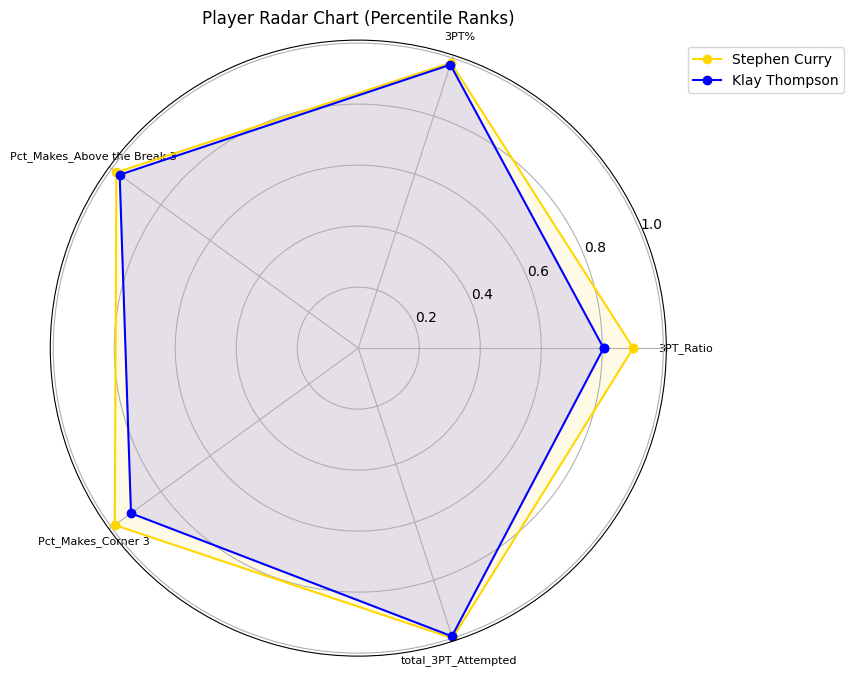

In [33]:
def plot_player_radar_chart(player_data, player_names, features, season=None):
    """
    Plot radar charts for specified players and features, using percentile ranks.

    Parameters:
    - player_data: DataFrame with player data, including 'player_name' and features.
    - player_names: List of player names to visualize.
    - features: List of feature names to include in the radar chart.
    - season: Season to filter data (optional).

    Returns:
    - None
    """
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    from scipy.stats import rankdata

    # Filter data for specified season if provided
    if season is not None:
        player_data = player_data[player_data['season_2'] == season]

    # Calculate percentile ranks for features
    data_percentiles = player_data.copy()
    for feature in features:
        data_percentiles[feature] = rankdata(player_data[feature], method='average') / len(player_data)

    # Filter data for specified players
    data_to_plot = data_percentiles[data_percentiles['player_name'].isin(player_names)]

    # Print the percentile ranks
    print("Percentile Ranks for Selected Players:")
    for index, row in data_to_plot.iterrows():
        print(f"\n{row['player_name']}:")
        for feature in features:
            print(f"  {feature}: {row[feature]:.2%}")

    # Radar chart setup
    categories = features
    N = len(categories)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Complete the circle

    plt.figure(figsize=(8, 8))
    colors = ['gold', 'blue']

    for i, (index, row) in enumerate(data_to_plot.iterrows()):
        values = row[features].tolist()
        values += values[:1]  # Complete the circle for radar chart
        plt.polar(angles, values, marker='o', label=row['player_name'], color=colors[i % len(colors)])
        plt.fill(angles, values, alpha=0.1, color=colors[i % len(colors)])

    plt.xticks(angles[:-1], categories, size=8)
    plt.title('Player Radar Chart (Percentile Ranks)')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    plt.show()


# Example usage
plot_player_radar_chart(
    prepare_player_statistics(df, min_shots=500, season_range= ('2014-15', '2015-16')),
    player_names=["Stephen Curry", "Klay Thompson"],
    features=["3PT_Ratio", "3PT%", 'Pct_Makes_Above the Break 3', 'Pct_Makes_Corner 3', 'total_3PT_Attempted']
)


# 3 Pointers per Season


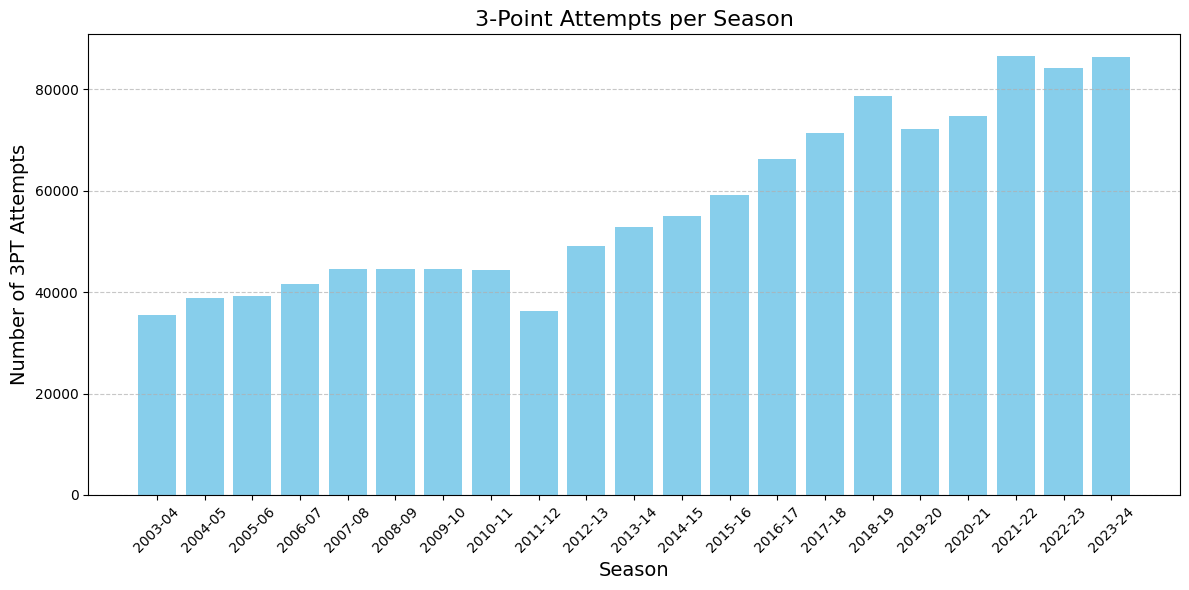

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the combined CSV data into a DataFrame
# Replace 'combined_output.csv' with the path to your actual CSV file


# Step 2: Filter the DataFrame to include only 3-point attempts
# Both made and missed shots are considered attempts
three_pt_attempts = df[df['shot_type'] == '3PT Field Goal']

# Step 3: Calculate the number of 3PT attempts per season
attempts_per_season = (
    three_pt_attempts.groupby('season_2')
    .size()
    .reset_index(name='3PT Attempts')
)

# Ensure the seasons are sorted chronologically
attempts_per_season = attempts_per_season.sort_values('season_2')

# Step 4: Plot the data
plt.figure(figsize=(12, 6))
plt.bar(attempts_per_season['season_2'], attempts_per_season['3PT Attempts'], color='skyblue')

# Customize the plot
plt.xlabel('Season', fontsize=14)
plt.ylabel('Number of 3PT Attempts', fontsize=14)
plt.title('3-Point Attempts per Season', fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


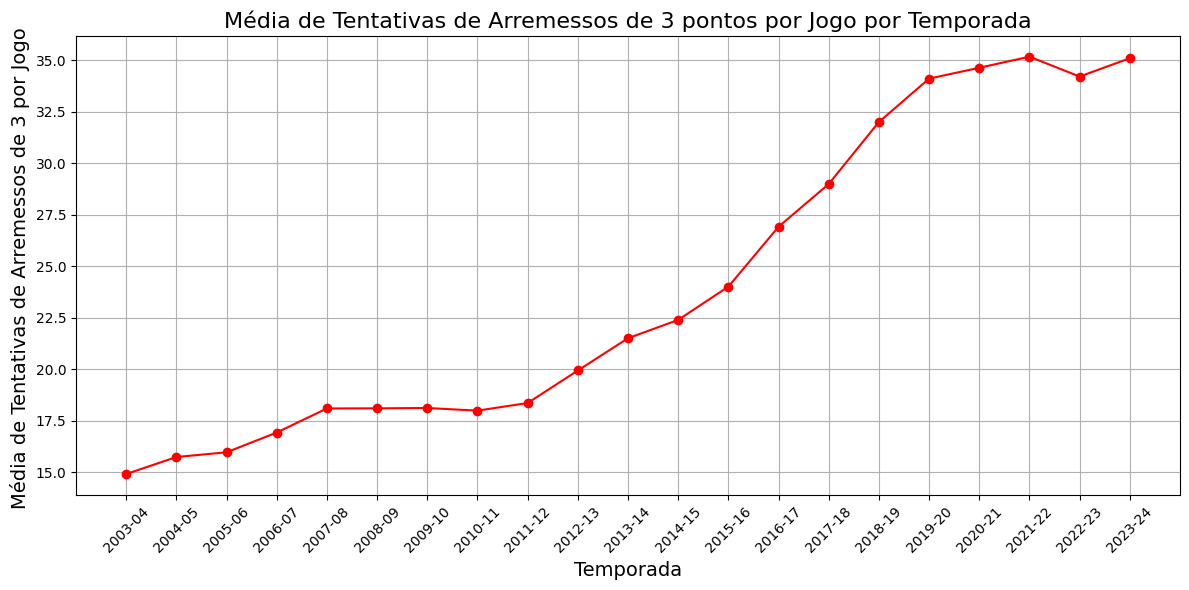

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df['game_id'] = df['game_date'].astype(str) + '_' + df['home_team'].astype(str)
# Step 2: Filter the DataFrame to include only 3-point attempts
three_pt_attempts = df[df['shot_type'] == '3PT Field Goal']

# Step 3: Calculate the number of 3PT attempts per game
# Group by season and game_id
attempts_per_game = (
    three_pt_attempts.groupby(['season_2', 'game_id', 'game_date', 'team_name'])
    .size()
    .reset_index(name='3PT Attempts per Game')
)

# Step 4: Calculate the average 3PT attempts per game for each season
average_attempts_per_season = (
    attempts_per_game.groupby('season_2')['3PT Attempts per Game']
    .mean()
    .reset_index(name='Average 3PT Attempts per Game')
)

# Ensure the seasons are sorted chronologically
average_attempts_per_season = average_attempts_per_season.sort_values('season_2')

# Step 5: Plot the data
plt.figure(figsize=(12, 6))
plt.plot(
    average_attempts_per_season['season_2'],
    average_attempts_per_season['Average 3PT Attempts per Game'],
    marker='o',
    linestyle='-',
    color='red'
)

# Customize the plot
plt.xlabel('Temporada', fontsize=14)
plt.ylabel('Média de Tentativas de Arremessos de 3 por Jogo ', fontsize=14)
plt.title('Média de Tentativas de Arremessos de 3 pontos por Jogo por Temporada', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)


# Display the plot
plt.tight_layout()
plt.show()


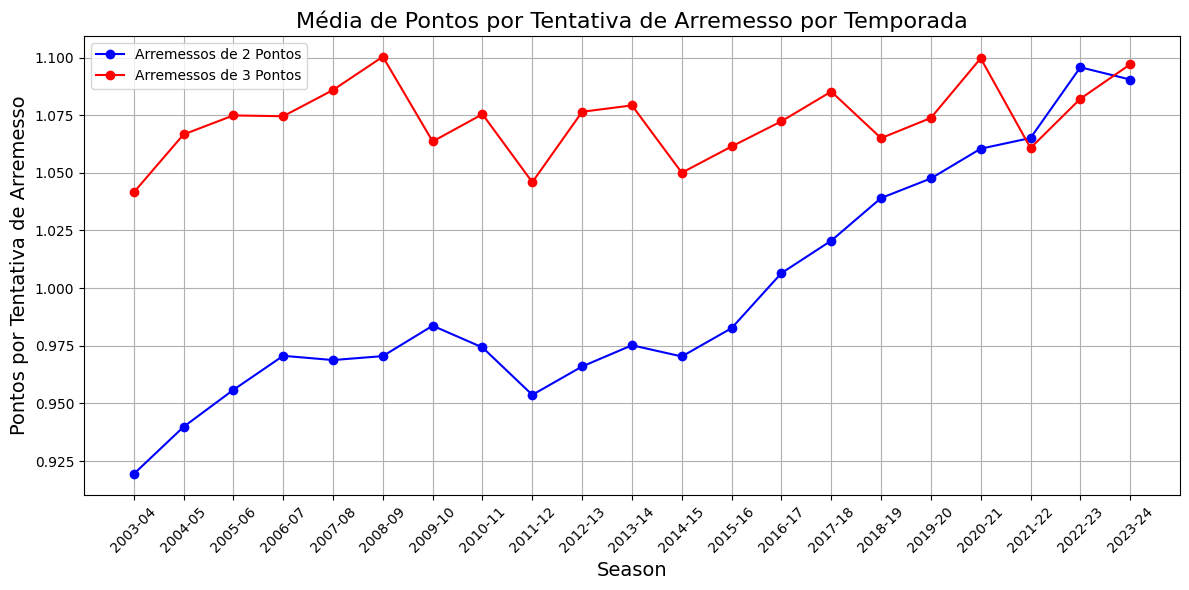

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the combined CSV data into a DataFrame
# Replace 'combined_output.csv' with the path to your actual CSV file

# Step 2: Assign Points to Each Shot
def calculate_points(row):
    if row['shot_made']:
        if row['shot_type'] == '2PT Field Goal':
            return 2
        elif row['shot_type'] == '3PT Field Goal':
            return 3
    else:
        return 0

df['points_scored'] = df.apply(calculate_points, axis=1)

# Step 3: Separate Data for Two-Point and Three-Point Shots
df_2pt = df[df['shot_type'] == '2PT Field Goal']
df_3pt = df[df['shot_type'] == '3PT Field Goal']

# Step 4: Calculate Points Per Shot Attempt for Each Shot Type

# For Two-Point Shots
points_attempts_2pt = df_2pt.groupby('season_2').agg(
    total_points=('points_scored', 'sum'),
    total_attempts=('points_scored', 'count')
).reset_index()
points_attempts_2pt['points_per_attempt'] = (
    points_attempts_2pt['total_points'] / points_attempts_2pt['total_attempts']
)

# For Three-Point Shots
points_attempts_3pt = df_3pt.groupby('season_2').agg(
    total_points=('points_scored', 'sum'),
    total_attempts=('points_scored', 'count')
).reset_index()
points_attempts_3pt['points_per_attempt'] = (
    points_attempts_3pt['total_points'] / points_attempts_3pt['total_attempts']
)

# Ensure the seasons are sorted chronologically
points_attempts_2pt = points_attempts_2pt.sort_values('season_2')
points_attempts_3pt = points_attempts_3pt.sort_values('season_2')

# Step 5: Plot the Data
plt.figure(figsize=(12, 6))

# Plot for Two-Point Shots
plt.plot(
    points_attempts_2pt['season_2'],
    points_attempts_2pt['points_per_attempt'],
    marker='o',
    linestyle='-',
    color='blue',
    label='Arremessos de 2 Pontos'
)

# Plot for Three-Point Shots
plt.plot(
    points_attempts_3pt['season_2'],
    points_attempts_3pt['points_per_attempt'],
    marker='o',
    linestyle='-',
    color='red',
    label='Arremessos de 3 Pontos'
)

# Customize the plot
plt.xlabel('Season', fontsize=14)
plt.ylabel('Pontos por Tentativa de Arremesso', fontsize=14)
plt.title('Média de Pontos por Tentativa de Arremesso por Temporada', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


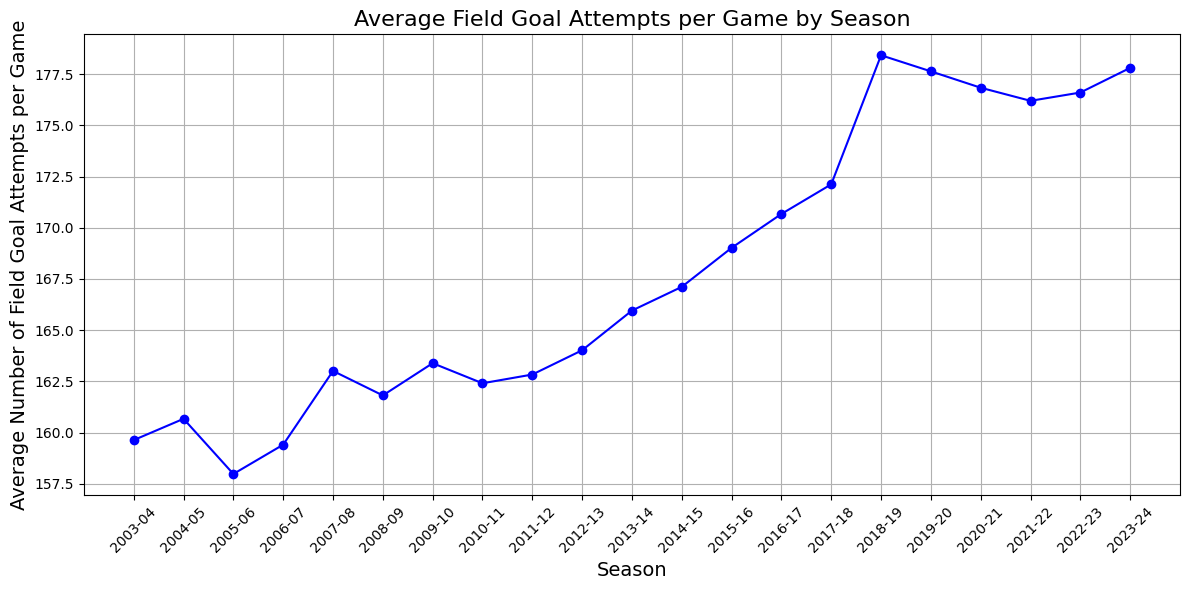

In [ ]:
# prompt: average field goal attempts by game by season

# Step 1: Read the combined CSV data into a DataFrame
# (Assuming you've already loaded your DataFrame as 'df')

# Step 2: Filter the DataFrame to include only field goal attempts
field_goal_attempts = df[df['shot_type'].isin(['2PT Field Goal', '3PT Field Goal'])]

# Step 3: Calculate the number of field goal attempts per game
# Group by season and game_id
attempts_per_game = (
    field_goal_attempts.groupby(['season_2', 'game_id'])
    .size()
    .reset_index(name='Field Goal Attempts per Game')
)

# Step 4: Calculate the average field goal attempts per game for each season
average_attempts_per_season = (
    attempts_per_game.groupby('season_2')['Field Goal Attempts per Game']
    .mean()
    .reset_index(name='Average Field Goal Attempts per Game')
)

# Ensure the seasons are sorted chronologically
average_attempts_per_season = average_attempts_per_season.sort_values('season_2')

# Step 5: Plot the data
plt.figure(figsize=(12, 6))
plt.plot(
    average_attempts_per_season['season_2'],
    average_attempts_per_season['Average Field Goal Attempts per Game'],
    marker='o',
    linestyle='-',
    color='blue'
)

# Customize the plot
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Number of Field Goal Attempts per Game', fontsize=14)
plt.title('Average Field Goal Attempts per Game by Season', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['season_2', 'team_name', 'player_id', 'player_name', 'position',
       'game_date', 'home_team', 'away_team', 'shot_made', 'action_type',
       'shot_type', 'basic_zone', 'zone_name', 'zone_abb', 'zone_range',
       'loc_x', 'loc_y', 'shot_distance', 'quarter', 'mins_left', 'secs_left',
       'game_id'],
      dtype='object')

# Clusterization

In [ ]:
df.columns

Index(['season_1', 'season_2', 'team_name', 'player_id', 'player_name',
       'position', 'game_date', 'home_team', 'away_team', 'shot_made',
       'action_type', 'shot_type', 'basic_zone', 'zone_name', 'zone_abb',
       'zone_range', 'loc_x', 'loc_y', 'shot_distance', 'quarter', 'mins_left',
       'secs_left', 'action_type_category', 'action_type_number',
       'basic_zone_number', 'position_number', 'shot_made_flag'],
      dtype='object')

# com taxa de acerto

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Filter for 3-point shots
three_point_shots = df[df['shot_type'].str.contains('3PT')]

# Calculate the percentage of successful 3-point shots for each season
three_point_season_percentage = (
    three_point_shots.groupby('season_2')['shot_made']
    .mean() * 100
)

# Print the percentage of successful 3-point shots by season
print("Percentage of 3-point shots made by season:")
print(three_point_season_percentage)



Percentage of 3-point shots made by season:
season_2
2003-04    34.716705
2004-05    35.555384
2005-06    35.830387
2006-07    35.818675
2007-08    36.197917
2008-09    36.679459
2009-10    35.453710
2010-11    35.848162
2011-12    34.864605
2012-13    35.883109
2013-14    35.975287
2014-15    35.001905
2015-16    35.381230
2016-17    35.745882
2017-18    36.175164
2018-19    35.502019
2019-20    35.794165
2020-21    36.656331
2021-22    35.359103
2022-23    36.071242
2023-24    36.568815
Name: shot_made, dtype: float64


C:\Users\thiag\AppData\Local\Temp\ipykernel_12960\1760933197.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_shots_filtered['shot_value'] = nba_shots_filtered['shot_type'].apply(


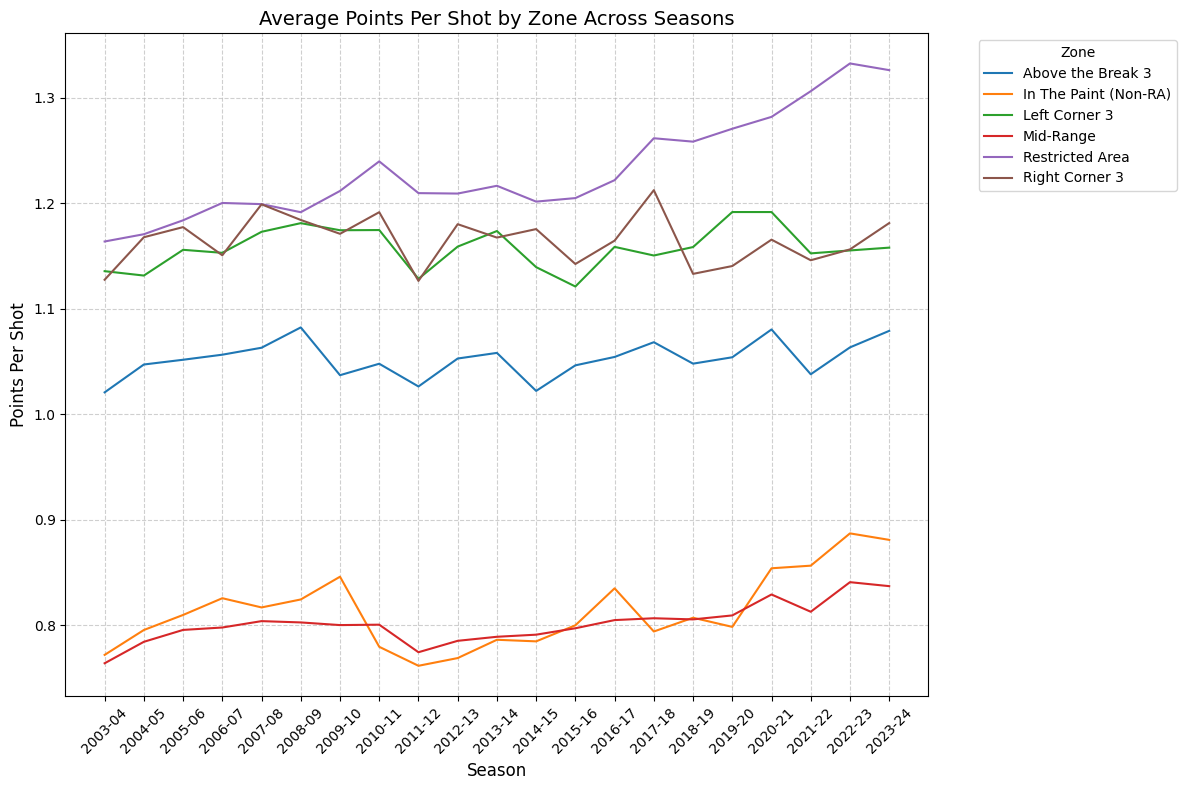

Average points per shot by season:
season_2
2003-04    0.997366
2004-05    1.016260
2005-06    1.029126
2006-07    1.030765
2007-08    1.042599
2008-09    1.044487
2009-10    1.040164
2010-11    1.039083
2011-12    1.004562
2012-13    1.025985
2013-14    1.031971
2014-15    1.019188
2015-16    1.018759
2016-17    1.039996
2017-18    1.049025
2018-19    1.035209
2019-20    1.044208
2020-21    1.067208
2021-22    1.052087
2022-23    1.072665
2023-24    1.077169
dtype: float64
basic_zone  Above the Break 3  In The Paint (Non-RA)  Left Corner 3  \
season_2                                                              
2003-04              1.020862               0.772050       1.135727   
2004-05              1.047269               0.795636       1.131565   
2005-06              1.051769               0.809894       1.155963   
2006-07              1.056564               0.825764       1.153113   
2007-08              1.063158               0.817028       1.173028   
2008-09              1.0

In [33]:
# Filter out the backcourt zone again with updated column names and use `season_2`
nba_shots_filtered = df[~df['basic_zone'].isin(['Backcourt'])]


# Calculate points per shot by zone per season using `season_2`
nba_shots_filtered['shot_value'] = nba_shots_filtered['shot_type'].apply(
    lambda x: 3 if '3PT' in x else 2
)

zone_season_stats = (
    nba_shots_filtered.groupby(['season_2', 'basic_zone'])
    .agg(
        fg_percentage=('shot_made', 'mean'),
        shot_value=('shot_value', 'first')  # Assuming consistent shot value per zone
    )
    .reset_index()
)

# Calculate average points per shot
zone_season_stats['points_per_shot'] = (
    zone_season_stats['fg_percentage'] * zone_season_stats['shot_value']
)

# Pivot for visualization
pivot_stats = zone_season_stats.pivot(
    index='season_2', columns='basic_zone', values='points_per_shot'
)

# Plot the trends over time for each zone using `season_2`
plt.figure(figsize=(12, 8))
for zone in pivot_stats.columns:
    plt.plot(pivot_stats.index, pivot_stats[zone], label=zone)

plt.title('Average Points Per Shot by Zone Across Seasons', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Points Per Shot', fontsize=12)
plt.legend(title='Zone', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the average points per shot across all zones for each season
yearly_averages = pivot_stats.mean(axis=1)

# Print the averages by year
print("Average points per shot by season:")
print(yearly_averages)

print(pivot_stats)


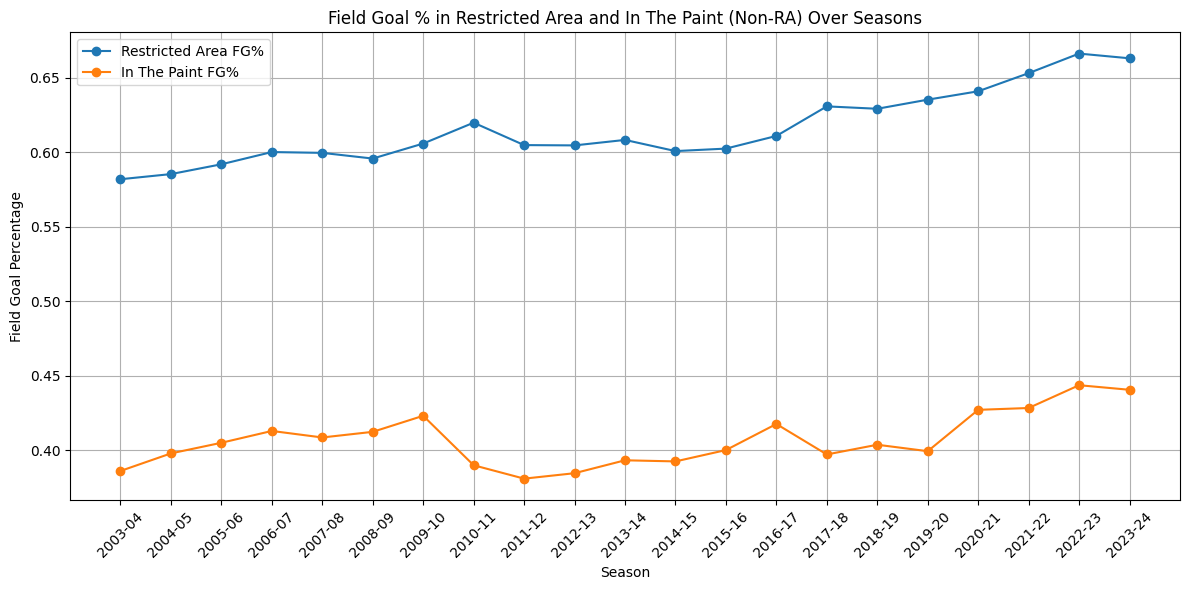

In [ ]:
restricted_paint_shots = df[df['basic_zone'].isin(['Restricted Area', 'In The Paint (Non-RA)'])]

# Calculate FG% for restricted area and in-the-paint by season
fg_percentages = (
    restricted_paint_shots.groupby(['season_2', 'basic_zone'])
    .agg(FGM=('shot_made_flag', 'sum'), FGA=('shot_made_flag', 'count'))
    .reset_index()
)
fg_percentages['FG%'] = fg_percentages['FGM'] / fg_percentages['FGA']

# Pivot the data for plotting
fg_percentages_pivot = fg_percentages.pivot(index='season_2', columns='basic_zone', values='FG%').reset_index()

# Plot the FG% trends for Restricted Area and In The Paint over seasons
plt.figure(figsize=(12, 6))
plt.plot(fg_percentages_pivot['season_2'], fg_percentages_pivot['Restricted Area'], label='Restricted Area FG%', marker='o')
plt.plot(fg_percentages_pivot['season_2'], fg_percentages_pivot['In The Paint (Non-RA)'], label='In The Paint FG%', marker='o')
plt.xlabel('Season')
plt.ylabel('Field Goal Percentage')
plt.title('Field Goal % in Restricted Area and In The Paint (Non-RA) Over Seasons')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Preparação dos Dados pro cluster


In [ ]:
def prepare_player_statistics(df, min_shots=1000, season=None):
    """
    Prepare and calculate player statistics.

    Parameters:
    - df: pandas DataFrame containing the data.
    - min_shots: minimum number of shots per player to include.
    - season: tuple of (start_season, end_season), e.g., ('2014-15', '2020-2021')

    Returns:
    - player_stats: DataFrame with each player's statistics.
    """
    import pandas as pd
    import numpy as np

    # Copy the DataFrame to avoid modifying the original data
    df_filtered = df.copy()

    # Apply initial filters
    df_filtered = df_filtered[df_filtered['basic_zone_number'] != 0]

    # Apply season filter if 'season' parameter is provided
    if season is not None:
        # Function to parse season strings like '2014-15' or '2020-2021'
        def parse_season(season_str):
            season_str = season_str.replace(' ', '')
            if '-' in season_str:
                parts = season_str.split('-')
                start_year = int(parts[0])
                if len(parts[1]) == 2:
                    end_year = int(parts[0][:2] + parts[1])
                else:
                    end_year = int(parts[1])
            else:
                start_year = int(season_str)
                end_year = start_year + 1
            return start_year, end_year
        

        # Generate list of seasons between start and end seasons
        def generate_seasons(start_season_str, end_season_str):
            start_year, _ = parse_season(start_season_str)
            end_year, _ = parse_season(end_season_str)
            seasons = []
            for year in range(start_year, end_year + 1):
                seasons.append(f"{year}-{str(year+1)[-2:]}")
            return seasons

        seasons_to_include = generate_seasons(season[0], season[1])
        df_filtered = df_filtered[df_filtered['season_2'].isin(seasons_to_include)]

    # Apply 'min_shots' filter
    shots_per_player = df_filtered['player_id'].value_counts()
    players_with_min_shots = shots_per_player[shots_per_player >= min_shots].index
    data = df_filtered[df_filtered['player_id'].isin(players_with_min_shots)]

    # Ensure necessary columns exist
    required_columns = [
        'team_name', 'game_date', 'player_id', 'player_name', 'game_id',
        'shot_made_flag', 'shot_type', 'action_type_number', 'basic_zone',
        'shot_distance', 'loc_x', 'loc_y'
    ]
    for col in required_columns:
        if col not in data.columns:
            print(f"Error: '{col}' column not found in data.")
            return

    # Each row represents one field goal attempt
    data['FGA'] = 1
    data['FGM'] = data['shot_made_flag']  # 1 for made shots, 0 for missed
    data['3PT_Attempted'] = (data['shot_type'] == '3PT Field Goal').astype(int)
    data['2PT_Attempted'] = (data['shot_type'] == '2PT Field Goal').astype(int)
    data['3PT_Made'] = data['FGM'] * data['3PT_Attempted']
    data['2PT_Made'] = data['FGM'] * data['2PT_Attempted']

    # Calculate per-game team FGA
    team_game_fga = data.groupby(['game_id', 'team_name'])['FGA'].sum().reset_index()
    team_game_fga.rename(columns={'FGA': 'team_game_FGA'}, inplace=True)

    # Calculate per-game player FGA
    player_game_fga = data.groupby(['game_id', 'player_id'])['FGA'].sum().reset_index()
    player_game_fga.rename(columns={'FGA': 'player_game_FGA'}, inplace=True)

    # Merge team FGA into player data
    player_game_fga = player_game_fga.merge(
        data[['game_id', 'player_id', 'team_name']].drop_duplicates(),
        on=['game_id', 'player_id'],
        how='left'
    )
    player_game_fga = player_game_fga.merge(
        team_game_fga,
        on=['game_id', 'team_name'],
        how='left'
    )

    # Calculate per-game percentage of team's shots for each player
    player_game_fga['pct_team_shots_per_game'] = player_game_fga['player_game_FGA'] / player_game_fga['team_game_FGA']

    # Calculate per-player average percentage of team's shots
    pct_team_shots = player_game_fga.groupby('player_id')['pct_team_shots_per_game'].mean().reset_index()
    pct_team_shots.rename(columns={'pct_team_shots_per_game': 'pct_team_shots'}, inplace=True)

    # Group by player to calculate totals and averages
    player_totals = data.groupby(['player_id', 'player_name']).agg(
        avg_shot_distance=('shot_distance', 'mean'),
        shot_distance_std=('shot_distance', 'std'),
        total_FGA=('FGA', 'sum'),
        total_FGM=('FGM', 'sum'),
        total_3PT_Attempted=('3PT_Attempted', 'sum'),
        total_3PT_Made=('3PT_Made', 'sum'),
        total_2PT_Attempted=('2PT_Attempted', 'sum'),
        total_2PT_Made=('2PT_Made', 'sum'),
        avg_loc_x=('loc_x', 'mean'),
        avg_loc_y=('loc_y', 'mean')
    ).reset_index()

    # Calculate eFG%
    player_totals['eFG%'] = (
        (player_totals['total_FGM'] + 0.5 * player_totals['total_3PT_Made']) / player_totals['total_FGA']
    )

    # Calculate 3PT_Ratio and 2PT_Ratio
    player_totals['3PT_Ratio'] = player_totals['total_3PT_Attempted'] / player_totals['total_FGA']
    player_totals['2PT_Ratio'] = player_totals['total_2PT_Attempted'] / player_totals['total_FGA']

    # Calculate 2PT% and 3PT%
    player_totals['2PT%'] = player_totals['total_2PT_Made'] / player_totals['total_2PT_Attempted']
    player_totals['3PT%'] = player_totals['total_3PT_Made'] / player_totals['total_3PT_Attempted']

    # Handle division by zero
    player_totals['2PT%'].fillna(0, inplace=True)
    player_totals['3PT%'].fillna(0, inplace=True)

    # Round percentages to 3 decimal places
    player_totals['eFG%'] = player_totals['eFG%'].round(3)
    player_totals['2PT%'] = player_totals['2PT%'].round(3)
    player_totals['3PT%'] = player_totals['3PT%'].round(3)
    player_totals['3PT_Ratio'] = player_totals['3PT_Ratio'].round(3)
    player_totals['2PT_Ratio'] = player_totals['2PT_Ratio'].round(3)

    # Merge pct_team_shots into player_totals
    player_stats = player_totals.merge(pct_team_shots, on='player_id', how='left')

    # Round pct_team_shots to 3 decimal places
    player_stats['pct_team_shots'] = player_stats['pct_team_shots'].round(3)

    # Step 1a: Calculate percentages for basic zones

    # Combine 'Left Corner 3' and 'Right Corner 3' into 'Corner 3'
    data['basic_zone_modified'] = data['basic_zone'].replace({
        'Left Corner 3': 'Corner 3',
        'Right Corner 3': 'Corner 3'
    })

    # Calculate total shots and makes per player per basic zone
    zone_stats = data.groupby(['player_id', 'basic_zone_modified']).agg(
        zone_FGA=('FGA', 'sum'),
        zone_FGM=('FGM', 'sum')
    ).reset_index()

    # Pivot to get zones as columns
    zone_fga_pivot = zone_stats.pivot(index='player_id', columns='basic_zone_modified', values='zone_FGA').fillna(0)
    zone_fgm_pivot = zone_stats.pivot(index='player_id', columns='basic_zone_modified', values='zone_FGM').fillna(0)

    # Calculate total FGA per player for normalization
    total_zone_fga = zone_fga_pivot.sum(axis=1)

    # Calculate percentages of shots taken from each zone
    zone_fga_pivot_percent = zone_fga_pivot.div(total_zone_fga, axis=0)

    # Calculate field goal percentages for each zone
    zone_fg_percent = zone_fgm_pivot.div(zone_fga_pivot).fillna(0)

    # Round percentages to 3 decimal places
    zone_fga_pivot_percent = zone_fga_pivot_percent.round(3)
    zone_fg_percent = zone_fg_percent.round(3)

    # Rename columns
    zone_fga_pivot_percent.columns = [f'Pct_Shots_{col}' for col in zone_fga_pivot_percent.columns]
    zone_fg_percent.columns = [f'Pct_Makes_{col}' for col in zone_fg_percent.columns]

    # Merge zone percentages into player_stats
    player_stats = player_stats.merge(zone_fga_pivot_percent, left_on='player_id', right_index=True, how='left')
    player_stats = player_stats.merge(zone_fg_percent, left_on='player_id', right_index=True, how='left')

    # Step 1b: Calculate percentages for shot distance ranges

    # Define shot distance categories
    def categorize_shot_distance(distance, shot_type):
        if distance <= 3:
            return '0-3 ft'
        elif 3 < distance <= 10:
            return '3-10 ft'
        elif 10 < distance <= 16:
            return '10-16 ft'
        elif distance > 16 and shot_type != '3PT Field Goal':
            return '16+ ft (2PT)'
        elif shot_type == '3PT Field Goal':
            return '3PT Attempt'
        else:
            return 'Other'

    data['distance_range'] = data.apply(lambda row: categorize_shot_distance(row['shot_distance'], row['shot_type']), axis=1)

    # Calculate total shots and makes per player per distance range
    distance_stats = data.groupby(['player_id', 'distance_range']).agg(
        dist_FGA=('FGA', 'sum'),
        dist_FGM=('FGM', 'sum')
    ).reset_index()

    # Pivot to get distance ranges as columns
    dist_fga_pivot = distance_stats.pivot(index='player_id', columns='distance_range', values='dist_FGA').fillna(0)
    dist_fgm_pivot = distance_stats.pivot(index='player_id', columns='distance_range', values='dist_FGM').fillna(0)

    # Calculate total FGA per player for normalization
    total_dist_fga = dist_fga_pivot.sum(axis=1)

    # Calculate percentages of shots taken from each distance range
    dist_fga_pivot_percent = dist_fga_pivot.div(total_dist_fga, axis=0)

    # Calculate field goal percentages for each distance range
    dist_fg_percent = dist_fgm_pivot.div(dist_fga_pivot).fillna(0)

    # Round percentages to 3 decimal places
    dist_fga_pivot_percent = dist_fga_pivot_percent.round(3)
    dist_fg_percent = dist_fg_percent.round(3)

    # Rename columns
    dist_fga_pivot_percent.columns = [f'Pct_Shots_{col}' for col in dist_fga_pivot_percent.columns]
    dist_fg_percent.columns = [f'Pct_Makes_{col}' for col in dist_fg_percent.columns]

    # Merge distance percentages into player_stats
    player_stats = player_stats.merge(dist_fga_pivot_percent, left_on='player_id', right_index=True, how='left')
    player_stats = player_stats.merge(dist_fg_percent, left_on='player_id', right_index=True, how='left')

    # Ensure all percentage columns are filled
    player_stats.fillna(0, inplace=True)

    return player_stats


# feature selection

In [68]:
def feature_selection(player_stats):
    """
    Perform feature selection by analyzing correlations.

    Parameters:
    - player_stats: DataFrame with player statistics.

    Returns:
    - selected_features: List of selected feature names.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np

    # Exclude non-numeric columns
    numeric_cols = player_stats.select_dtypes(include=['number']).columns.tolist()
    # Exclude identifiers and other non-feature columns
    non_feature_cols = ['player_id', 'total_FGA', 'total_FGM', 'total_3PT_Attempted', 'total_3PT_Made',
                        'total_2PT_Attempted', 'total_2PT_Made', 'avg_loc_x', 'avg_loc_y', 'pct_team_shots'
                        'Pct_Shots_0-3 ft', 'Pct_Shots_10-16 ft', 'Pct_Shots_16+ ft (2PT)',
                        'Pct_Shots_3-10 ft', 'Pct_Shots_3PT Attempt', 'Pct_Makes_0-3 ft',
                        'Pct_Makes_10-16 ft', 'Pct_Makes_16+ ft (2PT)', 'Pct_Makes_3-10 ft', 'Pct_Shots_0-3 ft',
                        'Pct_Makes_3PT Attempt',  'pct_team_shots', 
                        'avg_shot_distance',
                        '3PT_Ratio', '2PT_Ratio', '2PT%', '3PT%',
                        ]
    features = player_stats[numeric_cols].drop(columns=non_feature_cols, errors='ignore')
    print(features.columns)
    # Compute correlation matrix
    corr_matrix = features.corr()

    # Plot correlation heatmap
    plt.figure(figsize=(16, 14))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
    plt.title('Correlation Heatmap of Features')
    plt.show()

    
    # Optionally, you can select features based on correlation thresholds
    threshold = 0.75
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]

    print(f"Features to drop due to high correlation (>{threshold}): {to_drop}")

    # Select features to keep
    selected_features = [col for col in features.columns #if col not in to_drop
                        ]

    return selected_features


# Redução de dimensionalidade

In [13]:
def dimensionality_reduction(features_df, methods=['PCA', 't-SNE', 'UMAP']):
    """
    Apply dimensionality reduction methods.

    Parameters:
    - features_df: DataFrame with selected features.
    - methods: List of dimensionality reduction methods to apply.

    Returns:
    - reduced_data_dict: Dictionary with method names as keys and reduced data as values.
    """
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    from sklearn.manifold import TSNE
    import matplotlib.pyplot as plt
    import numpy as np

    reduced_data_dict = {}

    # Standardize the features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features_df)

    if 'PCA' in methods:
        # Apply PCA
        pca = PCA(n_components=6)
        pca_components = pca.fit_transform(features_scaled)
        reduced_data_dict['PCA'] = pca_components

    if 't-SNE' in methods:
        # Apply t-SNE
        tsne = TSNE(n_components=2, random_state=42)
        tsne_components = tsne.fit_transform(features_scaled)
        reduced_data_dict['t-SNE'] = tsne_components

    if 'UMAP' in methods:
        # Apply UMAP
        import umap.umap_ as umap

        umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
        umap_components = umap_model.fit_transform(features_scaled)
        reduced_data_dict['UMAP'] = umap_components

    return reduced_data_dict


# Parametros do Clustering

In [8]:
def evaluate_clustering_parameters(reduced_data, method_name='PCA', max_k=10):
    """
    Evaluate clustering parameters using metrics like the elbow method,
    silhouette score, and Davies-Bouldin Index for KMeans, Agglomerative Clustering, and GMM.

    Parameters:
    - reduced_data: Numpy array of reduced data.
    - method_name: Name of the dimensionality reduction method used.
    - max_k: Maximum number of clusters to evaluate.

    Returns:
    - metrics_dict: Dictionary containing metrics for each clustering method and number of clusters.
    """
    from sklearn.cluster import KMeans, AgglomerativeClustering
    from sklearn.mixture import GaussianMixture
    from sklearn.metrics import silhouette_score, davies_bouldin_score
    import matplotlib.pyplot as plt
    import numpy as np

    k_range = range(2, max_k + 1)
    clustering_methods = ['KMeans', 'Agglomerative', 'GMM']
    metrics_dict = {method: {'inertia': [], 'silhouette': [], 'dbi': []} for method in clustering_methods}

    for k in k_range:
        # KMeans
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels_kmeans = kmeans.fit_predict(reduced_data)
        inertia = kmeans.inertia_
        silhouette_avg = silhouette_score(reduced_data, labels_kmeans)
        dbi = davies_bouldin_score(reduced_data, labels_kmeans)
        metrics_dict['KMeans']['inertia'].append(inertia)
        metrics_dict['KMeans']['silhouette'].append(silhouette_avg)
        metrics_dict['KMeans']['dbi'].append(dbi)

        # Agglomerative Clustering
        agglo = AgglomerativeClustering(n_clusters=k)
        labels_agglo = agglo.fit_predict(reduced_data)
        # No inertia for Agglomerative Clustering
        inertia = np.nan
        silhouette_avg = silhouette_score(reduced_data, labels_agglo)
        dbi = davies_bouldin_score(reduced_data, labels_agglo)
        metrics_dict['Agglomerative']['inertia'].append(inertia)
        metrics_dict['Agglomerative']['silhouette'].append(silhouette_avg)
        metrics_dict['Agglomerative']['dbi'].append(dbi)

        # Gaussian Mixture Model
        gmm = GaussianMixture(n_components=k, random_state=42)
        gmm.fit(reduced_data)
        labels_gmm = gmm.predict(reduced_data)
        # For GMM, we can use the negative log-likelihood as inertia
        inertia = -gmm.score(reduced_data) * len(reduced_data)
        silhouette_avg = silhouette_score(reduced_data, labels_gmm)
        dbi = davies_bouldin_score(reduced_data, labels_gmm)
        metrics_dict['GMM']['inertia'].append(inertia)
        metrics_dict['GMM']['silhouette'].append(silhouette_avg)
        metrics_dict['GMM']['dbi'].append(dbi)

    # Plotting
    for method in clustering_methods:
        plt.figure(figsize=(16, 4))
        plt.suptitle(f'{method} Clustering using {method_name} data')

        # Elbow Method (Inertia)
        plt.subplot(1, 3, 1)
        if method != 'Agglomerative':
            plt.plot(k_range, metrics_dict[method]['inertia'], marker='o')
            plt.title('Elbow Method')
            plt.xlabel('Number of Clusters (k)')
            plt.ylabel('Inertia')
        else:
            plt.text(0.5, 0.5, 'Inertia not defined for Agglomerative Clustering', ha='center')
            plt.axis('off')

        # Silhouette Scores
        plt.subplot(1, 3, 2)
        plt.plot(k_range, metrics_dict[method]['silhouette'], marker='o')
        plt.title('Silhouette Scores')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('Silhouette Score')

        # Davies-Bouldin Index
        plt.subplot(1, 3, 3)
        plt.plot(k_range, metrics_dict[method]['dbi'], marker='o')
        plt.title('Davies-Bouldin Index')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('DBI')

        plt.tight_layout()
        plt.show()

    return metrics_dict


# Clustering


In [42]:
def cluster_data(reduced_data_dict, method_name='PCA', clustering_method='KMeans', n_clusters=4):
    """
    Apply specified clustering algorithm and evaluate its performance.

    Parameters:
    - reduced_data_dict: Dictionary with method names as keys and reduced data as values.
    - method_name: Name of the dimensionality reduction method to use ('PCA', 't-SNE', 'UMAP').
    - clustering_method: Clustering algorithm to use ('KMeans', 'Agglomerative', 'GMM', 'DBSCAN').
    - n_clusters: Number of clusters to use (for applicable algorithms).

    Returns:
    - labels: Cluster labels for each data point.
    """
    from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
    from sklearn.mixture import GaussianMixture
    from sklearn.metrics import silhouette_score, davies_bouldin_score
    import matplotlib.pyplot as plt

    data = reduced_data_dict[method_name]
    print(f"\nClustering using {clustering_method} on {method_name} reduced data with {n_clusters} clusters.")

    # Initialize variables
    labels = None
    silhouette_avg = None
    db_index = None

    # Clustering based on specified method
    if clustering_method == 'KMeans':
        model = KMeans(n_clusters=n_clusters, random_state=42)
        labels = model.fit_predict(data)
    elif clustering_method == 'Agglomerative':
        model = AgglomerativeClustering(n_clusters=n_clusters)
        labels = model.fit_predict(data)
    elif clustering_method == 'GMM':
        model = GaussianMixture(n_components=n_clusters, random_state=42)
        labels = model.fit_predict(data)
    else:
        print("Invalid clustering method specified.")
        return None

    # Evaluate clustering performance
    unique_labels = set(labels)
    if len(unique_labels) > 1 and -1 not in unique_labels:
        silhouette_avg = silhouette_score(data, labels)
        db_index = davies_bouldin_score(data, labels)
        print(f"{clustering_method} - Silhouette Score: {silhouette_avg:.3f}, Davies-Bouldin Index: {db_index:.3f}")
    else:
        print(f"{clustering_method} - Unable to calculate metrics (only one cluster detected)")

    # Visualization
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
    plt.title(f'{clustering_method} Clustering ({method_name} data)')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid(True)
    plt.show()

    return labels


In [43]:
def get_player_data_with_clusters(player_stats, selected_features, cluster_labels):
    """
    Merge cluster labels into player_stats and output DataFrame with selected features and player names.

    Parameters:
    - player_stats: DataFrame with player statistics.
    - selected_features: List of selected feature names.
    - cluster_labels: Cluster labels for each player.

    Returns:
    - player_data_with_clusters: DataFrame with player names, selected features, and cluster labels.
    """
    # Ensure that the length of cluster_labels matches the number of players
    if len(cluster_labels) != len(player_stats):
        print("Error: The number of cluster labels does not match the number of players.")
        return None

    player_data = player_stats[['player_id', 'player_name'] + selected_features].copy()
    player_data['cluster'] = cluster_labels

    return player_data



# radar chart


In [7]:
def plot_player_radar_chart(player_data, player_names, features, season=None):
    """
    Plot radar charts for specified players and features.

    Parameters:
    - player_data: DataFrame with player data, including 'player_name' and features.
    - player_names: List of player names to visualize.
    - features: List of feature names to include in the radar chart.
    - season: Season to filter data (optional).

    Returns:
    - None
    """
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np

    # Filter data for specified season if provided
    if season is not None:
        player_data = player_data[player_data['season_2'] == season]

    # Filter data for specified players
    data_to_plot = player_data[player_data['player_name'].isin(player_names)]

    # Normalize features for radar chart (optional)
    # You can choose to normalize data to [0,1] range for better visualization
    data_normalized = data_to_plot.copy()
    for feature in features:
        min_val = player_data[feature].min()
        max_val = player_data[feature].max()
        data_normalized[feature] = (data_normalized[feature] - min_val) / (max_val - min_val)

    categories = features
    N = len(categories)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Complete the circle

    plt.figure(figsize=(8, 8))

    for index, row in data_normalized.iterrows():
        values = row[features].tolist()
        values += values[:1]
        plt.polar(angles, values, marker='o', label=row['player_name'] + {row['season_2']} + f" (Cluster {row['cluster']})")
        plt.fill(angles, values, alpha=0.1)

    plt.xticks(angles[:-1], categories, size=8)
    plt.title('Player Radar Chart')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    plt.show()


In [8]:
def random_forest_feature_importance(features_df, cluster_labels):
    """
    Train a Random Forest classifier to determine feature importance in classifying players into clusters.

    Parameters:
    - features_df: DataFrame with selected features.
    - cluster_labels: Cluster labels for each player.

    Returns:
    - feature_importances: DataFrame with features and their importance scores.
    """
    from sklearn.ensemble import RandomForestClassifier
    import pandas as pd

    # Initialize Random Forest classifier
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(features_df, cluster_labels)

    # Get feature importances
    importances = rf.feature_importances_
    feature_names = features_df.columns
    feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importances['Feature'], feature_importances['Importance'])
    plt.gca().invert_yaxis()
    plt.xlabel('Importance')
    plt.title('Random Forest Feature Importances')
    plt.show()

    return feature_importances



# Running the code

C:\Users\thiag\AppData\Local\Temp\ipykernel_8092\112365157.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['FGA'] = 1
C:\Users\thiag\AppData\Local\Temp\ipykernel_8092\112365157.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['FGM'] = data['shot_made_flag']  # 1 for made shots, 0 for missed
C:\Users\thiag\AppData\Local\Temp\ipykernel_8092\112365157.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Index(['shot_distance_std', 'eFG%', 'Pct_Shots_Above the Break 3',
       'Pct_Shots_Corner 3', 'Pct_Shots_In The Paint (Non-RA)',
       'Pct_Shots_Mid-Range', 'Pct_Shots_Restricted Area',
       'Pct_Makes_Above the Break 3', 'Pct_Makes_Corner 3',
       'Pct_Makes_In The Paint (Non-RA)', 'Pct_Makes_Mid-Range',
       'Pct_Makes_Restricted Area'],
      dtype='object')


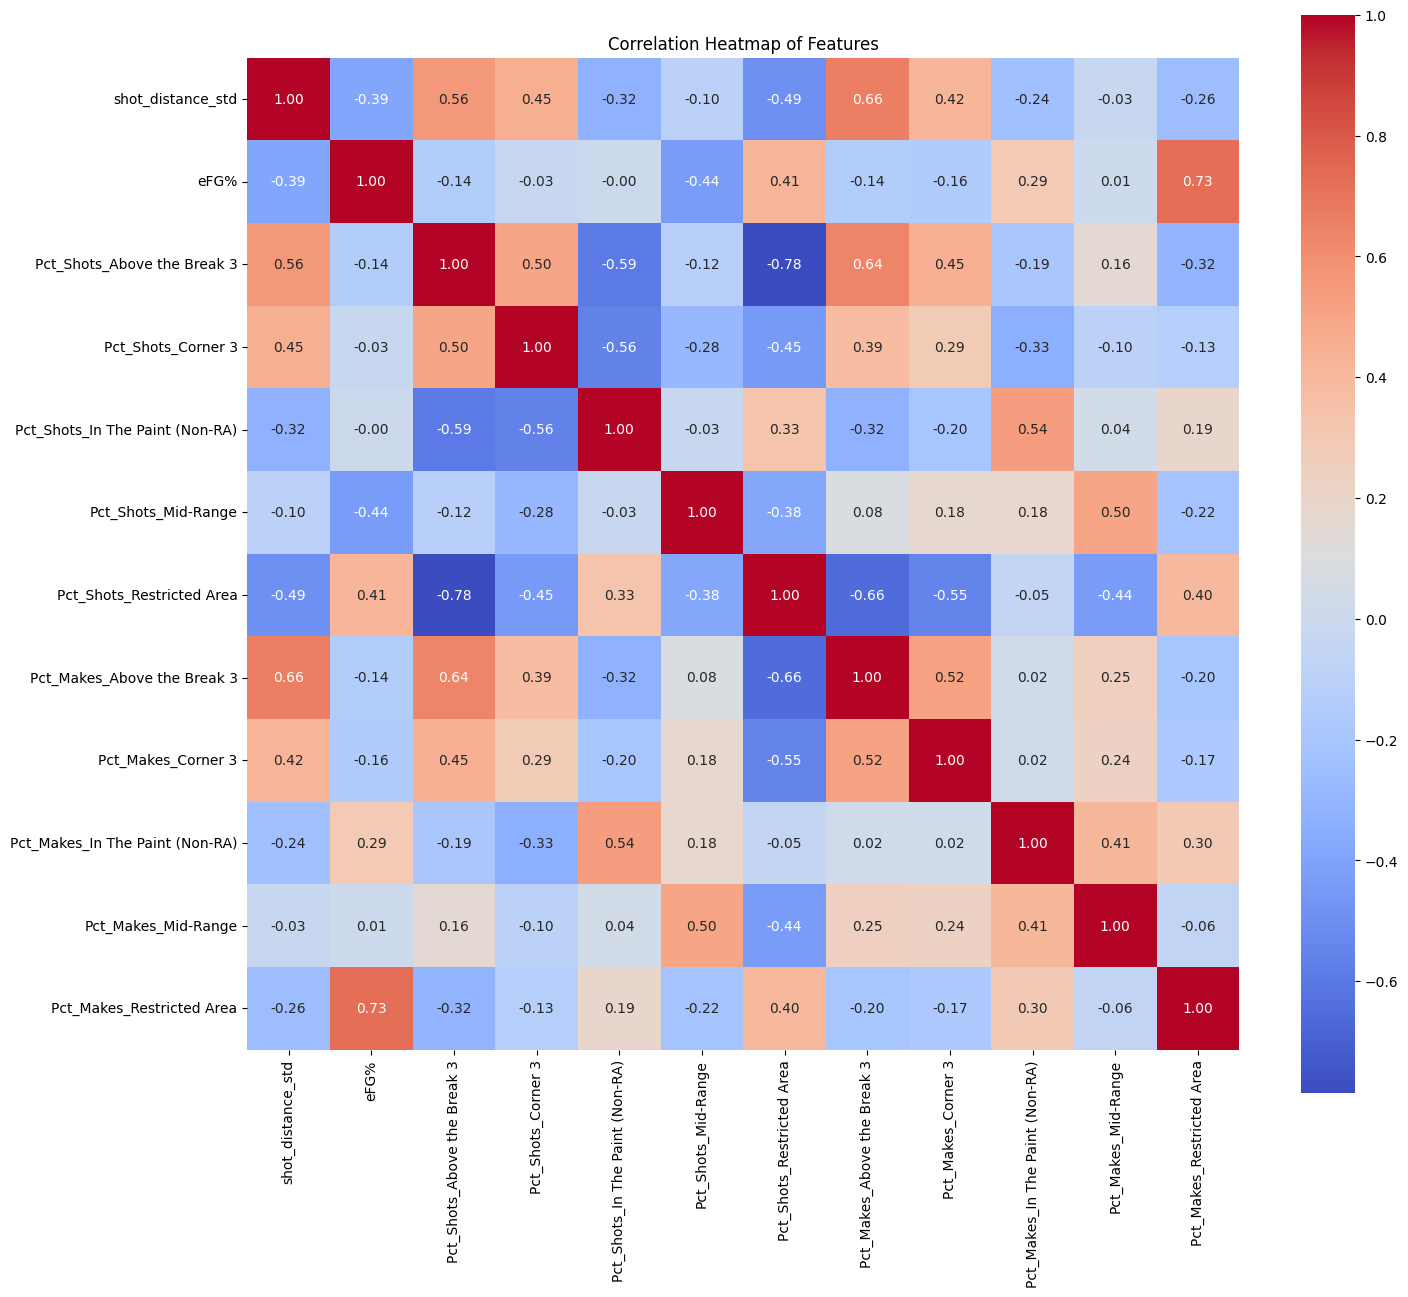

Features to drop due to high correlation (>0.75): ['Pct_Shots_Restricted Area']


C:\Users\thiag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Evaluating clustering parameters for PCA reduced data:


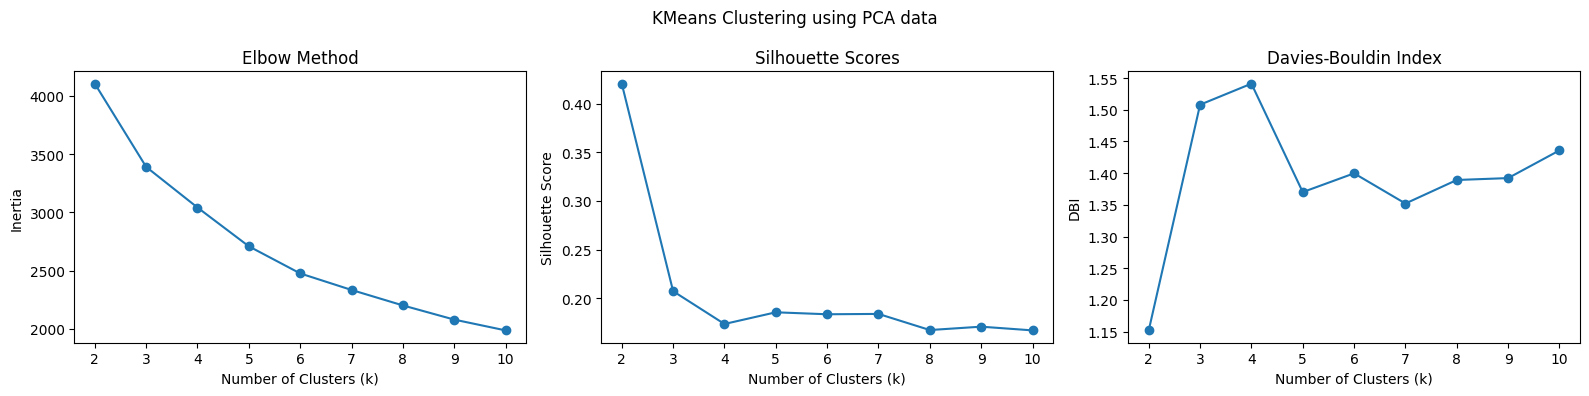

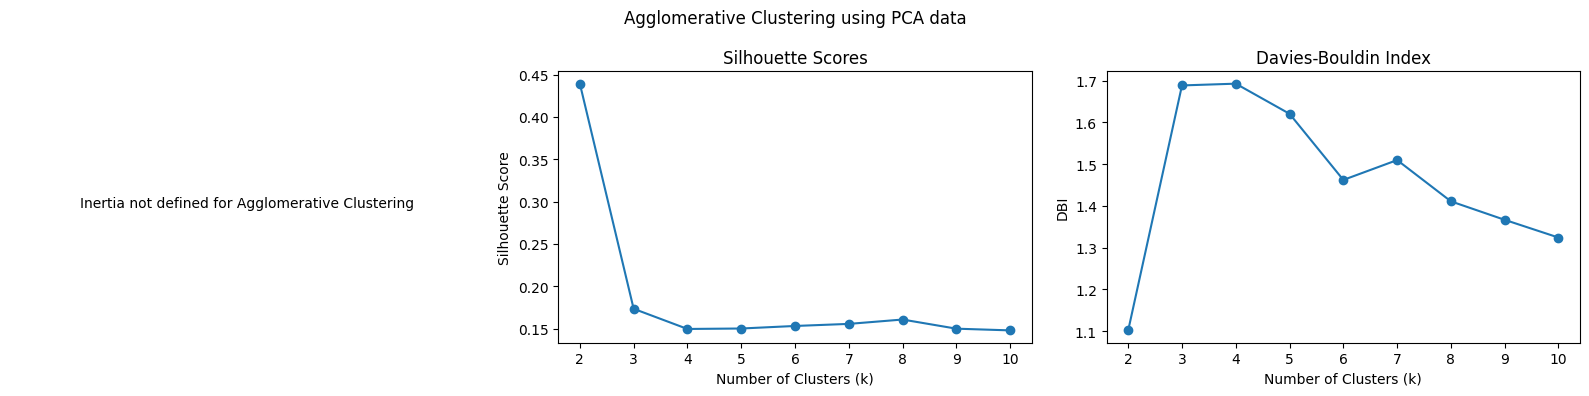

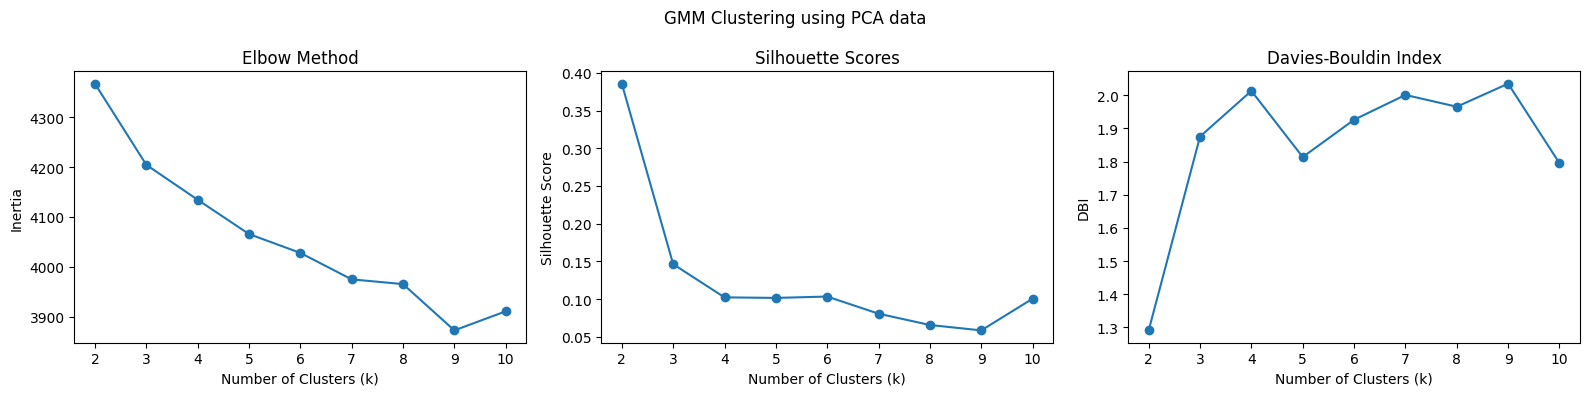

Evaluating clustering parameters for t-SNE reduced data:


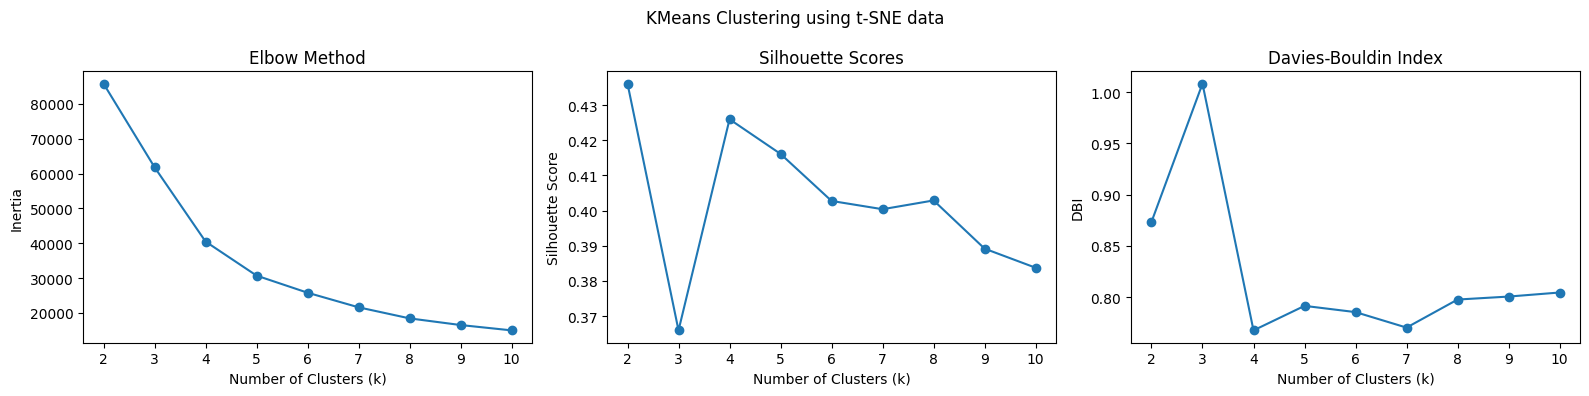

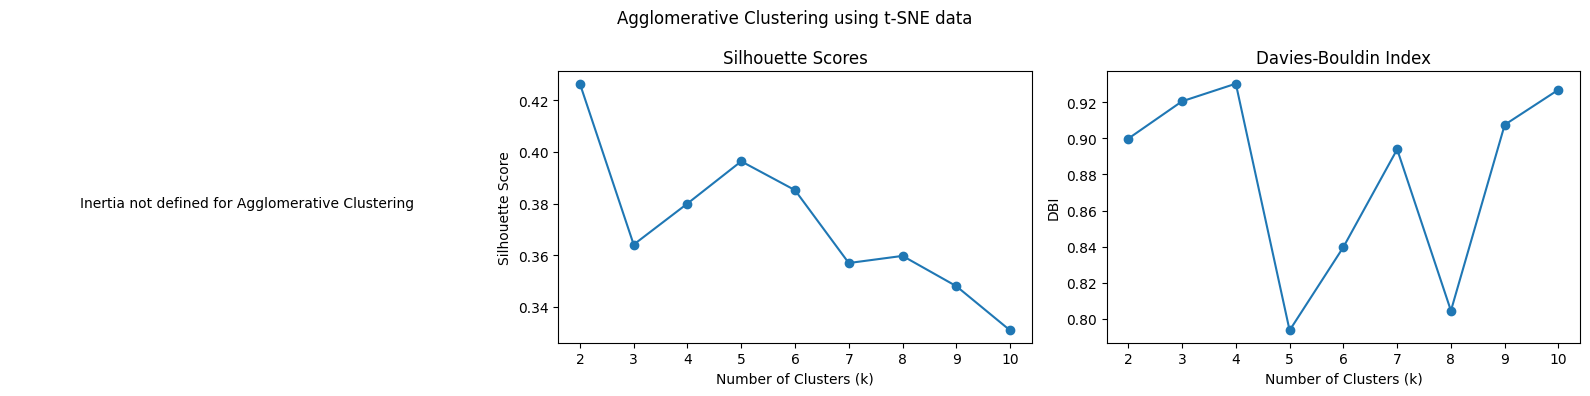

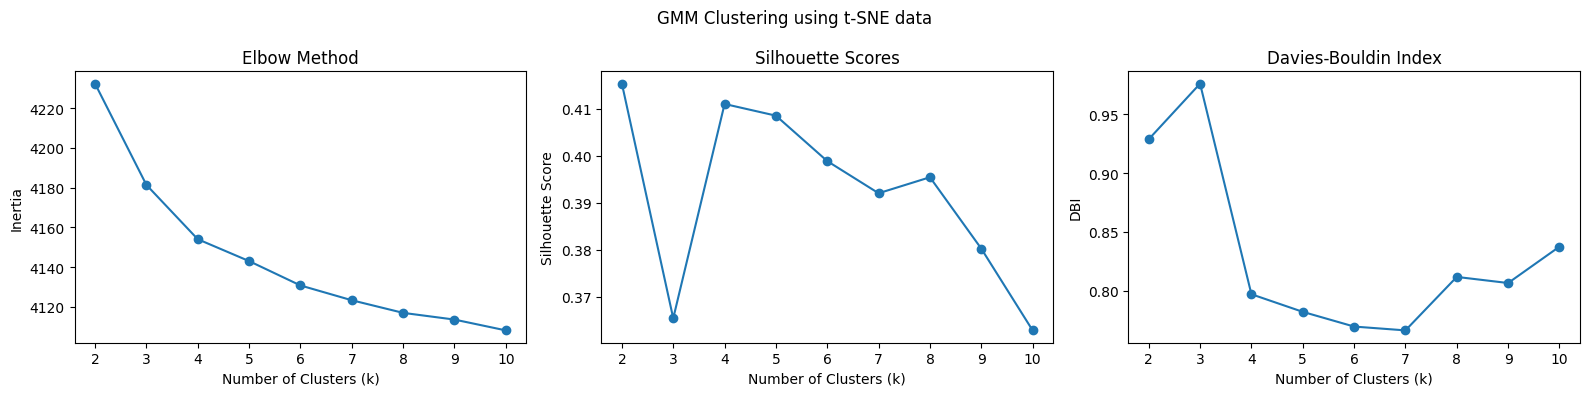

Evaluating clustering parameters for UMAP reduced data:


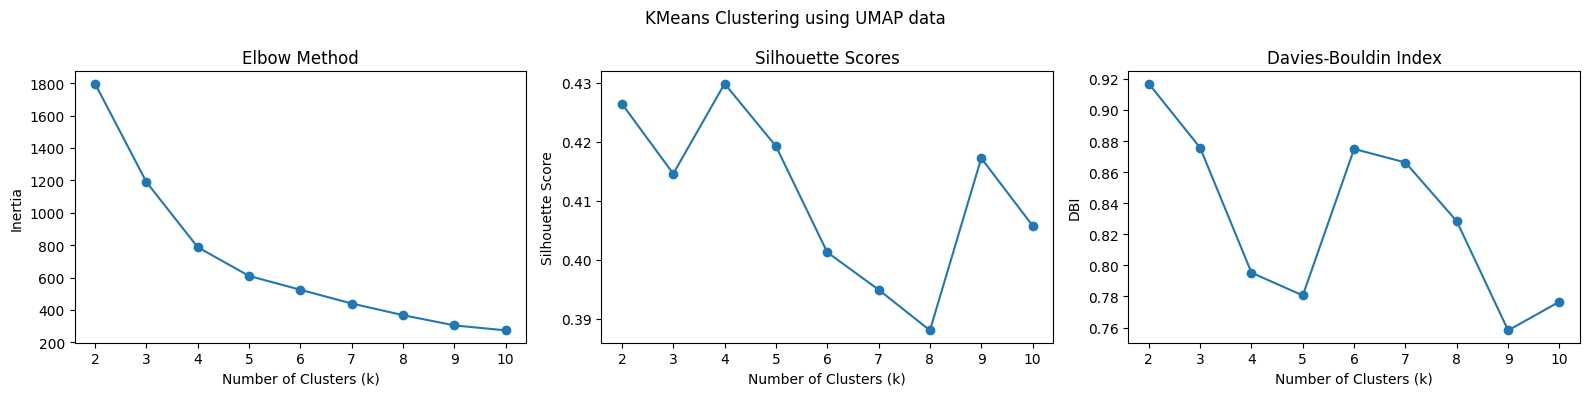

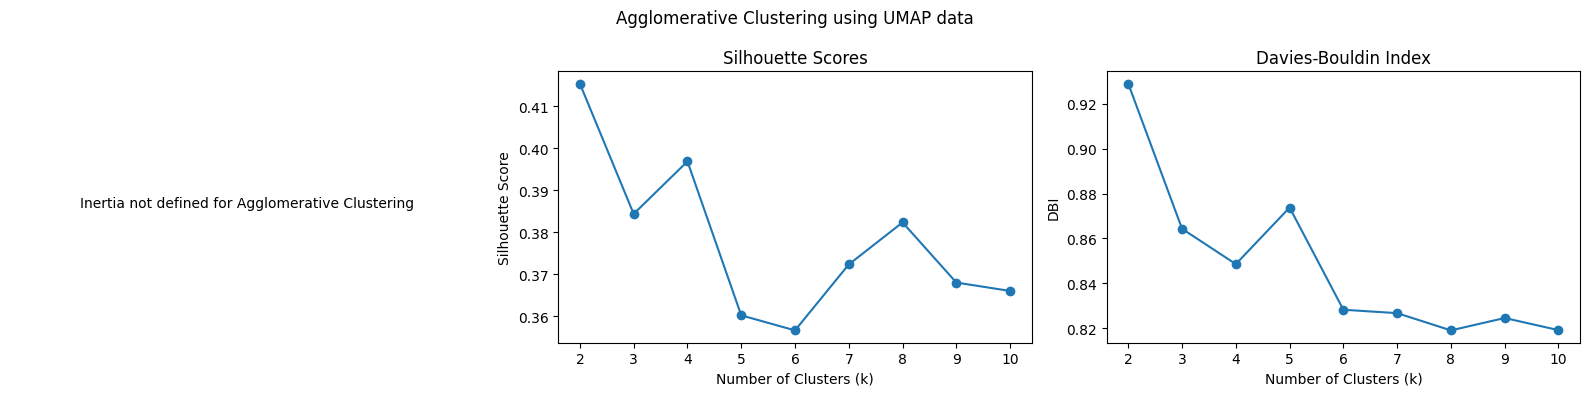

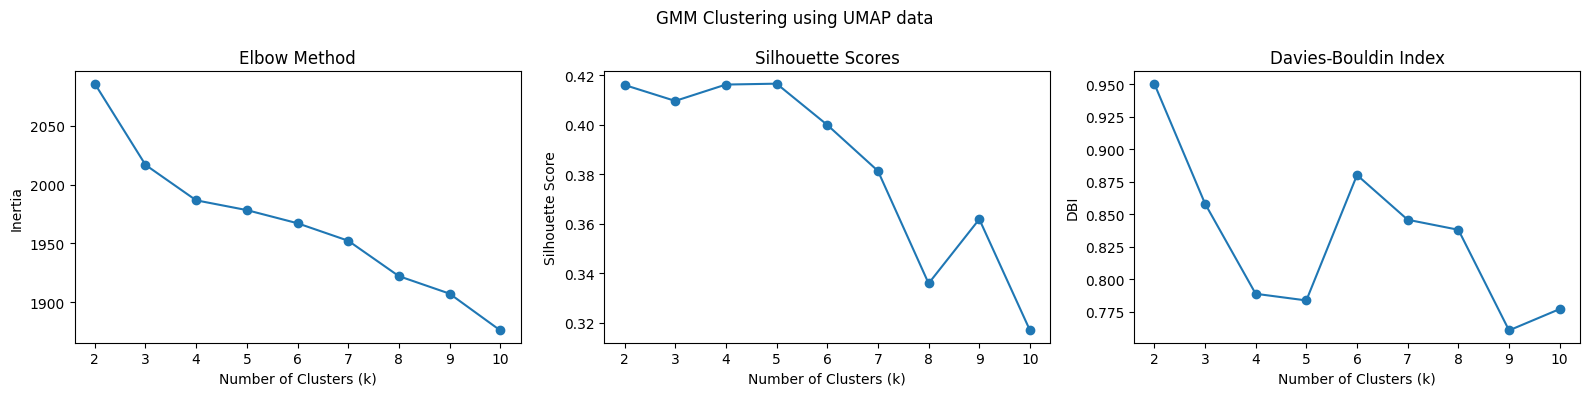


Clustering using KMeans on t-SNE reduced data with 4 clusters.
KMeans - Silhouette Score: 0.426, Davies-Bouldin Index: 0.768


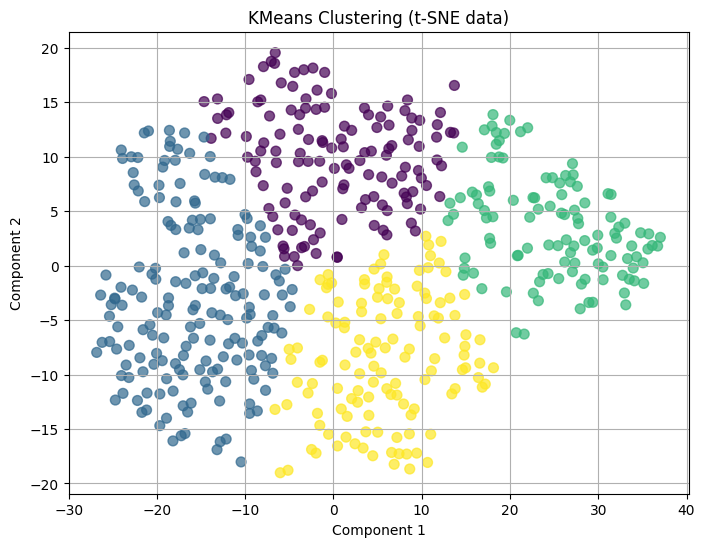

In [84]:
# Load your data into DataFrame 'df'

# Step 1: Data Preparation and Feature Calculation
player_stats = prepare_player_statistics(df, min_shots=1000, season= ['2014-15', '2023-24'])

# Step 2: Feature Selection
selected_features = feature_selection(player_stats)
features_df = player_stats[selected_features]

# Step 3: Dimensionality Reduction
reduced_data_dict = dimensionality_reduction(features_df, methods=['PCA', 't-SNE', 'UMAP'])

# Step 4: Evaluate Clustering Parameters for Each Dimensionality Reduction Method
for method_name, reduced_data in reduced_data_dict.items():
    print(f"Evaluating clustering parameters for {method_name} reduced data:")
    metrics_dict = evaluate_clustering_parameters(reduced_data, method_name=method_name, max_k=10)

method_name = 't-SNE'  # Choose from 'PCA', 't-SNE', 'UMAP'
clustering_method = 'KMeans'  # Choose from 'KMeans', 'Agglomerative', 'GMM', 'DBSCAN'
n_clusters = 4  # Set the number of clusters as desired

cluster_labels = cluster_data(reduced_data_dict, method_name=method_name, clustering_method=clustering_method, n_clusters=n_clusters)

player_data_with_clusters = get_player_data_with_clusters(player_stats, selected_features, cluster_labels)



In [30]:
# Step 6: Plot Radar Charts for Selected Players
player_names = ['Brook Lopez']
features_to_plot = ['shot_distance_std', 'eFG%', 'Pct_Shots_Above the Break 3', 'Pct_Shots_In The Paint (Non-RA)', 'Pct_Shots_Corner 3', 'Pct_Shots_Mid-Range', 'Pct_Shots_Restricted Area', 'Pct_Makes_Above the Break 3', 'Pct_Makes_In The Paint (Non-RA)', 'Pct_Makes_Corner 3', 'Pct_Makes_Mid-Range', 'Pct_Makes_Restricted Area', ]
plot_player_radar_chart(player_data_with_clusters, player_names, features_to_plot, season=None)

# Step 7: Perform Random Forest Model to Determine Feature Importance
feature_importances = random_forest_feature_importance(features_df, cluster_labels)
print(feature_importances)


NameError: name 'player_data_with_clusters' is not defined

# Parte 2 por temporada


In [9]:
def prepare_player_statistics(df, min_shots=300, season_range=None):
    """
    Prepare and calculate player statistics per season.

    Parameters:
    - df: pandas DataFrame containing the data.
    - min_shots: minimum number of shots per player per season to include.
    - season_range: tuple of (start_season, end_season), e.g., ('2014-15', '2020-2021')

    Returns:
    - player_stats: DataFrame with each player's statistics per season.
    """
    import pandas as pd
    import numpy as np

    # Copy the DataFrame to avoid modifying the original data
    df_filtered = df.copy()

    # Apply initial filters
    df_filtered = df_filtered[df_filtered['basic_zone_number'] != 0]

    # Apply season filter if 'season_range' parameter is provided
    if season_range is not None:
        # Function to parse season strings like '2014-15' or '2020-2021'
        def parse_season(season_str):
            season_str = season_str.replace(' ', '')
            if '-' in season_str:
                parts = season_str.split('-')
                start_year = int(parts[0])
                if len(parts[1]) == 2:
                    end_year = int(parts[0][:2] + parts[1])
                else:
                    end_year = int(parts[1])
            else:
                start_year = int(season_str)
                end_year = start_year + 1
            return start_year, end_year

        # Generate list of seasons between start and end seasons
        def generate_seasons(start_season_str, end_season_str):
            start_year, _ = parse_season(start_season_str)
            end_year, _ = parse_season(end_season_str)
            seasons = []
            for year in range(start_year, end_year + 1):
                seasons.append(f"{year}-{str(year+1)[-2:]}")
            return seasons

        seasons_to_include = generate_seasons(season_range[0], season_range[1])
        df_filtered = df_filtered[df_filtered['season_2'].isin(seasons_to_include)]

    data = df_filtered.copy()

    # Ensure necessary columns exist
    required_columns = [
        'season_2', 'team_name', 'game_date', 'player_id', 'player_name', 'game_id',
        'shot_made_flag', 'shot_type', 'action_type_number', 'basic_zone',
        'shot_distance', 'loc_x', 'loc_y'
    ]
    for col in required_columns:
        if col not in data.columns:
            print(f"Error: '{col}' column not found in data.")
            return

    # Each row represents one field goal attempt
    data['FGA'] = 1
    data['FGM'] = data['shot_made_flag']  # 1 for made shots, 0 for missed
    data['3PT_Attempted'] = (data['shot_type'] == '3PT Field Goal').astype(int)
    data['2PT_Attempted'] = (data['shot_type'] == '2PT Field Goal').astype(int)
    data['3PT_Made'] = data['FGM'] * data['3PT_Attempted']
    data['2PT_Made'] = data['FGM'] * data['2PT_Attempted']

    # Group by player and season to calculate totals and averages
    player_totals = data.groupby(['player_id', 'player_name', 'season_2']).agg(
        avg_shot_distance=('shot_distance', 'mean'),
        shot_distance_std=('shot_distance', 'std'),
        total_FGA=('FGA', 'sum'),
        total_FGM=('FGM', 'sum'),
        total_3PT_Attempted=('3PT_Attempted', 'sum'),
        total_3PT_Made=('3PT_Made', 'sum'),
        total_2PT_Attempted=('2PT_Attempted', 'sum'),
        total_2PT_Made=('2PT_Made', 'sum'),
        avg_loc_x=('loc_x', 'mean'),
        avg_loc_y=('loc_y', 'mean')
    ).reset_index()

    # Apply 'min_shots' filter per player per season
    player_totals = player_totals[player_totals['total_FGA'] >= min_shots]

    # Calculate eFG%
    player_totals['eFG%'] = (
        (player_totals['total_FGM'] + 0.5 * player_totals['total_3PT_Made']) / player_totals['total_FGA']
    )

    # Calculate 3PT_Ratio and 2PT_Ratio
    player_totals['3PT_Ratio'] = player_totals['total_3PT_Attempted'] / player_totals['total_FGA']
    player_totals['2PT_Ratio'] = player_totals['total_2PT_Attempted'] / player_totals['total_FGA']

    # Calculate 2PT% and 3PT%
    player_totals['2PT%'] = player_totals['total_2PT_Made'] / player_totals['total_2PT_Attempted']
    player_totals['3PT%'] = player_totals['total_3PT_Made'] / player_totals['total_3PT_Attempted']

    # Handle division by zero
    player_totals['2PT%'].fillna(0, inplace=True)
    player_totals['3PT%'].fillna(0, inplace=True)

    # Round percentages to 3 decimal places
    player_totals['eFG%'] = player_totals['eFG%'].round(3)
    player_totals['2PT%'] = player_totals['2PT%'].round(3)
    player_totals['3PT%'] = player_totals['3PT%'].round(3)
    player_totals['3PT_Ratio'] = player_totals['3PT_Ratio'].round(3)
    player_totals['2PT_Ratio'] = player_totals['2PT_Ratio'].round(3)

    # Step 1a: Calculate percentages for basic zones

    # Combine 'Left Corner 3' and 'Right Corner 3' into 'Corner 3'
    data['basic_zone_modified'] = data['basic_zone'].replace({
        'Left Corner 3': 'Corner 3',
        'Right Corner 3': 'Corner 3'
    })

    # Calculate total shots and makes per player per season per basic zone
    zone_stats = data.groupby(['player_id', 'player_name', 'season_2', 'basic_zone_modified']).agg(
        zone_FGA=('FGA', 'sum'),
        zone_FGM=('FGM', 'sum')
    ).reset_index()

    # Pivot to get zones as columns
    zone_fga_pivot = zone_stats.pivot_table(index=['player_id', 'player_name', 'season_2'],
                                            columns='basic_zone_modified',
                                            values='zone_FGA',
                                            fill_value=0)
    zone_fgm_pivot = zone_stats.pivot_table(index=['player_id', 'player_name', 'season_2'],
                                            columns='basic_zone_modified',
                                            values='zone_FGM',
                                            fill_value=0)

    # Calculate total FGA per player per season for normalization
    total_zone_fga = zone_fga_pivot.sum(axis=1)

    # Calculate percentages of shots taken from each zone
    zone_fga_pivot_percent = zone_fga_pivot.div(total_zone_fga, axis=0)

    # Calculate field goal percentages for each zone
    zone_fg_percent = zone_fgm_pivot.div(zone_fga_pivot).fillna(0)

    # Round percentages to 3 decimal places
    zone_fga_pivot_percent = zone_fga_pivot_percent.round(3)
    zone_fg_percent = zone_fg_percent.round(3)

    # Rename columns
    zone_fga_pivot_percent.columns = [f'Pct_Shots_{col}' for col in zone_fga_pivot_percent.columns]
    zone_fg_percent.columns = [f'Pct_Makes_{col}' for col in zone_fg_percent.columns]

    # Merge zone percentages into player_totals
    player_stats = player_totals.merge(zone_fga_pivot_percent.reset_index(),
                                       on=['player_id', 'player_name', 'season_2'], how='left')
    player_stats = player_stats.merge(zone_fg_percent.reset_index(),
                                      on=['player_id', 'player_name', 'season_2'], how='left')

    # Step 1b: Calculate percentages for shot distance ranges

    # Define shot distance categories
    def categorize_shot_distance(distance, shot_type):
        if distance <= 3:
            return '0-3 ft'
        elif 3 < distance <= 10:
            return '3-10 ft'
        elif 10 < distance <= 16:
            return '10-16 ft'
        elif distance > 16 and shot_type != '3PT Field Goal':
            return '16+ ft (2PT)'
        elif shot_type == '3PT Field Goal':
            return '3PT Attempt'
        else:
            return 'Other'

    data['distance_range'] = data.apply(lambda row: categorize_shot_distance(row['shot_distance'], row['shot_type']), axis=1)

    # Calculate total shots and makes per player per season per distance range
    distance_stats = data.groupby(['player_id', 'player_name', 'season_2', 'distance_range']).agg(
        dist_FGA=('FGA', 'sum'),
        dist_FGM=('FGM', 'sum')
    ).reset_index()

    # Pivot to get distance ranges as columns
    dist_fga_pivot = distance_stats.pivot_table(index=['player_id', 'player_name', 'season_2'],
                                                columns='distance_range',
                                                values='dist_FGA',
                                                fill_value=0)
    dist_fgm_pivot = distance_stats.pivot_table(index=['player_id', 'player_name', 'season_2'],
                                                columns='distance_range',
                                                values='dist_FGM',
                                                fill_value=0)

    # Calculate total FGA per player per season for normalization
    total_dist_fga = dist_fga_pivot.sum(axis=1)

    # Calculate percentages of shots taken from each distance range
    dist_fga_pivot_percent = dist_fga_pivot.div(total_dist_fga, axis=0)

    # Calculate field goal percentages for each distance range
    dist_fg_percent = dist_fgm_pivot.div(dist_fga_pivot).fillna(0)

    # Round percentages to 3 decimal places
    dist_fga_pivot_percent = dist_fga_pivot_percent.round(3)
    dist_fg_percent = dist_fg_percent.round(3)

    # Rename columns
    dist_fga_pivot_percent.columns = [f'Pct_Shots_{col}' for col in dist_fga_pivot_percent.columns]
    dist_fg_percent.columns = [f'Pct_Makes_{col}' for col in dist_fg_percent.columns]

    # Merge distance percentages into player_stats
    player_stats = player_stats.merge(dist_fga_pivot_percent.reset_index(),
                                      on=['player_id', 'player_name', 'season_2'], how='left')
    player_stats = player_stats.merge(dist_fg_percent.reset_index(),
                                      on=['player_id', 'player_name', 'season_2'], how='left')

    # Ensure all percentage columns are filled
    player_stats.fillna(0, inplace=True)

    return player_stats


In [47]:
def feature_selection(player_stats, non_feature_cols=None):
    """
    Perform feature selection by analyzing correlations.

    Parameters:
    - player_stats: DataFrame with player statistics.
    - non_feature_cols: List of columns to exclude from features.

    Returns:
    - selected_features: List of selected feature names.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np

    # Exclude non-numeric columns
    numeric_cols = player_stats.select_dtypes(include=['number']).columns.tolist()

    # Default non-feature columns
    if non_feature_cols is None:
        non_feature_cols = ['player_id', 'total_FGA', 'season_2', 'total_FGM', 'total_3PT_Attempted', 'total_3PT_Made',
                        'total_2PT_Attempted', 'total_2PT_Made', 'avg_loc_x', 'avg_loc_y', 'pct_team_shots',
                        'Pct_Shots_0-3 ft', 'Pct_Shots_10-16 ft', 'Pct_Shots_16+ ft (2PT)',
                        'Pct_Shots_3-10 ft', 'Pct_Shots_3PT Attempt', 'Pct_Makes_0-3 ft',
                        'Pct_Makes_10-16 ft', 'Pct_Makes_16+ ft (2PT)', 'Pct_Makes_3-10 ft', 'Pct_Shots_0-3 ft',
                        'Pct_Makes_3PT Attempt',
                        # 'Pct_Shots_Above the Break 3', 'Pct_Shots_Corner 3', 'Pct_Shots_In The Paint (Non-RA)', 
                        # 'Pct_Shots_Mid-Range', 'Pct_Shots_Restricted Area', 'Pct_Makes_Above the Break 3', 'Pct_Makes_Corner 3', 
                        # 'Pct_Makes_In The Paint (Non-RA)', 'Pct_Makes_Mid-Range', 'Pct_Makes_Restricted Area'
                        # 'avg_shot_distance', 
                        # '3PT_Ratio', '2PT_Ratio', '2PT%', '3PT%',
                        ]

    features = player_stats[numeric_cols].drop(columns=non_feature_cols, errors='ignore')
    print("Selected features:")
    print(features.columns.tolist())

    # Compute correlation matrix
    corr_matrix = features.corr()

    # Plot correlation heatmap
    plt.figure(figsize=(16, 14))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
    plt.title('Correlation Heatmap of Features')
    plt.show()

    # Optionally, you can select features based on correlation thresholds
    threshold = 0.75
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]

    print(f"Features to drop due to high correlation (>{threshold}): {to_drop}")

    # Select features to keep
    selected_features = [col for col in features.columns # if col not in to_drop
                         ]

    return selected_features


# falsdca


In [37]:
def dimensionality_reduction(features_df, methods=['PCA', 't-SNE', 'UMAP']):
    """
    Apply dimensionality reduction methods.

    Parameters:
    - features_df: DataFrame with selected features.
    - methods: List of dimensionality reduction methods to apply.

    Returns:
    - reduced_data_dict: Dictionary with method names as keys and reduced data as values.
    """
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    from sklearn.manifold import TSNE
    import matplotlib.pyplot as plt
    import numpy as np

    reduced_data_dict = {}

    # Standardize the features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features_df)
    explained_variance_threshold = 0.80
    if 'PCA' in methods:
        # Apply PCA
        pca_temp = PCA()
        pca_temp.fit(features_scaled)
        cumulative_variance = pca_temp.explained_variance_ratio_.cumsum()
        n_components = next(i for i, total in enumerate(cumulative_variance, 1) if total >= explained_variance_threshold)
        print(f"Number of components to explain {explained_variance_threshold * 100}% variance: {n_components}")

        # Visualization of Explained Variance
        plt.figure(figsize=(10, 6))
        plt.bar(range(1, len(pca_temp.explained_variance_ratio_) + 1), pca_temp.explained_variance_ratio_, alpha=0.7, label='Individual Component Variance')
        plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='red', label='Cumulative Variance')
        plt.axhline(y=explained_variance_threshold, color='green', linestyle='--', label=f'{explained_variance_threshold * 100}% Threshold')
        plt.axvline(x=n_components, color='blue', linestyle='--', label=f'{n_components} Components')
        plt.title('PCA Explained Variance Analysis')
        plt.xlabel('Principal Component')
        plt.ylabel('Variance Explained')
        plt.xticks(range(1, len(cumulative_variance) + 1))
        plt.legend(loc='best')
        plt.grid(axis='y')
        plt.show()

        # Apply PCA with the determined number of components
        pca = PCA(n_components=n_components)
        pca_components = pca.fit_transform(features_scaled)
        reduced_data_dict['PCA'] = pca_components
        
    if 't-SNE' in methods:
        # Apply t-SNE
        tsne = TSNE(n_components=3, random_state=42)
        tsne_components = tsne.fit_transform(features_scaled)
        reduced_data_dict['t-SNE'] = tsne_components

    if 'UMAP' in methods:
        # Apply UMAP
        import umap.umap_ as umap

        umap_model = umap.UMAP(n_neighbors=30, min_dist=0.0, random_state=42)
        umap_components = umap_model.fit_transform(features_scaled)
        reduced_data_dict['UMAP'] = umap_components

    return reduced_data_dict


In [12]:
def evaluate_clustering_parameters(reduced_data, method_name='PCA', max_k=10):
    """
    Evaluate clustering parameters using metrics like the elbow method,
    silhouette score, and Davies-Bouldin Index for KMeans, Agglomerative Clustering, and GMM.

    Parameters:
    - reduced_data: Numpy array of reduced data.
    - method_name: Name of the dimensionality reduction method used.
    - max_k: Maximum number of clusters to evaluate.

    Returns:
    - metrics_dict: Dictionary containing metrics for each clustering method and number of clusters.
    """
    from sklearn.cluster import KMeans, AgglomerativeClustering
    from sklearn.mixture import GaussianMixture
    from sklearn.metrics import silhouette_score, davies_bouldin_score
    import matplotlib.pyplot as plt
    import numpy as np

    k_range = range(2, max_k + 1)
    clustering_methods = ['KMeans', 'Agglomerative', 'GMM']
    metrics_dict = {method: {'inertia': [], 'silhouette': [], 'dbi': []} for method in clustering_methods}

    for k in k_range:
        # KMeans
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels_kmeans = kmeans.fit_predict(reduced_data)
        inertia = kmeans.inertia_
        silhouette_avg = silhouette_score(reduced_data, labels_kmeans)
        dbi = davies_bouldin_score(reduced_data, labels_kmeans)
        metrics_dict['KMeans']['inertia'].append(inertia)
        metrics_dict['KMeans']['silhouette'].append(silhouette_avg)
        metrics_dict['KMeans']['dbi'].append(dbi)

        # Agglomerative Clustering
        agglo = AgglomerativeClustering(n_clusters=k)
        labels_agglo = agglo.fit_predict(reduced_data)
        # No inertia for Agglomerative Clustering
        inertia = np.nan
        silhouette_avg = silhouette_score(reduced_data, labels_agglo)
        dbi = davies_bouldin_score(reduced_data, labels_agglo)
        metrics_dict['Agglomerative']['inertia'].append(inertia)
        metrics_dict['Agglomerative']['silhouette'].append(silhouette_avg)
        metrics_dict['Agglomerative']['dbi'].append(dbi)

        # Gaussian Mixture Model
        gmm = GaussianMixture(n_components=k, random_state=42)
        gmm.fit(reduced_data)
        labels_gmm = gmm.predict(reduced_data)
        # For GMM, we can use the negative log-likelihood as inertia
        inertia = -gmm.score(reduced_data) * len(reduced_data)
        silhouette_avg = silhouette_score(reduced_data, labels_gmm)
        dbi = davies_bouldin_score(reduced_data, labels_gmm)
        metrics_dict['GMM']['inertia'].append(inertia)
        metrics_dict['GMM']['silhouette'].append(silhouette_avg)
        metrics_dict['GMM']['dbi'].append(dbi)

    # Plotting
    for method in clustering_methods:
        plt.figure(figsize=(16, 4))
        plt.suptitle(f'{method} Clustering using {method_name} data')

        # Elbow Method (Inertia)
        plt.subplot(1, 3, 1)
        if method != 'Agglomerative':
            plt.plot(k_range, metrics_dict[method]['inertia'], marker='o')
            plt.title('Elbow Method')
            plt.xlabel('Number of Clusters (k)')
            plt.ylabel('Inertia')
        else:
            plt.text(0.5, 0.5, 'Inertia not defined for Agglomerative Clustering', ha='center')
            plt.axis('off')

        # Silhouette Scores
        plt.subplot(1, 3, 2)
        plt.plot(k_range, metrics_dict[method]['silhouette'], marker='o')
        plt.title('Silhouette Scores')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('Silhouette Score')

        # Davies-Bouldin Index
        plt.subplot(1, 3, 3)
        plt.plot(k_range, metrics_dict[method]['dbi'], marker='o')
        plt.title('Davies-Bouldin Index')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('DBI')

        plt.tight_layout()
        plt.show()

    return metrics_dict


In [13]:
def cluster_data(reduced_data_dict, method_name='PCA', clustering_method='KMeans', n_clusters=4):
    """
    Apply specified clustering algorithm and evaluate its performance.

    Parameters:
    - reduced_data_dict: Dictionary with method names as keys and reduced data as values.
    - method_name: Name of the dimensionality reduction method to use ('PCA', 't-SNE', 'UMAP').
    - clustering_method: Clustering algorithm to use ('KMeans', 'Agglomerative', 'GMM', 'DBSCAN').
    - n_clusters: Number of clusters to use (for applicable algorithms).

    Returns:
    - labels: Cluster labels for each data point.
    """
    from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
    from sklearn.mixture import GaussianMixture
    from sklearn.metrics import silhouette_score, davies_bouldin_score
    import matplotlib.pyplot as plt

    data = reduced_data_dict[method_name]
    print(f"\nClustering using {clustering_method} on {method_name} reduced data with {n_clusters} clusters.")

    # Initialize variables
    labels = None
    silhouette_avg = None
    db_index = None

    # Clustering based on specified method
    if clustering_method == 'KMeans':
        model = KMeans(n_clusters=n_clusters, random_state=42)
        labels = model.fit_predict(data)
    elif clustering_method == 'Agglomerative':
        model = AgglomerativeClustering(n_clusters=n_clusters)
        labels = model.fit_predict(data)
    elif clustering_method == 'GMM':
        model = GaussianMixture(n_components=n_clusters, random_state=42)
        labels = model.fit_predict(data)
    else:
        print("Invalid clustering method specified.")
        return None

    # Evaluate clustering performance
    unique_labels = set(labels)
    if len(unique_labels) > 1 and -1 not in unique_labels:
        silhouette_avg = silhouette_score(data, labels)
        db_index = davies_bouldin_score(data, labels)
        print(f"{clustering_method} - Silhouette Score: {silhouette_avg:.3f}, Davies-Bouldin Index: {db_index:.3f}")
    else:
        print(f"{clustering_method} - Unable to calculate metrics (only one cluster detected)")

     # Visualization
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
    
    # Create a legend
    handles = []
    for label in unique_labels:
        handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=10, label=f'Cluster {label}'))
    plt.legend(handles=handles, title="Clusters", loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small')

    plt.title(f'{clustering_method} Clustering ({method_name} data)')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return labels


In [14]:
def get_player_data_with_clusters(player_stats, selected_features, cluster_labels):
    """
    Merge cluster labels into player_stats and output DataFrame with selected features and player names.

    Parameters:
    - player_stats: DataFrame with player statistics.
    - selected_features: List of selected feature names.
    - cluster_labels: Cluster labels for each player per season.

    Returns:
    - player_data_with_clusters: DataFrame with player names, selected features, cluster labels, and season.
    """
    # Ensure that the length of cluster_labels matches the number of records
    if len(cluster_labels) != len(player_stats):
        print("Error: The number of cluster labels does not match the number of records.")
        return None

    player_data = player_stats[['player_id', 'player_name', 'season_2'] + selected_features].copy()
    player_data['cluster'] = cluster_labels

    return player_data


In [15]:
def analyze_player_cluster_changes(player_data_with_clusters):
    """
    Analyze if players changed clusters throughout their careers.

    Parameters:
    - player_data_with_clusters: DataFrame with player data, including 'player_id', 'player_name', 'season_2', and 'cluster'.

    Returns:
    - player_cluster_changes: DataFrame with players and their cluster assignments over seasons.
    """
    import pandas as pd

    # Pivot the data to have seasons as columns
    player_clusters_over_time = player_data_with_clusters.pivot_table(index=['player_id', 'player_name'],
                                                                      columns='season_2',
                                                                      values='cluster',
                                                                      aggfunc='first')

    # Identify players who changed clusters
    player_clusters_over_time['num_unique_clusters'] = player_clusters_over_time.nunique(axis=1)

    players_who_changed_clusters = player_clusters_over_time[player_clusters_over_time['num_unique_clusters'] > 1]
    with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
        print(players_who_changed_clusters)
    players_who_stayed_same_cluster = player_clusters_over_time[player_clusters_over_time['num_unique_clusters'] == 1]

    print(f"Number of players who changed clusters: {len(players_who_changed_clusters)}")
    print(f"Number of players who stayed in the same cluster: {len(players_who_stayed_same_cluster)}")

    return player_clusters_over_time


# Analyze Metrics over time


In [16]:
def analyze_cluster_metrics_over_time(player_data_with_clusters, features_to_analyze, time_column='season_2'):
    """
    Analyze how clusters' average metrics have changed over time.

    Parameters:
    - player_data_with_clusters: DataFrame with player data, including time_column and 'cluster'.
    - features_to_analyze: List of features to analyze over time.
    - time_column: Column representing time (e.g., 'season_2' or 'season_block').

    Returns:
    - cluster_metrics_over_time: DataFrame with average metrics per cluster per time period.
    """
    import pandas as pd

    # Group data by time and cluster, calculate mean of features
    cluster_metrics_over_time = player_data_with_clusters.groupby([time_column, 'cluster'])[features_to_analyze].mean().reset_index()

    # Print out the stats per cluster
    clusters = sorted(cluster_metrics_over_time['cluster'].unique())
    for cluster in clusters:
        print(f"\nStatistics for Cluster {cluster}:\n")
        cluster_data = cluster_metrics_over_time[cluster_metrics_over_time['cluster'] == cluster]

        for feature in features_to_analyze:
            print(f"Feature: {feature}")
            feature_data = cluster_data[[time_column, feature]].set_index(time_column)
            print(feature_data.round(3))  # Round to 3 decimal places for readability
            print()  # Empty line for better separation

    return cluster_metrics_over_time


In [17]:
def plot_metrics_over_time(cluster_metrics_over_time, features_to_analyze, clusters_to_plot=None, time_column='season_2'):
    """
    Plot how clusters' average metrics have changed over time.

    Parameters:
    - cluster_metrics_over_time: DataFrame with average metrics per cluster per time period.
    - features_to_analyze: List of features to plot.
    - clusters_to_plot: List of clusters to include in the plots (optional).
    - time_column: Column representing time (e.g., 'season_2' or 'season_block').

    Returns:
    - None
    """
    import matplotlib.pyplot as plt
    import pandas as pd

    time_periods = sorted(cluster_metrics_over_time[time_column].unique())

    for feature in features_to_analyze:
        plt.figure(figsize=(12, 6))
        for cluster in cluster_metrics_over_time['cluster'].unique():
            if clusters_to_plot is not None and cluster not in clusters_to_plot:
                continue
            cluster_data = cluster_metrics_over_time[cluster_metrics_over_time['cluster'] == cluster]
            plt.plot(cluster_data[time_column], cluster_data[feature], marker='o', label=f'Cluster {cluster}')
        plt.title(f'{feature} Over Time per Cluster')
        plt.xlabel('Time')
        plt.ylabel(feature)
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


In [18]:
def plot_player_radar_chart(player_data, player_names, features, season=None):
    """
    Plot radar charts for specified players and features.

    Parameters:
    - player_data: DataFrame with player data, including 'player_name' and features.
    - player_names: List of player names to visualize.
    - features: List of feature names to include in the radar chart.
    - season: Season to filter data (optional).

    Returns:
    - None
    """
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np

    # Filter data for specified season if provided
    if season is not None:
        player_data = player_data[player_data['season_2'] == season]

    # Filter data for specified players
    data_to_plot = player_data[player_data['player_name'].isin(player_names)]

    # Normalize features for radar chart (optional)
    # You can choose to normalize data to [0,1] range for better visualization
    data_normalized = data_to_plot.copy()
    for feature in features:
        min_val = player_data[feature].min()
        max_val = player_data[feature].max()
        data_normalized[feature] = (data_normalized[feature] - min_val) / (max_val - min_val)

    categories = features
    N = len(categories)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Complete the circle

    plt.figure(figsize=(8, 8))

    for index, row in data_normalized.iterrows():
        values = row[features].tolist()
        values += values[:1]
        plt.polar(angles, values, marker='o', label=row['player_name'] + {row['season_2']} + f" (Cluster {row['cluster']})")
        plt.fill(angles, values, alpha=0.1)

    plt.xticks(angles[:-1], categories, size=8)
    plt.title('Player Radar Chart')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    plt.show()


In [19]:
def plot_player_radar_chart(player_data, player_names, features, season=None):
    """
    Plot radar charts for specified players and features.

    Parameters:
    - player_data: DataFrame with player data, including 'player_name' and features.
    - player_names: List of player names to visualize.
    - features: List of feature names to include in the radar chart.
    - season: Season to filter data (optional).

    Returns:
    - None
    """
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np

    # Filter data for specified season if provided
    if season is not None:
        player_data = player_data[player_data['season_2'] == season]

    # Filter data for specified players
    data_to_plot = player_data[player_data['player_name'].isin(player_names)]

    # Normalize features for radar chart (optional)
    # You can choose to normalize data to [0,1] range for better visualization
    data_normalized = data_to_plot.copy()
    for feature in features:
        min_val = player_data[feature].min()
        max_val = player_data[feature].max()
        data_normalized[feature] = (data_normalized[feature] - min_val) / (max_val - min_val)

    categories = features
    N = len(categories)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Complete the circle

    plt.figure(figsize=(8, 8))

    for index, row in data_normalized.iterrows():
        values = row[features].tolist()
        values += values[:1]
        plt.polar(angles, values, marker='o', label=row['player_name'] + {row['season_2']} + f" (Cluster {row['cluster']})")
        plt.fill(angles, values, alpha=0.1)

    plt.xticks(angles[:-1], categories, size=8)
    plt.title('Player Radar Chart')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    plt.show()


# Run the code

C:\Users\thiag\AppData\Local\Temp\ipykernel_6556\434860671.py:103: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  player_totals['2PT%'].fillna(0, inplace=True)
C:\Users\thiag\AppData\Local\Temp\ipykernel_6556\434860671.py:104: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

Selected features:
['avg_shot_distance', 'shot_distance_std', 'eFG%', '3PT_Ratio', '2PT_Ratio', '2PT%', '3PT%', 'Pct_Shots_Above the Break 3', 'Pct_Shots_Corner 3', 'Pct_Shots_In The Paint (Non-RA)', 'Pct_Shots_Mid-Range', 'Pct_Shots_Restricted Area', 'Pct_Makes_Above the Break 3', 'Pct_Makes_Corner 3', 'Pct_Makes_In The Paint (Non-RA)', 'Pct_Makes_Mid-Range', 'Pct_Makes_Restricted Area']


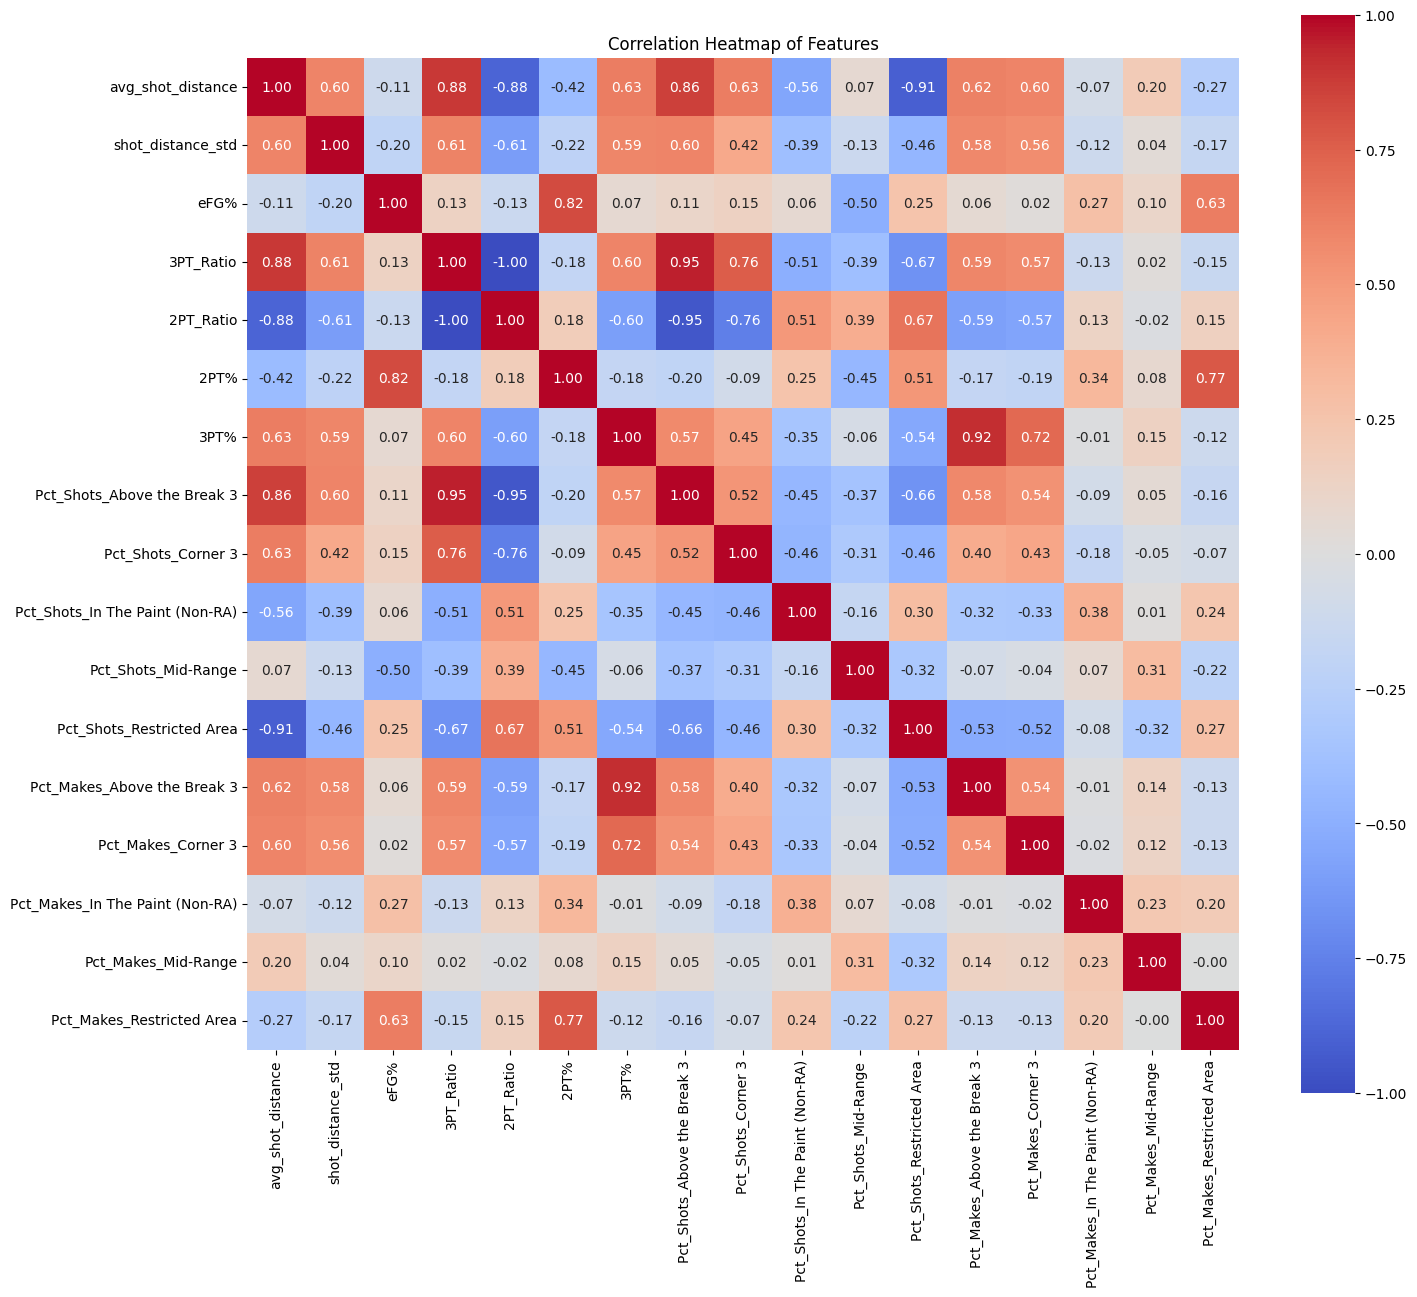

Features to drop due to high correlation (>0.75): ['3PT_Ratio', '2PT_Ratio', '2PT%', 'Pct_Shots_Above the Break 3', 'Pct_Shots_Corner 3', 'Pct_Shots_Restricted Area', 'Pct_Makes_Above the Break 3', 'Pct_Makes_Restricted Area']
Number of components to explain 80.0% variance: 5


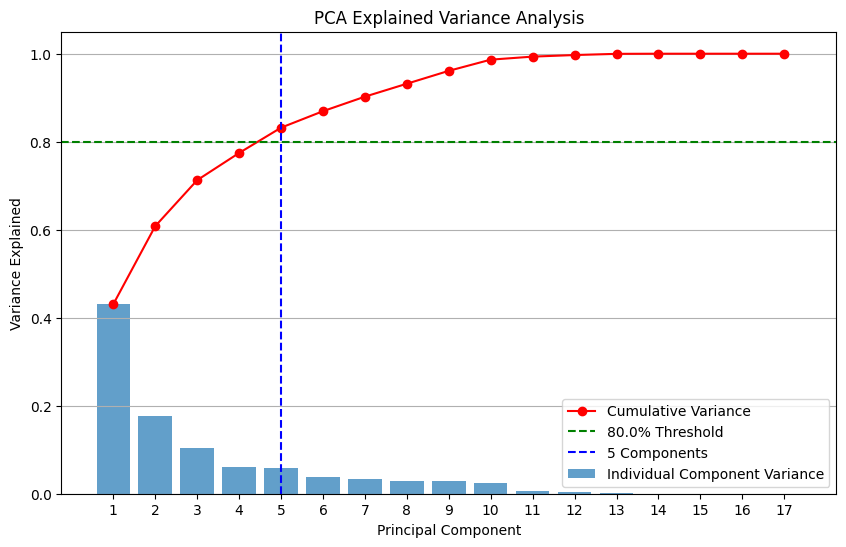

C:\Users\thiag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Evaluating clustering parameters for PCA reduced data:


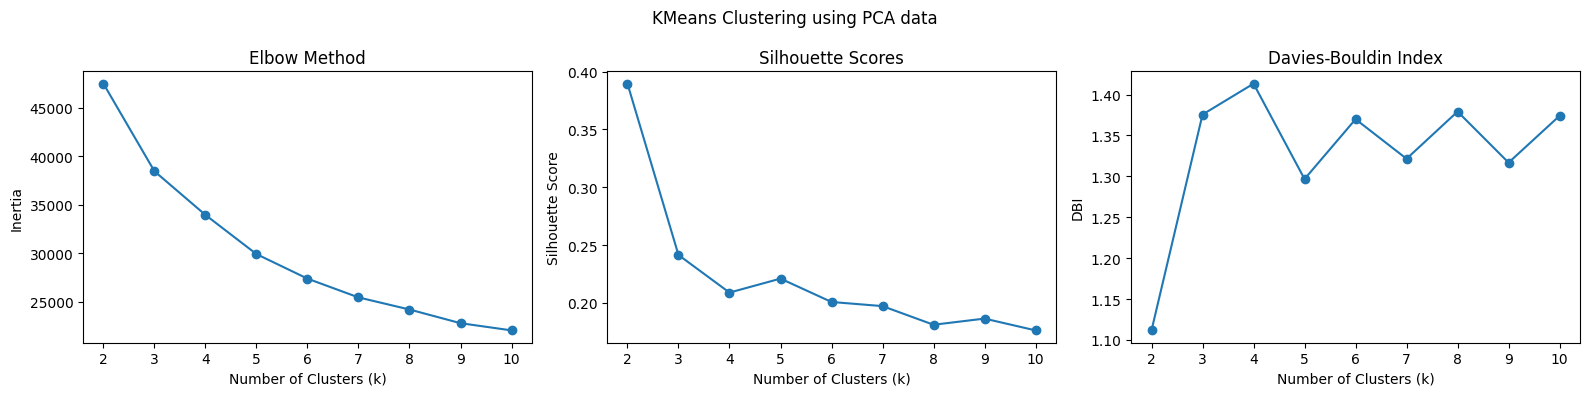

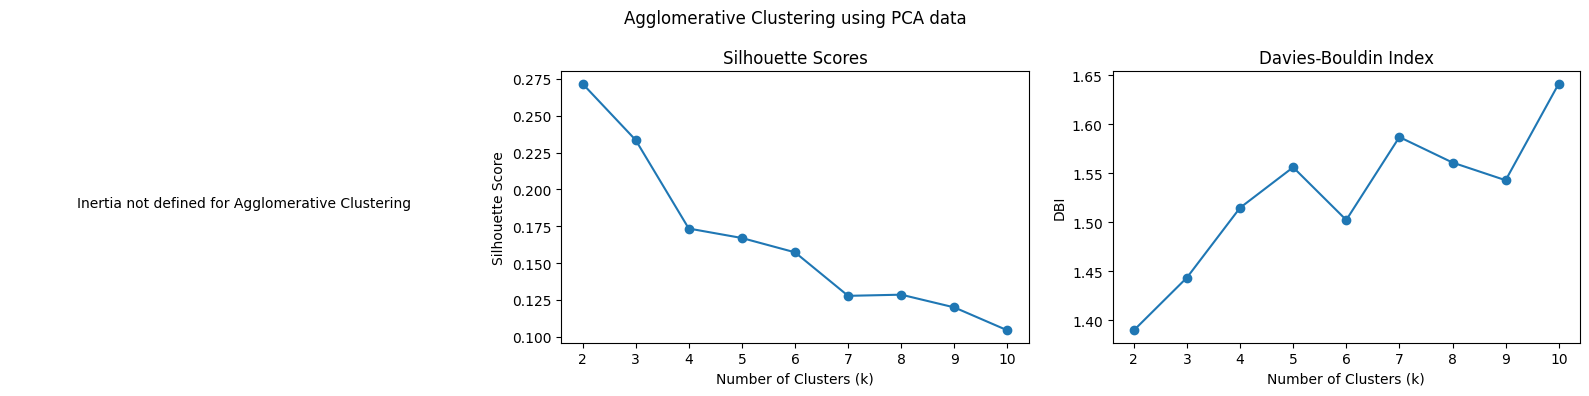

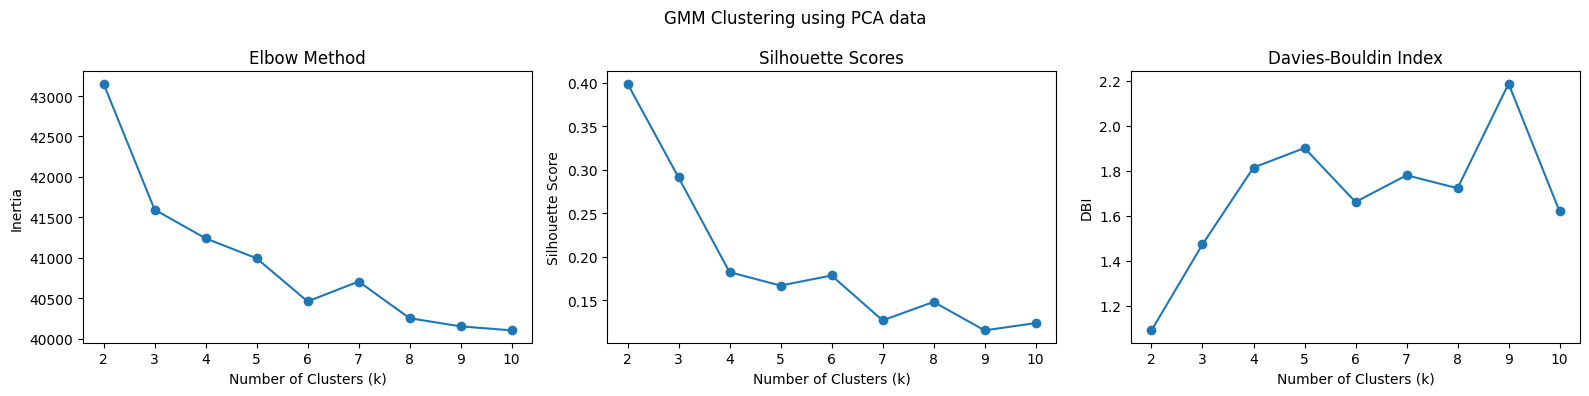

Evaluating clustering parameters for t-SNE reduced data:


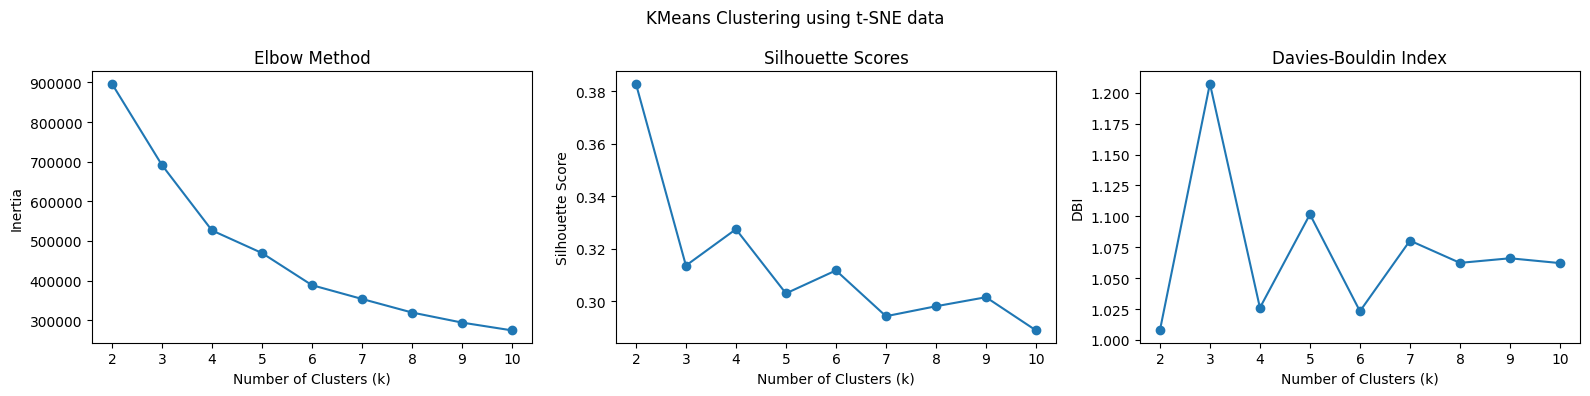

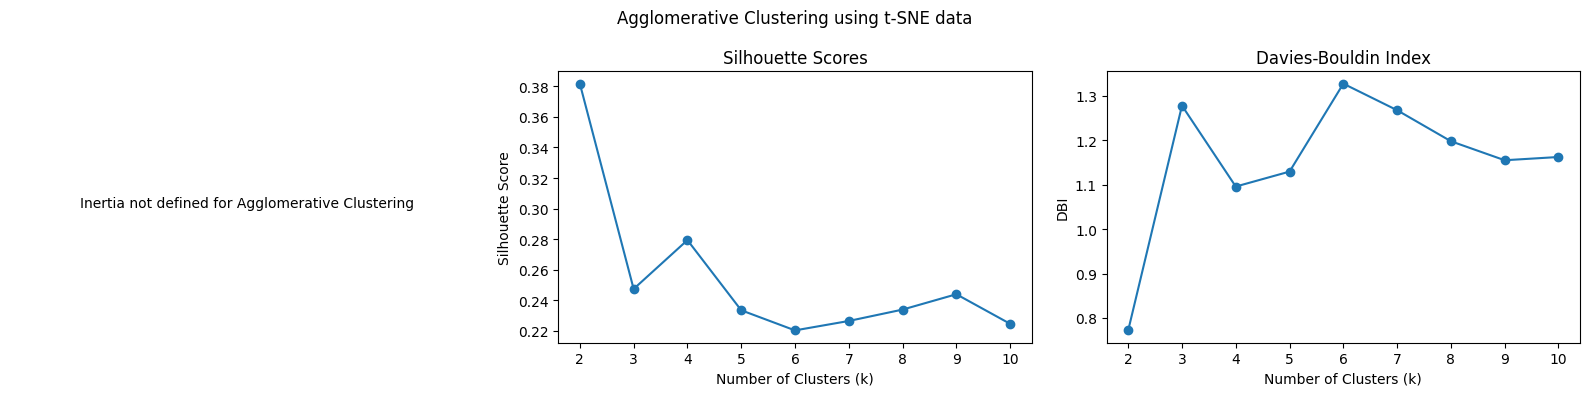

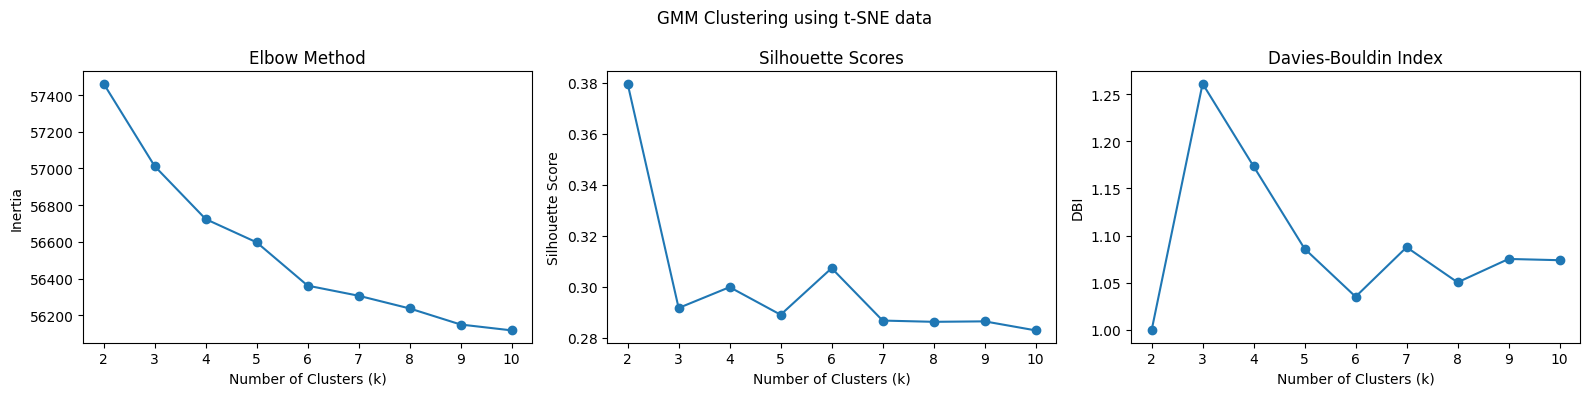

Evaluating clustering parameters for UMAP reduced data:


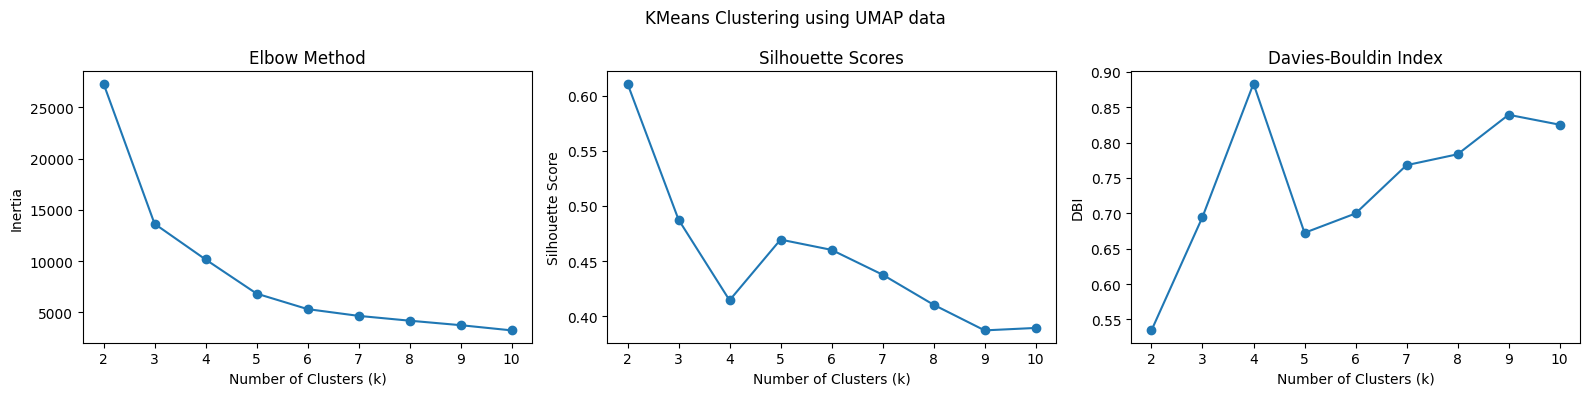

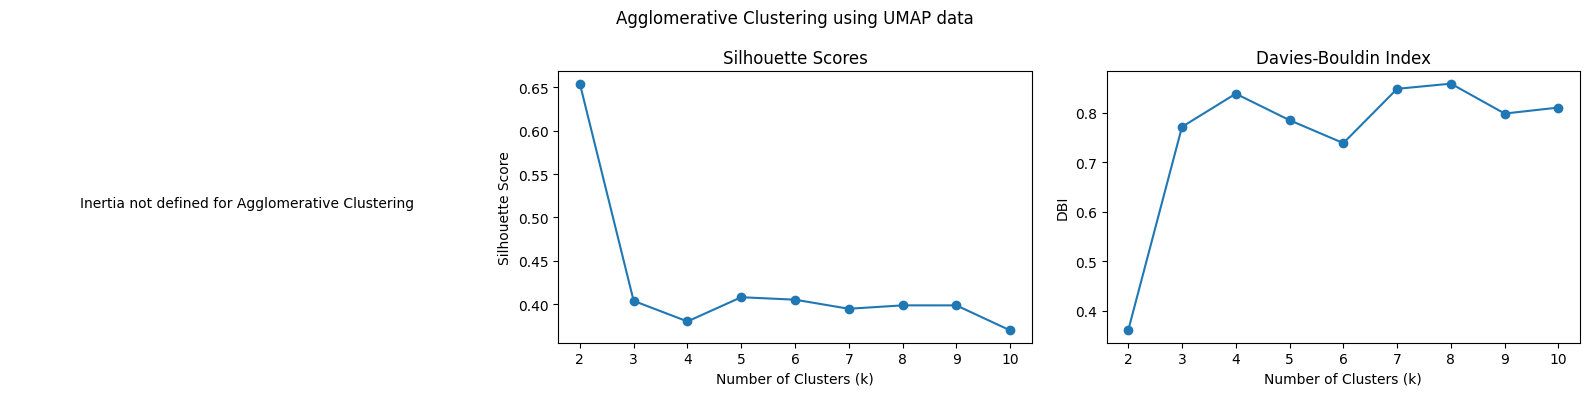

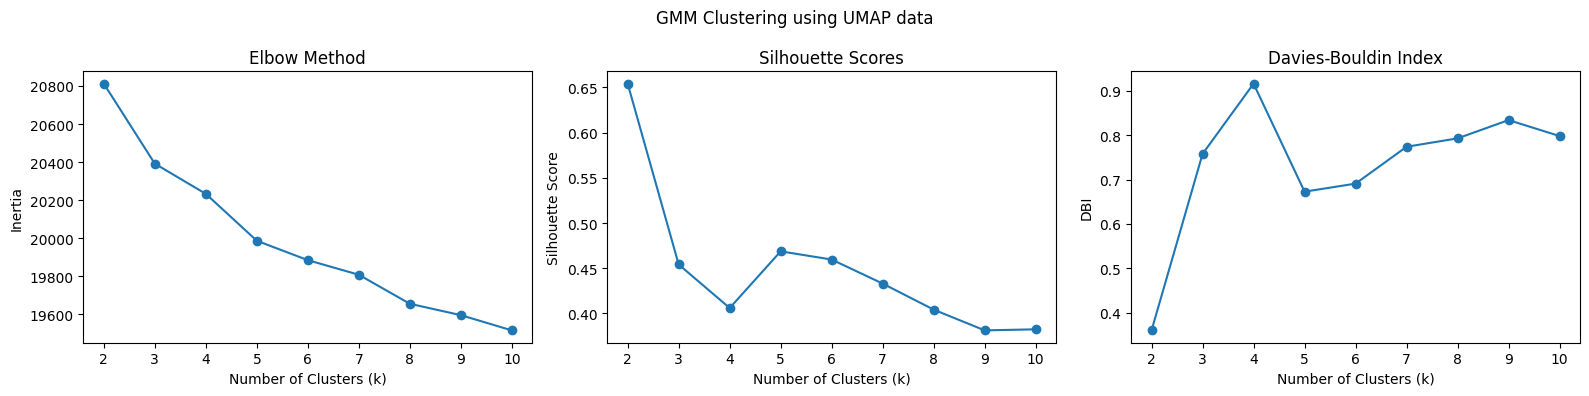


Clustering using KMeans on UMAP reduced data with 5 clusters.
KMeans - Silhouette Score: 0.469, Davies-Bouldin Index: 0.672


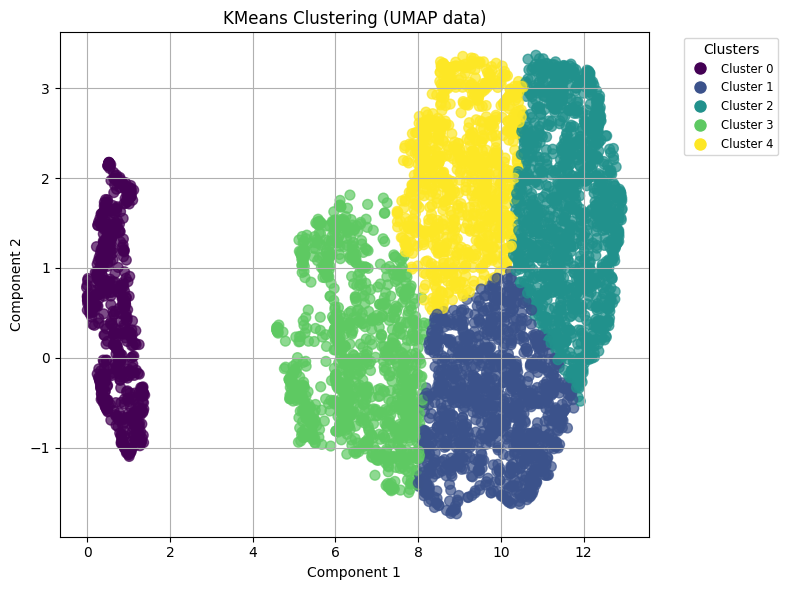

season_2                            2003-04  2004-05  2005-06  2006-07  \
player_id player_name                                                    
56        Gary Payton                   3.0      3.0      2.0      1.0   
89        Nick Van Exel                 1.0      1.0      2.0      NaN   
133       David Wesley                  1.0      1.0      2.0      NaN   
147       Jalen Rose                    1.0      3.0      1.0      NaN   
224       Eddie Jones                   1.0      2.0      2.0      2.0   
467       Jason Kidd                    1.0      1.0      1.0      1.0   
693       Joe Smith                     3.0      0.0      0.0      0.0   
703       Kurt Thomas                   0.0      3.0      0.0      NaN   
708       Kevin Garnett                 3.0      3.0      3.0      3.0   
714       Michael Finley                1.0      1.0      1.0      1.0   
727       Eric Snow                     3.0      1.0      3.0      0.0   
739       Rasheed Wallace             

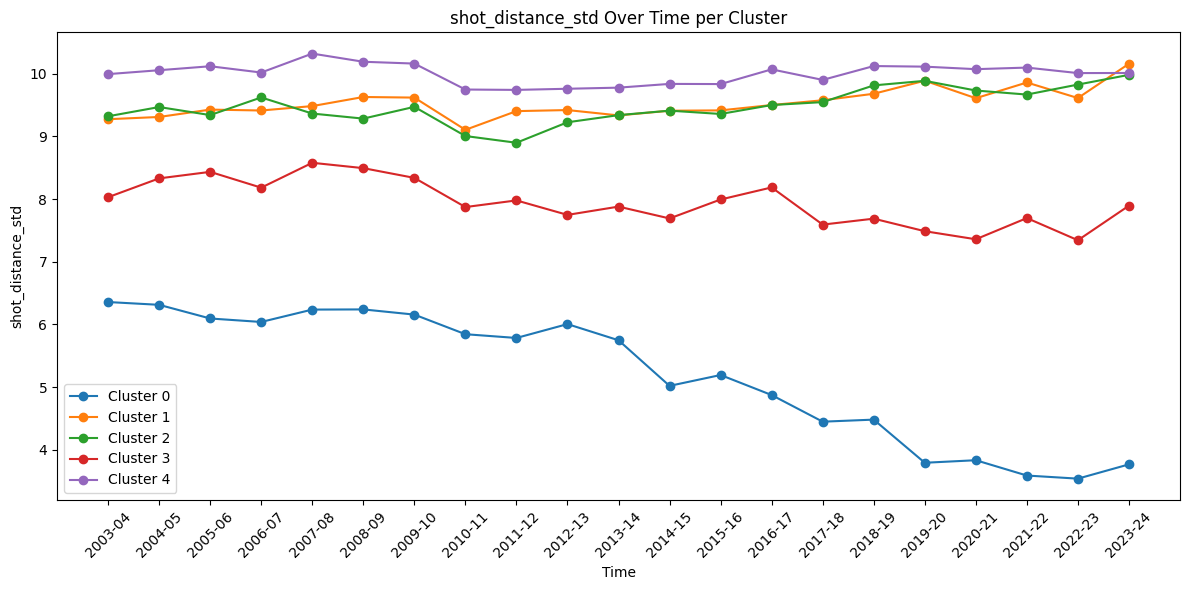

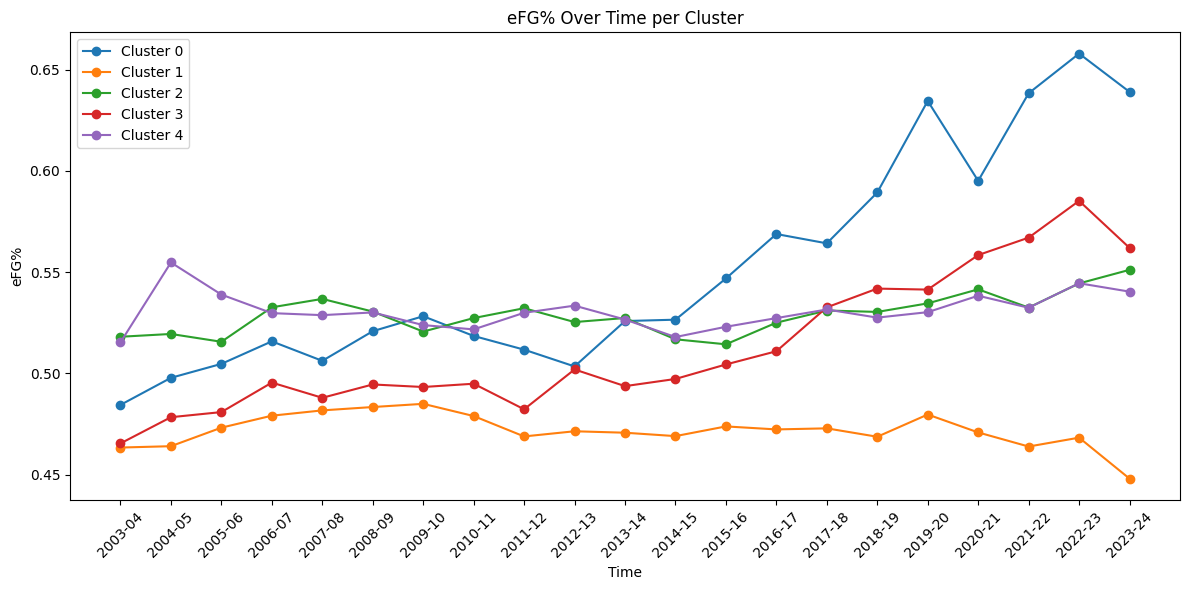

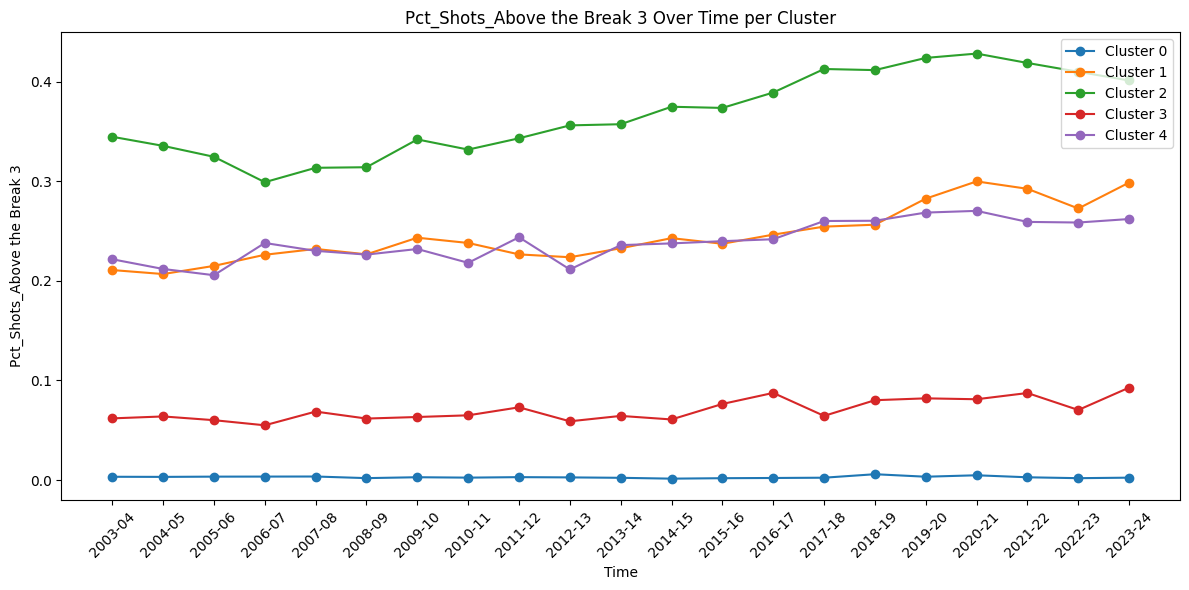

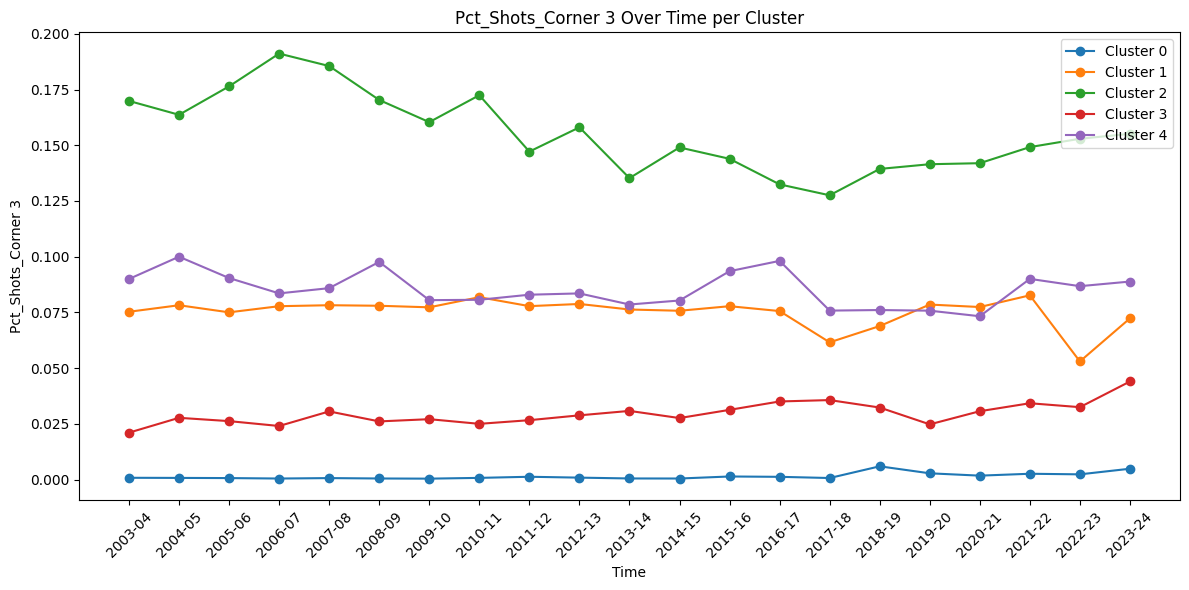

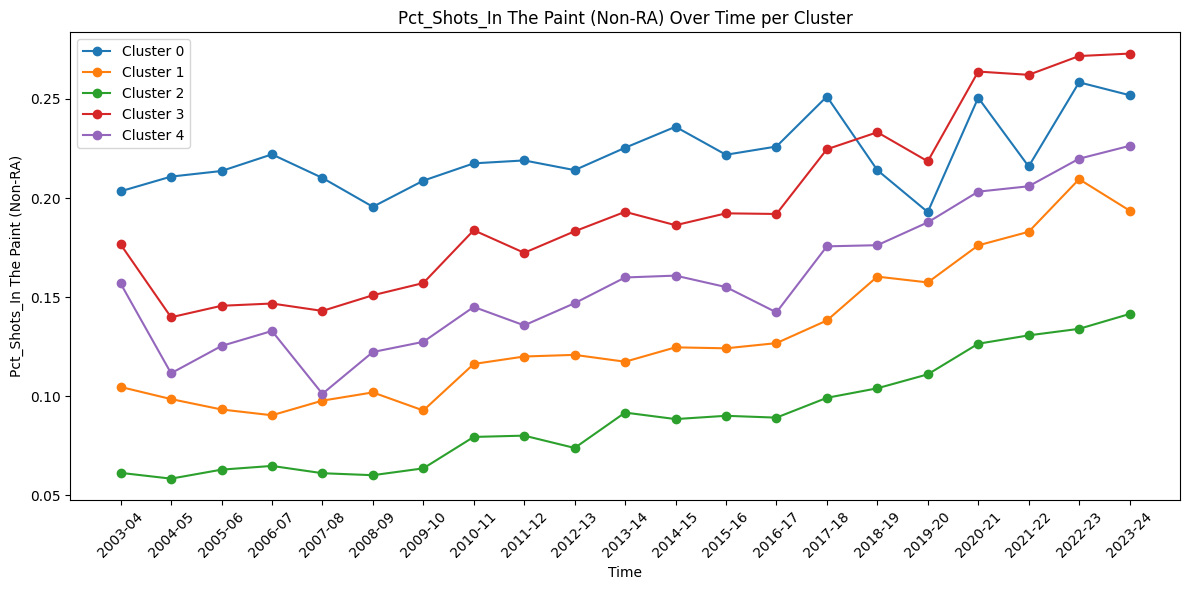

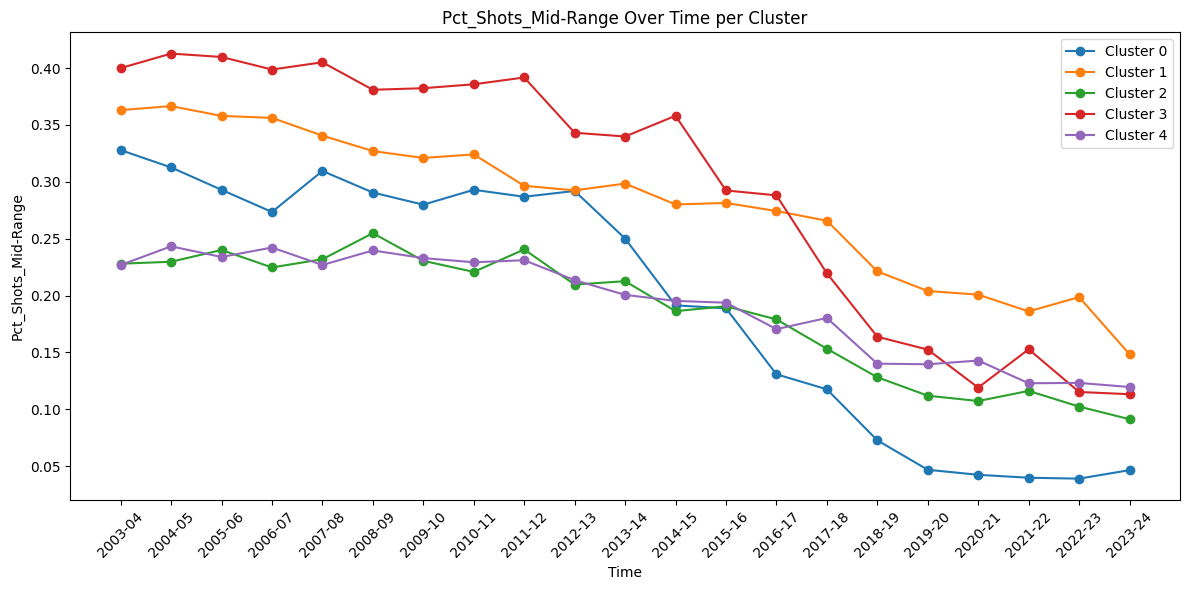

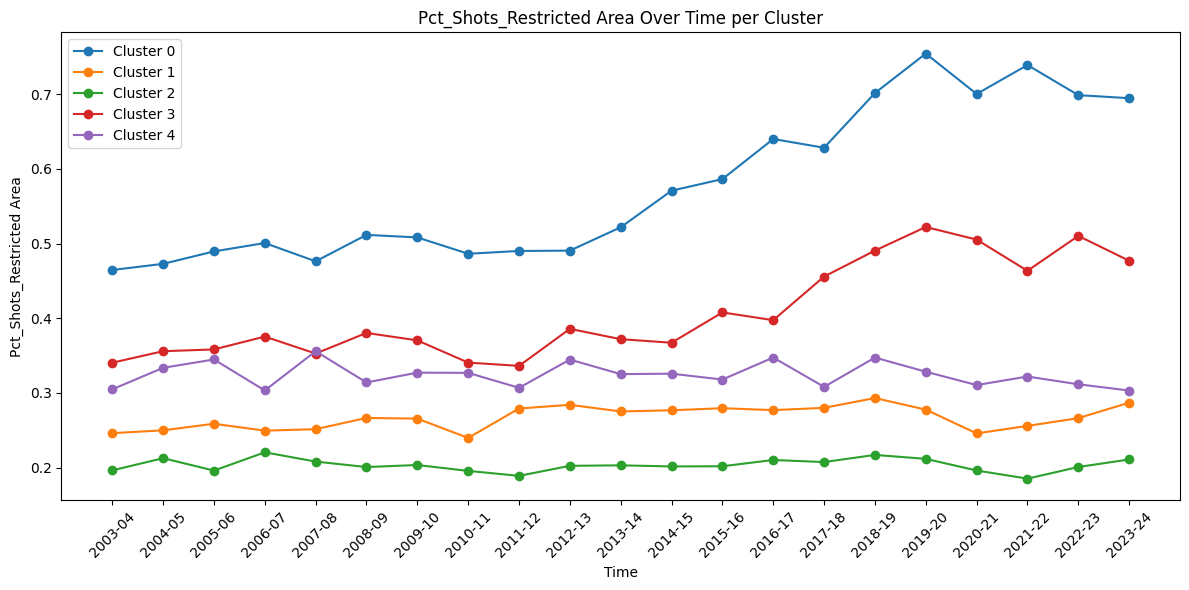

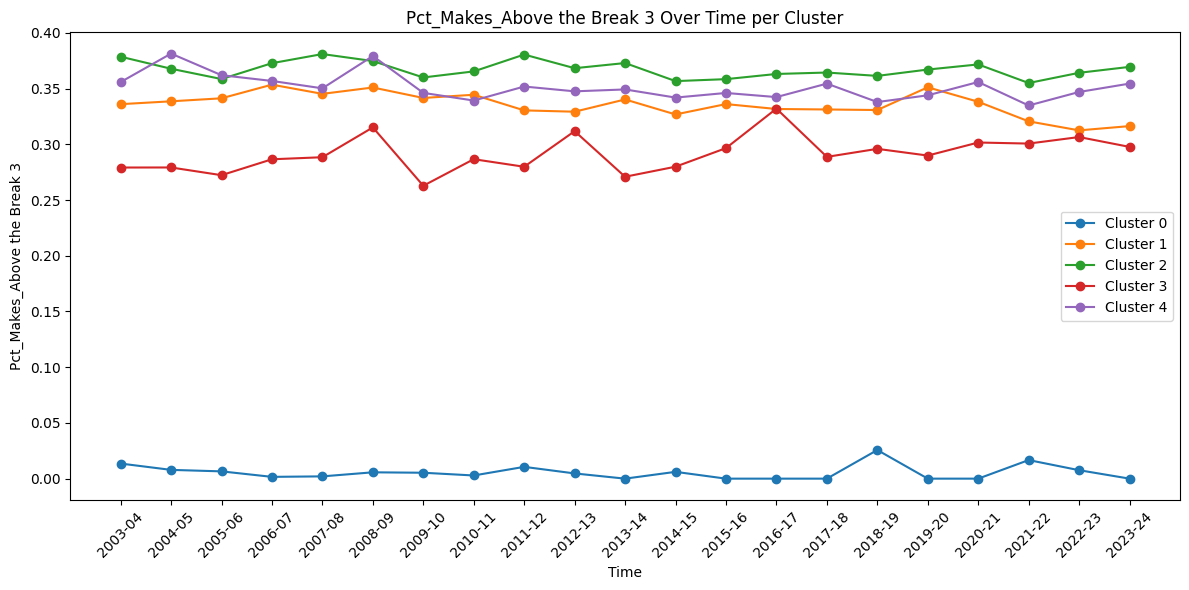

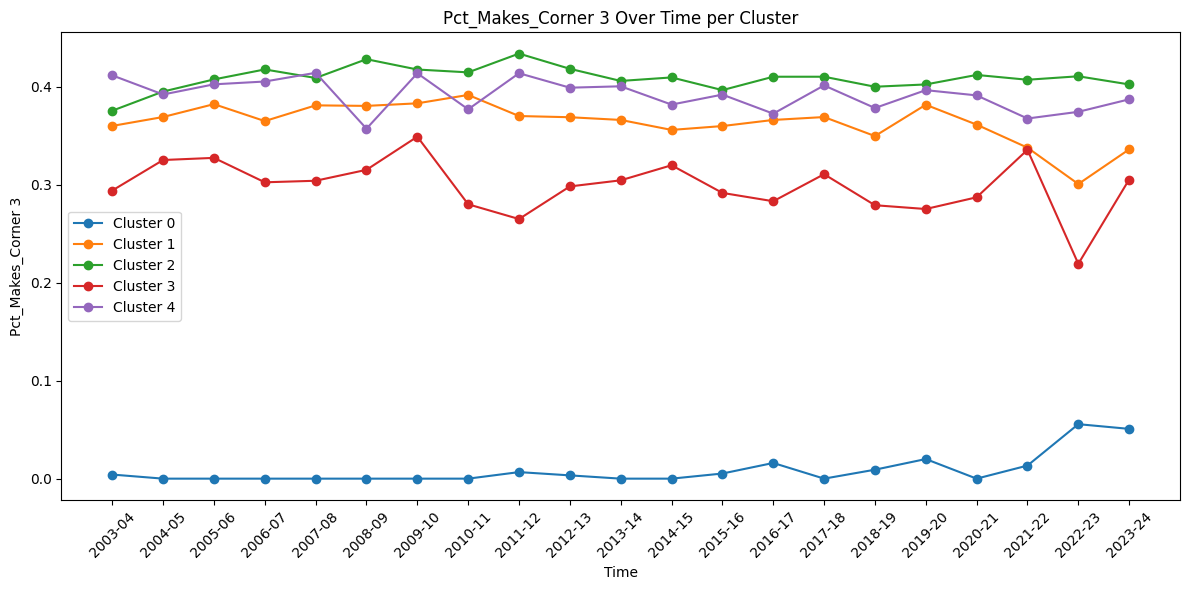

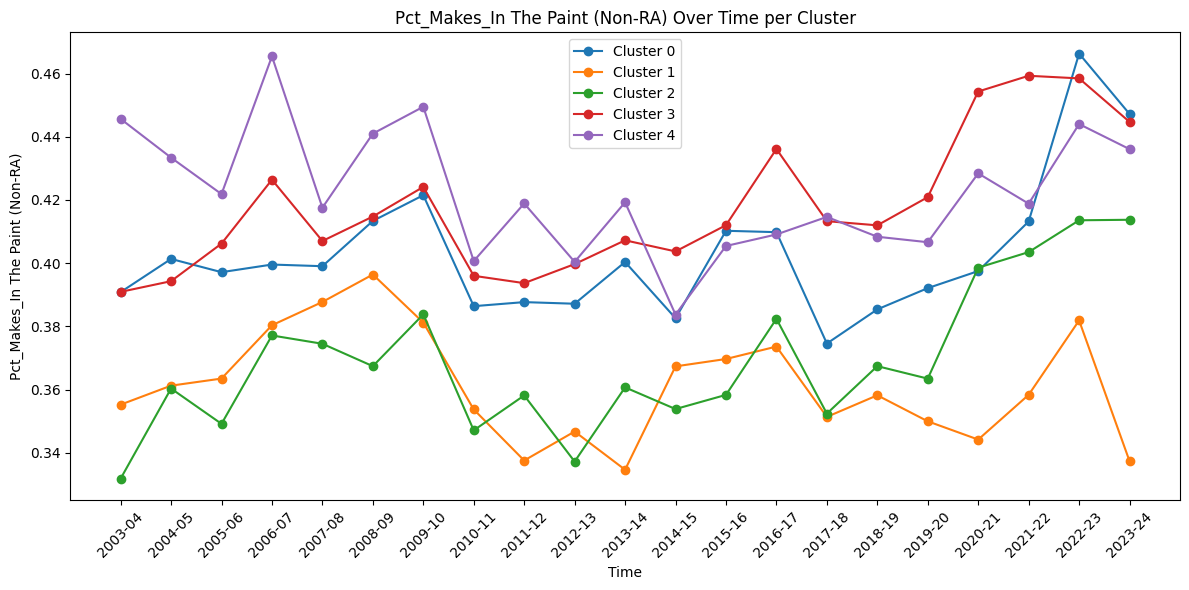

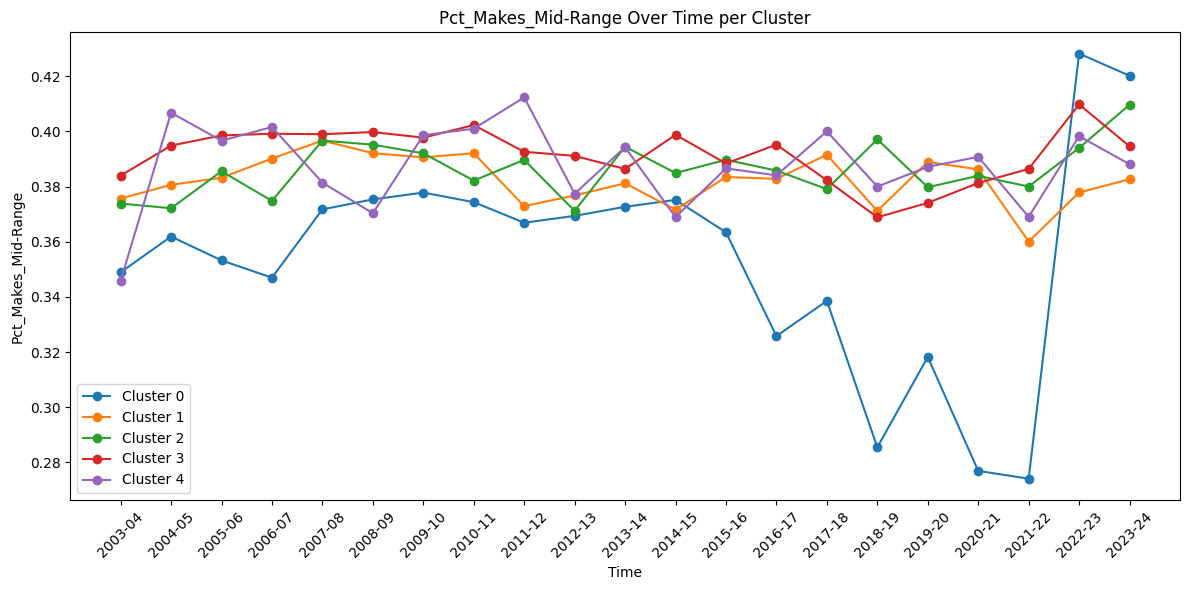

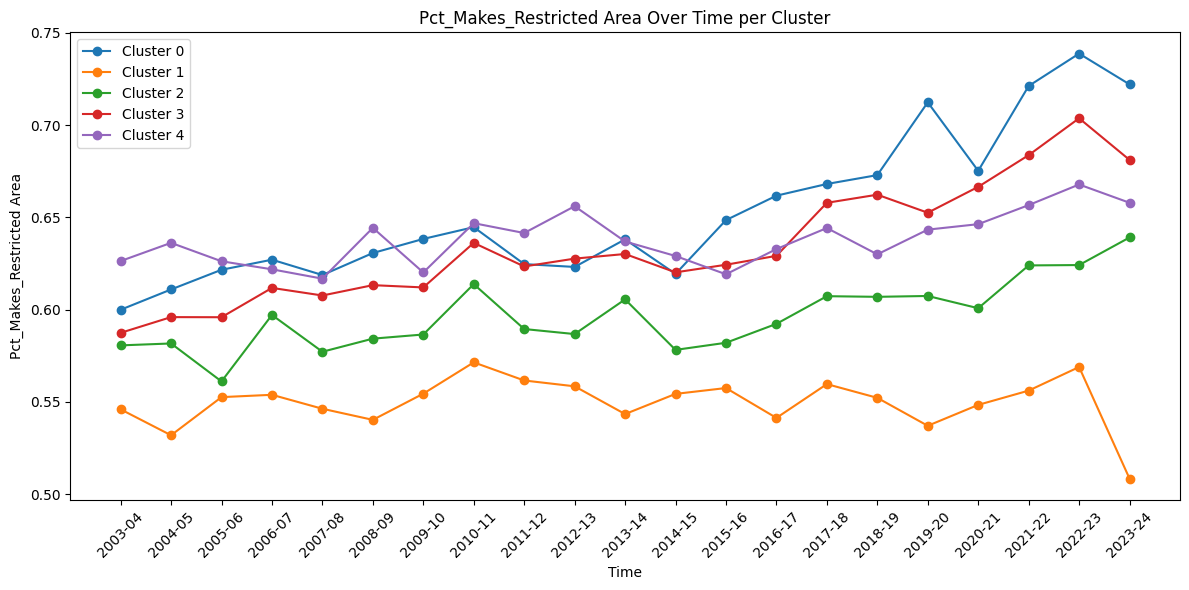

TypeError: can only concatenate str (not "set") to str

<Figure size 800x800 with 0 Axes>

In [48]:
# Load your data into a DataFrame 'df'

# Step 1: Data Preparation and Feature Calculation
player_stats = prepare_player_statistics(df, min_shots=300, 
                                         #season_range=('2015-16', '2023-24')
                                         )

# Step 2: Feature Selection
selected_features = feature_selection(player_stats)
features_df = player_stats[selected_features]

# Step 3: Dimensionality Reduction
reduced_data_dict = dimensionality_reduction(features_df, methods=['UMAP', 't-SNE', 'PCA'])

# Step 4: Evaluate Clustering Parameters (Optional)
# You can evaluate clustering parameters as before if needed
# Step 4: Evaluate Clustering Parameters for Each Dimensionality Reduction Method
for method_name, reduced_data in reduced_data_dict.items():
    print(f"Evaluating clustering parameters for {method_name} reduced data:")
    metrics_dict = evaluate_clustering_parameters(reduced_data, method_name=method_name, max_k=10)

# Step 5: Clustering with Specified Model and Reduction Technique
method_name = 'UMAP'
clustering_method = 'KMeans'
n_clusters = 5

cluster_labels = cluster_data(reduced_data_dict, method_name=method_name, clustering_method=clustering_method, n_clusters=n_clusters)

# Step 6: Merge Cluster Labels with Player Data
player_data_with_clusters = get_player_data_with_clusters(player_stats, selected_features, cluster_labels)

# Step 7: Analyze Player Cluster Changes Over Time
player_cluster_changes = analyze_player_cluster_changes(player_data_with_clusters)
# You can inspect 'player_cluster_changes' to see which players changed clusters

# Step 8: Analyze Cluster Metrics Over Time
features_to_analyze = ['shot_distance_std', 'eFG%', 'Pct_Shots_Above the Break 3', 
                       'Pct_Shots_Corner 3', 'Pct_Shots_In The Paint (Non-RA)', 'Pct_Shots_Mid-Range', 
                       'Pct_Shots_Restricted Area', 'Pct_Makes_Above the Break 3', 'Pct_Makes_Corner 3', 
                       'Pct_Makes_In The Paint (Non-RA)', 'Pct_Makes_Mid-Range', 'Pct_Makes_Restricted Area']
cluster_metrics_over_time = analyze_cluster_metrics_over_time(player_data_with_clusters, features_to_analyze)

# Step 9: Plot Cluster Metrics Over Time
plot_metrics_over_time(cluster_metrics_over_time, features_to_analyze)

# Step 10: Plot Radar Charts for Selected Players
player_names = ['Brook Lopez']
features_to_plot = ['shot_distance_std', 'eFG%', 'Pct_Shots_Above the Break 3', 'Pct_Shots_In The Paint (Non-RA)', 'Pct_Shots_Corner 3', 'Pct_Shots_Mid-Range', 'Pct_Shots_Restricted Area', 'Pct_Makes_Above the Break 3', 'Pct_Makes_In The Paint (Non-RA)', 'Pct_Makes_Corner 3', 'Pct_Makes_Mid-Range', 'Pct_Makes_Restricted Area']
plot_player_radar_chart(player_data_with_clusters, player_names, features_to_plot, season=None)

# Step 11: Perform Random Forest Model to Determine Feature Importance
feature_importances = random_forest_feature_importance(features_df, cluster_labels)
print(feature_importances)

# Step 10: Analyze Evolution of the Game by Season
game_evolution = analyze_game_evolution(player_stats, features_to_analyze)

# Step 11: Plot Evolution of the Game Over Time
plot_game_evolution(game_evolution, features_to_analyze)


In [49]:
def count_players_per_cluster(player_data_with_clusters):
    """
    Count the number of unique players in each cluster.
    
    Parameters:
    - player_data_with_clusters: DataFrame with player data including 'cluster' and 'player_id'.
    
    Returns:
    - player_counts: Series with the number of unique players per cluster.
    """
    player_counts = player_data_with_clusters.groupby('cluster')['player_id'].nunique()
    return player_counts

# Calculate the player counts
player_counts = count_players_per_cluster(player_data_with_clusters)
print("Number of unique players in each cluster:")
print(player_counts)


def count_records_per_cluster_season(player_data_with_clusters):
    """
    Count the number of records in each cluster per season.
    
    Parameters:
    - player_data_with_clusters: DataFrame with player data including 'cluster' and 'season_2'.
    
    Returns:
    - records_counts: DataFrame with counts per cluster per season.
    """
    records_counts = player_data_with_clusters.groupby(['season_2', 'cluster']).size().unstack(fill_value=0)
    return records_counts

# Calculate the records counts
records_counts = count_records_per_cluster_season(player_data_with_clusters)
print("Number of records per cluster per season:")
print(records_counts)

a= player_data_with_clusters[player_data_with_clusters['season_2'] == "2023-24"]
a[a['cluster'] == 3]

Number of unique players in each cluster:
cluster
0    220
1    446
2    447
3    361
4    355
Name: player_id, dtype: int64
Number of records per cluster per season:
cluster    0   1    2   3    4
season_2                      
2003-04   48  90   20  68    6
2004-05   53  95   25  67   10
2005-06   47  76   34  68   14
2006-07   48  86   34  64   13
2007-08   49  83   41  68    9
2008-09   44  76   48  66    9
2009-10   37  73   44  76   22
2010-11   44  74   49  66   15
2011-12   40  76   30  53   19
2012-13   50  81   53  54   17
2013-14   43  68   61  51   31
2014-15   41  77   70  64   26
2015-16   32  81   67  58   32
2016-17   27  56   88  50   57
2017-18   16  40   91  47   75
2018-19   16  33   99  38   88
2019-20   10  19   94  30   95
2020-21    8  12  106  33   91
2021-22   15  15  112  29  105
2022-23   12   8  108  29  112
2023-24   14   3  117  28   99


player_id            player_name season_2  avg_shot_distance  \
2622     201566      Russell Westbrook  2023-24           9.090498   
2954     201942          DeMar DeRozan  2023-24          12.697932   
3236     202330         Gordon Hayward  2023-24          11.746898   
3403     202685      Jonas Valanciunas  2023-24           8.465925   
3623     203076          Anthony Davis  2023-24           7.517537   
4033     203507  Giannis Antetokounmpo  2023-24           6.199561   
4159     203932           Aaron Gordon  2023-24           6.853147   
4179     203937          Kyle Anderson  2023-24           8.444444   
4251     203994           Jusuf Nurkic  2023-24           6.086124   
4261     203999           Nikola Jokic  2023-24           8.950107   
4293     204456         T.J. McConnell  2023-24           7.934122   
4492    1627734       Domantas Sabonis  2023-24           5.721910   
4593    1627783          Pascal Siakam  2023-24           9.421715   
4647    1628365         Markelle Fultz  2023-24           6.793846   
4741    1628389            Bam Adebayo  2023-24           7.975418   
4745    1628392     Isaiah Hartenstein  2023-24           3.120548   
4813    1628963      Marvin Bagley III  2023-24           4.647059   
4935    1629021          Moritz Wagner  2023-24           7.014519   
5009    1629627        Zion Williamson  2023-24           3.523766   
5135    1630168         Onyeka Okongwu  2023-24           6.211538   
5190    1630194              Paul Reed  2023-24           6.658333   
5216    1630228       Jonathan Kuminga  2023-24           8.886179   
5274    1630570        Trendon Watford  2023-24           9.009646   
5280    1630578         Alperen Sengun  2023-24           7.336735   
5293    1630596            Evan Mobley  2023-24           6.074141   
5310    1631094         Paolo Banchero  2023-24          12.054804   
5347    1641708          Amen Thompson  2023-24           6.316854   
5348    1641709         Ausar Thompson  2023-24           8.855042   

      shot_distance_std   eFG%  3PT_Ratio  2PT_Ratio   2PT%   3PT%  \
2622           9.541812  0.486      0.232      0.768  0.509  0.273   
2954           8.326817  0.508      0.165      0.835  0.509  0.335   
3236           8.803858  0.510      0.223      0.777  0.479  0.411   
3403           8.721704  0.585      0.167      0.833  0.609  0.308   
3623           7.731571  0.567      0.083      0.917  0.582  0.271   
4033           8.056064  0.624      0.090      0.910  0.645  0.276   
4159           9.216018  0.585      0.192      0.808  0.619  0.292   
4179           6.729901  0.473      0.109      0.891  0.488  0.234   
4251           8.489549  0.528      0.144      0.856  0.555  0.244   
4261           8.575523  0.615      0.159      0.841  0.626  0.372   
4293           6.641462  0.573      0.073      0.927  0.568  0.419   
4492           7.161964  0.609      0.081      0.919  0.613  0.379   
4593           8.920822  0.569      0.194      0.806  0.581  0.346   
4647           6.396659  0.480      0.052      0.948  0.487  0.235   
4741           6.311343  0.529      0.041      0.959  0.528  0.357   
4745           4.269974  0.645      0.008      0.992  0.646  0.333   
4813           6.349984  0.597      0.056      0.944  0.597  0.391   
4935           9.289866  0.637      0.207      0.793  0.673  0.333   
5009           3.984288  0.573      0.016      0.984  0.574  0.333   
5135           8.659890  0.644      0.187      0.813  0.676  0.338   
5190           8.140208  0.561      0.119      0.881  0.563  0.368   
5216           8.965881  0.560      0.190      0.810  0.578  0.323   
5274           8.972893  0.571      0.219      0.781  0.564  0.397   
5280           7.866667  0.555      0.111      0.889  0.567  0.303   
5293           7.526278  0.599      0.107      0.893  0.603  0.373   
5310           9.447063  0.498      0.248      0.752  0.493  0.341   
5347           8.352364  0.546      0.128      0.872  0.595  0.140   
5348           

In [18]:
player_counts = count_players_per_cluster(player_data_with_clusters)
print("Number of unique players in each cluster:")
print(player_counts)

# Step 2: Show the distribution of records inside each cluster by season
records_counts = count_records_per_cluster_season(player_data_with_clusters)
print("Number of records per cluster per season:")
print(records_counts)

Number of unique players in each cluster:
cluster
0    285
1    447
2    352
3    357
4    425
Name: player_id, dtype: int64
Number of records per cluster per season:
cluster    0    1   2    3   4
season_2                      
2003-04   69   22  62    5  74
2004-05   67   26  66    8  83
2005-06   58   31  75    7  68
2006-07   65   36  52   13  79
2007-08   60   41  66    5  78
2008-09   58   48  64    7  66
2009-10   50   45  67   21  69
2010-11   65   52  53   16  62
2011-12   51   35  54   15  63
2012-13   58   59  56   18  64
2013-14   56   58  46   30  64
2014-15   55   67  67   21  68
2015-16   43   68  60   30  69
2016-17   35   82  49   52  60
2017-18   26   77  44   82  40
2018-19   25   96  34   92  27
2019-20   16   78  25  103  26
2020-21   16   85  21  112  16
2021-22   20  102  21  119  14
2022-23   22   90  17  137   3
2023-24   16   87  16  135   7


In [19]:
def analyze_game_evolution(player_stats, features_to_analyze):
    """
    Analyze the evolution of the game by calculating the average of selected features per season.
    
    Parameters:
    - player_stats: DataFrame with player statistics per season.
    - features_to_analyze: List of features to analyze.
    
    Returns:
    - game_evolution: DataFrame with average of features per season.
    """
    import pandas as pd
    
    # Group by season and calculate mean of features
    game_evolution = player_stats.groupby('season_2')[features_to_analyze].mean().reset_index()
    
    # Sort by season (assuming season_2 is in 'YYYY-YY' format)
    # Convert 'season_2' to integer start year for sorting
    def parse_season_to_year(season_str):
        start_year = int(season_str.split('-')[0])
        return start_year
    
    game_evolution['start_year'] = game_evolution['season_2'].apply(parse_season_to_year)
    game_evolution.sort_values('start_year', inplace=True)
    game_evolution.reset_index(drop=True, inplace=True)
    
    return game_evolution

def plot_game_evolution(game_evolution, features_to_analyze):
    """
    Plot the evolution of the game over time by plotting features over seasons.
    
    Parameters:
    - game_evolution: DataFrame with average of features per season.
    - features_to_analyze: List of features to plot.
    
    Returns:
    - None
    """
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    
    # Number of features to plot
    n_features = len(features_to_analyze)
    
    # Create subplots
    fig, axes = plt.subplots(nrows=n_features, ncols=1, figsize=(12, n_features * 3))
    
    # If only one feature, axes may not be an array
    if n_features == 1:
        axes = [axes]
    
    # X-axis labels (seasons)
    seasons = game_evolution['season_2']
    
    for ax, feature in zip(axes, features_to_analyze):
        ax.plot(seasons, game_evolution[feature], marker='o')
        ax.set_title(f'Evolution of {feature} over Seasons')
        ax.set_xlabel('Season')
        ax.set_ylabel(feature)
        ax.set_xticks(range(len(seasons)))
        ax.set_xticklabels(seasons, rotation=45)
        # Optionally, add grid
        ax.grid(True)
    
    plt.tight_layout()
    plt.show()


In [20]:
def perform_linear_regression(game_evolution, features_to_analyze):
    """
    Perform linear regression on each feature to quantify trends over time.
    
    Parameters:
    - game_evolution: DataFrame with average of features per season.
    - features_to_analyze: List of features to analyze.
    
    Returns:
    - regression_results: Dictionary with regression coefficients and p-values for each feature.
    """
    import numpy as np
    import pandas as pd
    import statsmodels.api as sm
    
    regression_results = {}
    
    # Use 'start_year' as the numeric representation of the season
    X = game_evolution['start_year']
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    
    for feature in features_to_analyze:
        y = game_evolution[feature]
        model = sm.OLS(y, X).fit()
        regression_results[feature] = {
            'slope': model.params['start_year'],
            'p-value': model.pvalues['start_year'],
            'r-squared': model.rsquared
        }
    
    return regression_results


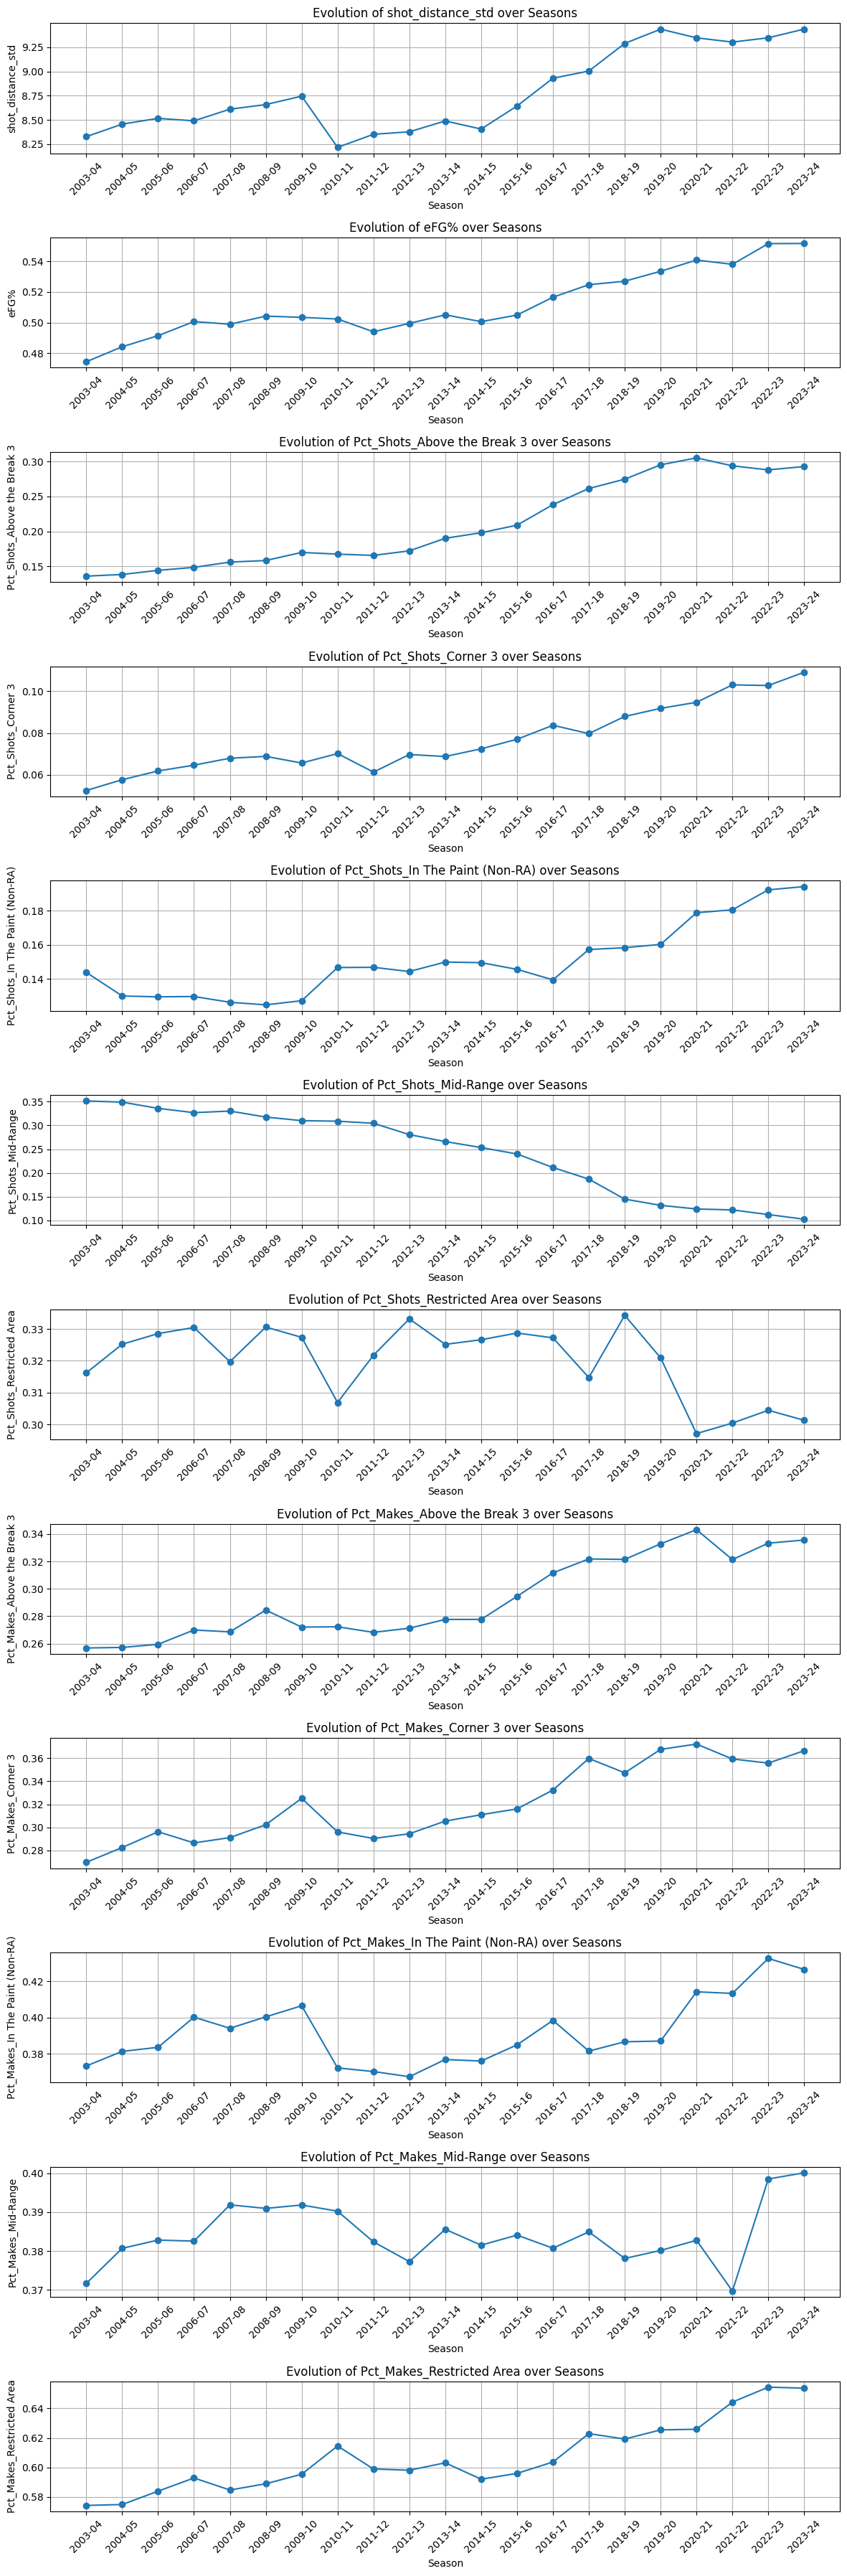

In [21]:
# Define the features to analyze
features_to_analyze = [
    'shot_distance_std', 'eFG%', 'Pct_Shots_Above the Break 3',
    'Pct_Shots_Corner 3', 'Pct_Shots_In The Paint (Non-RA)',
    'Pct_Shots_Mid-Range', 'Pct_Shots_Restricted Area',
    'Pct_Makes_Above the Break 3', 'Pct_Makes_Corner 3',
    'Pct_Makes_In The Paint (Non-RA)', 'Pct_Makes_Mid-Range',
    'Pct_Makes_Restricted Area'
]

# Analyze the evolution of the game
game_evolution = analyze_game_evolution(player_stats, features_to_analyze)

# Plot the evolution of the game
plot_game_evolution(game_evolution, features_to_analyze)


In [22]:
# Perform linear regression
regression_results = perform_linear_regression(game_evolution, features_to_analyze)

# Print the regression results
for feature, result in regression_results.items():
    print(f"Feature: {feature}")
    print(f"  Slope: {result['slope']:.4f}")
    print(f"  p-value: {result['p-value']:.4f}")
    print(f"  R-squared: {result['r-squared']:.4f}\n")


Feature: shot_distance_std
  Slope: 0.0562
  p-value: 0.0000
  R-squared: 0.6908

Feature: eFG%
  Slope: 0.0033
  p-value: 0.0000
  R-squared: 0.8705

Feature: Pct_Shots_Above the Break 3
  Slope: 0.0095
  p-value: 0.0000
  R-squared: 0.9199

Feature: Pct_Shots_Corner 3
  Slope: 0.0024
  p-value: 0.0000
  R-squared: 0.8940

Feature: Pct_Shots_In The Paint (Non-RA)
  Slope: 0.0030
  p-value: 0.0000
  R-squared: 0.7647

Feature: Pct_Shots_Mid-Range
  Slope: -0.0139
  p-value: 0.0000
  R-squared: 0.9477

Feature: Pct_Shots_Restricted Area
  Slope: -0.0010
  p-value: 0.0148
  R-squared: 0.2744

Feature: Pct_Makes_Above the Break 3
  Slope: 0.0045
  p-value: 0.0000
  R-squared: 0.8628

Feature: Pct_Makes_Corner 3
  Slope: 0.0048
  p-value: 0.0000
  R-squared: 0.8343

Feature: Pct_Makes_In The Paint (Non-RA)
  Slope: 0.0016
  p-value: 0.0122
  R-squared: 0.2878

Feature: Pct_Makes_Mid-Range
  Slope: 0.0002
  p-value: 0.4695
  R-squared: 0.0279

Feature: Pct_Makes_Restricted Area
  Slope: 0.0

In [23]:
player_data_with_clusters.to_csv('clusterdata.csv')

In [21]:
import pandas as pd
import plotly.graph_objects as go

players_of_interest = ['LeBron James', 'Al Horford', 'Brook Lopez']  # List of players

player_diff = player_data_with_clusters[player_data_with_clusters['player_name'].isin(players_of_interest)]

# Extract the start year from the season_2 column (e.g., "2013-14" -> 2013)
player_diff['year_start'] = player_diff['season_2'].str.split('-').str[0].astype(int)

# Sort data by player_id and year for proper sequencing
player_diff = player_diff.sort_values(by=['player_id', 'year_start'])

# Print out cluster progression for each player
print("Cluster Progression for Each Player:")
for pid, group in player_diff.groupby('player_id'):
    group = group.sort_values('year_start')
    player_name = group['player_name'].iloc[0]
    progression = []
    for _, row in group.iterrows():
        progression.append((row['year_start'], row['cluster']))
    # Format the progression as a string: Year: Cluster -> Year: Cluster -> ...
    progression_str = " -> ".join([f"{year}:C{clust}" for year, clust in progression])
    print(f"{player_name} (ID: {pid}): {progression_str}")

# For each player, find the transitions between consecutive years
player_transitions = []

for pid, group in player_diff.groupby('player_id'):
    group = group.sort_values('year_start')
    prev_row = None
    for _, row in group.iterrows():
        if prev_row is not None:
            player_transitions.append({
                'player_id': pid,
                'from_year': prev_row['year_start'],
                'from_cluster': prev_row['cluster'],
                'to_year': row['year_start'],
                'to_cluster': row['cluster']
            })
        prev_row = row

transitions_df = pd.DataFrame(player_transitions)

# Aggregate the number of players making each (year+cluster) -> (year+cluster) transition
transition_counts = transitions_df.groupby(
    ['from_year', 'from_cluster', 'to_year', 'to_cluster']
).size().reset_index(name='count')

# Create unique nodes
unique_nodes = pd.DataFrame({
    'year_cluster': pd.concat([
        transition_counts['from_year'].astype(str) + '_C' + transition_counts['from_cluster'].astype(str),
        transition_counts['to_year'].astype(str) + '_C' + transition_counts['to_cluster'].astype(str)
    ]).unique()
}, columns=['year_cluster'])

# Assign an index to each node
unique_nodes['node_id'] = range(len(unique_nodes))
node_dict = dict(zip(unique_nodes['year_cluster'], unique_nodes['node_id']))

# Build Sankey source/target/value
transition_counts['source'] = (transition_counts['from_year'].astype(str) 
                               + '_C' 
                               + transition_counts['from_cluster'].astype(str)).map(node_dict)
transition_counts['target'] = (transition_counts['to_year'].astype(str) 
                               + '_C' 
                               + transition_counts['to_cluster'].astype(str)).map(node_dict)

# Prepare the data for the Sankey diagram
source = transition_counts['source'].tolist()
target = transition_counts['target'].tolist()
values = transition_counts['count'].tolist()

# Create labels for nodes
labels = []
for yc in unique_nodes['year_cluster']:
    year, cluster_str = yc.split('_C')
    labels.append(f"{year}, Cluster {cluster_str}")

# Plot the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color="blue"
    ),
    link = dict(
        source=source,
        target=target,
        value=values
    )
)])

fig.update_layout(title_text="All-Year Cluster Transitions", font_size=10)
fig.show()


Cluster Progression for Each Player:
LeBron James (ID: 2544): 2003:C2 -> 2004:C4 -> 2005:C4 -> 2006:C4 -> 2007:C4 -> 2008:C4 -> 2009:C3 -> 2010:C2 -> 2011:C2 -> 2012:C3 -> 2013:C3 -> 2014:C3 -> 2015:C2 -> 2016:C3 -> 2017:C3 -> 2018:C3 -> 2019:C3 -> 2020:C3 -> 2021:C3 -> 2022:C3 -> 2023:C3
Al Horford (ID: 201143): 2007:C0 -> 2008:C0 -> 2009:C2 -> 2010:C2 -> 2012:C2 -> 2013:C2 -> 2014:C2 -> 2015:C2 -> 2016:C3 -> 2017:C3 -> 2018:C3 -> 2019:C3 -> 2020:C3 -> 2021:C1 -> 2022:C1 -> 2023:C1
Brook Lopez (ID: 201572): 2008:C0 -> 2009:C0 -> 2010:C0 -> 2012:C0 -> 2014:C0 -> 2015:C0 -> 2016:C3 -> 2017:C3 -> 2018:C1 -> 2019:C3 -> 2020:C3 -> 2022:C3 -> 2023:C1


C:\Users\thiag\AppData\Local\Temp\ipykernel_7408\583901082.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

